**Author:** Eriberto Oliveira do Nascimento<br>
**Last Modified:** 04/10/2025<br>
**Description:** This project develops a Variational Autoencoder (VAE) for acoustic analysis and implements a Deep Transfer Learning (DTL) methodology using a novel custom loss function.<br>
**Long Description:**  This work introduces a new deep transfer learning loss function for modeling the Speech Transmission Index (STI). The approach uses a deep artificial neural network, trained on a source domain, to create a latent space representation that informs the custom loss function during transfer learning<br>

# Imports

In [1]:
!pip install adapt
!pip install Tensorflow==2.15
!pip install acoustics
!pip install pyroomacoustics==0.4.1

     |████████████████████████████████| 100 kB 3.1 MB/s 
     |████████████████████████████████| 13.6 MB 411 kB/s 
     |████████████████████████████████| 24.8 MB 60.6 MB/s 
  Created wheel for adapt: filename=adapt-0.4.4-py3-none-any.whl size=131795 sha256=8a963befa0e23a58ed4b53280fe841c4c748218f445046122585ba153b30ebc9
  Stored in directory: /root/.cache/pip/wheels/0a/49/db/d5cb8a3dd7e1e9814a90b8472f5ee5fe8bfcb0c9a598728cc9
Successfully built adapt
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-core 0.1.0b20210210 requires numpy==1.19, but you have numpy 1.19.5 which is incompatible.
autogluon-core 0.1.0b20210210 requires scikit-learn<0.24,>=0.22.0, but you have scikit-lea

In [2]:
# -*- coding: utf-8 -*-
import os
import math
import random
import librosa
import time
import warnings
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

# Allow inline plot  -  and download figs
# matplotlib.use('Agg')

plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 22})

import joblib
from matplotlib.gridspec import GridSpec
from numpy import linalg as LA
# from numpy import savez_compressed
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from scipy import signal
import scipy.stats as stats
from scipy.fft import fft
from scipy.stats import kde
from scipy.io import wavfile
from scipy.stats import norm
from scipy.stats import ks_2samp
from scipy.stats import multivariate_normal
from scipy.stats import norm, f_oneway, ks_2samp
from scipy.stats import kde
from scipy.stats import f_oneway

from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process.kernels import RBF
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, Conv1D, MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.models import Model

from scipy import stats

from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import keras
from keras.layers import Dense, GlobalAveragePooling1D
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import losses
from keras.backend import clear_session

from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras import mixed_precision
from sklearn.linear_model import Ridge
from keras import backend as K

kl = tf.keras.losses.KLDivergence()

from sklearn.model_selection import train_test_split
import tensorflow as tf
from itertools import combinations
from joblib import dump, load


import optuna
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
# from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
# from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
# from optuna.visualization import plot_slice

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

import torch
from torch.distributions.multivariate_normal import MultivariateNormal
from scipy.stats import f_oneway

SEED = 42
np.random.seed(SEED)

from acoustics import Signal
import acoustics
import pyroomacoustics as pra
import librosa
import numpy as np
import pandas as pd
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense
import tensorflow as tf
from joblib import load
from scipy import signal
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
import warnings
import os

warnings.filterwarnings('ignore')

from keras import backend as K
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib

from matplotlib import rcParams
from scipy import stats

from adapt.instance_based import TrAdaBoostR2, TwoStageTrAdaBoostR2

In [3]:
# !pip freeze

## 0 - Graph settings & Helper function

In [4]:
# plt.rcParams['font.size'] = 14
# plt.rcParams['axes.linewidth'] = 1.5
# plt.rcParams['xtick.major.width'] = 1.5
# plt.rcParams['ytick.major.width'] = 1.5

## Helper Functions

In [5]:
def feature_normalize(dataset):

    mu = np.mean(dataset, axis=0)
    sigma = np.std(dataset, axis=0)
    return (dataset - mu)/sigma


def convert_to_float(x):

    try:
        return np.float(x)
    except:
        return np.nan


def show_basic_dataframe_info(dataframe, preview_rows=20):
        
    print("Number of columns in dataframe: %i" % (dataframe.shape[1]))
    print("Number of rows in dataframe: %i\n" % (dataframe.shape[0]))
    print("Print the first 20 rows")
    print(dataframe.head(preview_rows))
    print("\nDataframe description:\n")


def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap="coolwarm",
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt="d")
    
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()
    plt.close()

# 1 - Synthetic Generation of the Room Impulse Response (RIR)

[6, 12, 2]
The desired RT60 was 1.56
The measured RT60 is 4.5245804988662135


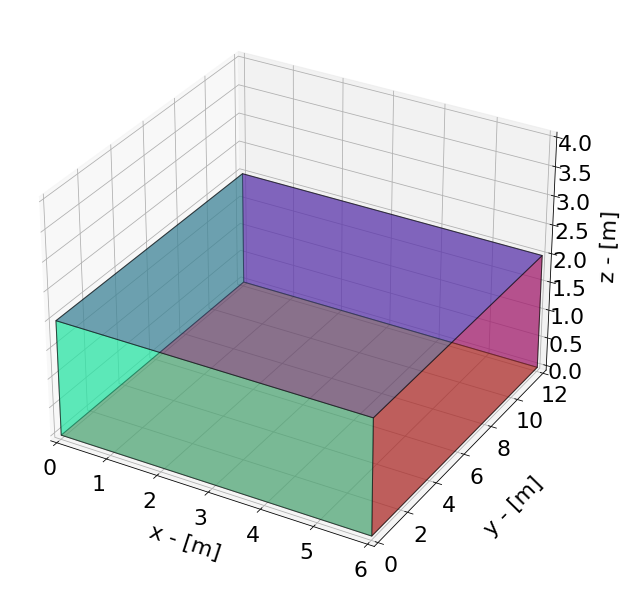

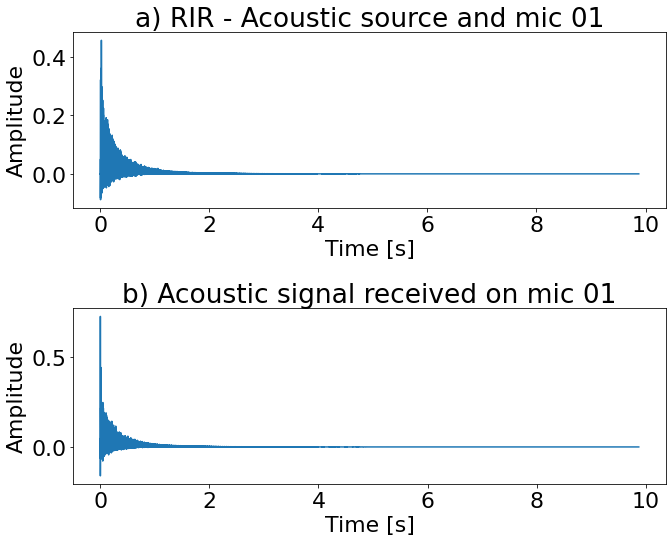

1


In [6]:
"""
This example creates a room with a specified reverberation time by inverting Sabine's formula.
This results in a slightly longer reverberation time than desired.
The simulation is a pure image source method.
"""

import pyroomacoustics as pra

def RIR_generator(signal_excitation):
    """
    Generates a synthetic Room Impulse Response (RIR) using the pyroomacoustics library.

    This function creates a virtual room with random dimensions and a target RT60
    reverberation time. It places a sound source and microphones to simulate and
    record the RIR.

    Args:
        signal_excitation (str): The file path to the audio signal used as an excitation source.
    """
    
    methods = ["ism", "hybrid"]

    if __name__ == "__main__":
        rt60_tgt = 2*random.random() + 0.1; # [seconds]
        rt60_tgt =round(rt60_tgt,2)
        room_dim = random.sample(range(5, 20), 3); # [meters]
        room_dim[2] = int(np.array(random.sample(range(2, 5), 1)))
        
        print(room_dim)

        fs, audio = wavfile.read(signal_excitation)
        e_absorption, max_order = pra.inverse_sabine(rt60_tgt, room_dim)

        room = pra.ShoeBox(
                room_dim, fs=fs, materials=pra.Material(e_absorption), max_order=max_order
            )

        fig, ax = room.plot()
        ax.set_zlim(0, 4)
        plt.xlabel("x - [m]", labelpad=15)
        plt.ylabel("y - [m]", labelpad=25)
        ax.set_zlabel('z - [m]', labelpad=15)
        
        source_pos = np.array(room_dim)/2;
        source_pos[2] = 1.5
        source_pos = source_pos.tolist()

        room.add_source(source_pos, signal=audio, delay=0.5)

        mic1 =   np.round( np.array(source_pos )+ np.array( [source_pos[0]*0.4, 0, 0]), 2)
        mic4 =   np.round( np.array(source_pos )+ np.array( [0, -source_pos[1]/2.5, 0]), 2 )

        mic1 = mic1.tolist()
 
        mic_locs = np.c_[
            mic1, mic4, 
        ]
        
        room.add_microphone_array(mic_locs)

        room.simulate()
        
        rt60 = room.measure_rt60()
        print("The desired RT60 was {}".format(rt60_tgt))
        print("The measured RT60 is {}".format(rt60[1, 0]))

        plt.show()
        plt.savefig('Figure_4_A_paper.png', dpi=300, transparent=True)
        plt.close()

        rir_1_0 = room.rir[1][0]
        rir_2_0 = room.rir[0][0]
        
        plt.subplot(2, 1, 1)
        plt.plot(np.arange(len(rir_1_0)) / room.fs, rir_1_0)
        plt.title("a) RIR - Acoustic source and mic 01")
        plt.ylabel("Amplitude")
        plt.xlabel("Time [s]")

        plt.subplot(2, 1, 2)
        plt.plot(np.arange(len(rir_2_0)) / room.fs, rir_2_0 )
        plt.title("b) Acoustic signal received on mic 01")
        plt.ylabel("Amplitude")
        plt.xlabel("Time [s]")
        
        plt.tight_layout()
        plt.savefig('Figure_4_B_paper.png', dpi=300, bbox_inches='tight', transparent=True)
        plt.show()
        plt.close()
        
        librosa.output.write_wav('Pyroom_mic1_Dim' + str(room_dim) + 
                                 '_RT_' + str(round(rt60_tgt,2)) + 
                                 '_seg' +str(int(round(time.time(),0)))+'.wav', 
                                 room.rir[1][0], 
                                 room.fs, 
                                 norm=False)
        
        librosa.output.write_wav('Pyroom_mic2_Dim' + str(room_dim) + 
                                 '_RT_' + str(round(rt60_tgt,2)) + 
                                 '_seg' + str(int(round(time.time(),0)))+'.wav', 
                                 room.rir[0][0], 
                                 room.fs, 
                                 norm=False)

def generate_RIR():
    i = 0;
    while (i < 1):
        try:
            # To ensure reproducibility, a single excitation signal should be used to represent an impulse sound source at 100 dB
            RIR_generator('/kaggle/input/sti-prediction/Excitacao.wav')
        except Exception:
            pass

        i = i +1
        print(i)
        

generate_RIR()

# 2 - Generation of background noise samples (BGN)

In [7]:
def process_and_plot_audio_files(file_name, filename_BGN, figure_name, graph_color):
    
    """Processes and visualizes acoustic properties of an audio signal.

    This function performs a comprehensive analysis of a primary audio signal
    (e.g., a Room Impulse Response) and calculates its Signal-to-Noise Ratio (SNR)
    relative to a background noise signal. It generates and displays several plots,
    including the Power Spectral Density (PSD), FFT, spectrograms, and octave-band
    analysis. It also calculates and prints the reverberation time (T30). One of
    the generated plots is saved to a specified file path.

    Args:
        file_name (str): The file path for the primary audio signal to be analyzed
            (e.g., an RIR .wav file).
        filename_BGN (str): The file path for the background noise audio signal,
            used for SNR calculation.
        figure_name (str): The desired file path and name for the saved plot
            (e.g., 'figure.png').
        graph_color (str): The color to use for the plot lines (e.g., 'red', 'blue').

    Returns:
        None. This function produces plots and print outputs but does not return
        any values.
    """
    
    sig, sr = librosa.load(file_name)
    freqs, psd = signal.welch(sig, sr)

    plt.semilogx(freqs, psd)
    plt.title('Power spectral density (PSD) ')
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.tight_layout()
    plt.show()
    plt.close()

    N = len(sig)
    T = 1 / sr
    yf = fft(sig)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    plt.grid()

    plt.show()
    plt.close()

    s = Signal.from_wav(file_name)
    s.fs
    s.channels
    s.samples
    s.spectrogram()
    # take only one channel
    if s.channels > 1:
        s = s[0]
    
    ax = s.plot_power_spectrum(color=graph_color)
    ax.set_title("")
    # Set the color of the plot lines to red
    for line in ax.get_lines():
        line.set_color(graph_color)
        

    plt.savefig(figure_name, dpi=300, bbox_inches='tight', transparent=True)
    plt.show()
    plt.close()
    
    s.spectrogram()
    s.plot_levels()
    s.plot_octaves()
    
    ax = s.plot_third_octaves()
    ax.set_xlabel("Frequency - [Hz]")
    ax.set_ylabel("SPL - [dB]")
    ax.set_title("")

    for line in ax.get_lines():
        line.set_color(graph_color)
    
    plt.show()
    plt.close()

    bands = acoustics.bands.octave(125, 2000)
    b = acoustics.room.t60_impulse(file_name, bands, rt='t30')
    print("Reverberation Time")
    print(b)

    print('Noise coupling')

    s2 = Signal.from_wav(filename_BGN)
    BGN_octave = acoustics.signal.octaves(s2, 
                                          s2.fs, 
                                          density=False, 
                                          frequencies=[ 63., 
                                                       125., 
                                                       250., 
                                                       500., 
                                                       1000., 
                                                       2000], 
                                          ref=2e-05)

    RIR_level  = Signal.from_wav(file_name)

    Speech_level = acoustics.signal.octaves(RIR_level, 
                                            RIR_level.fs, 
                                            density=False, 
                                            frequencies=[63., 
                                                         125., 
                                                         250., 
                                                         500., 
                                                         1000., 
                                                         2000], 
                                            ref=2e-05)

    print('Background noise ')
    print(BGN_octave)

    print('Operational Speech level')
    print(Speech_level)

    print("SNR")
    SNR = Speech_level[1] - BGN_octave[1]
    print(SNR)

    plt.show()
    plt.close()

In [8]:
# The background noise (BGN) audio files are sourced from a separate public dataset

# 3 - Power Spectral Density (PSD) calculations

## 3.1  -  Source Domain data examples

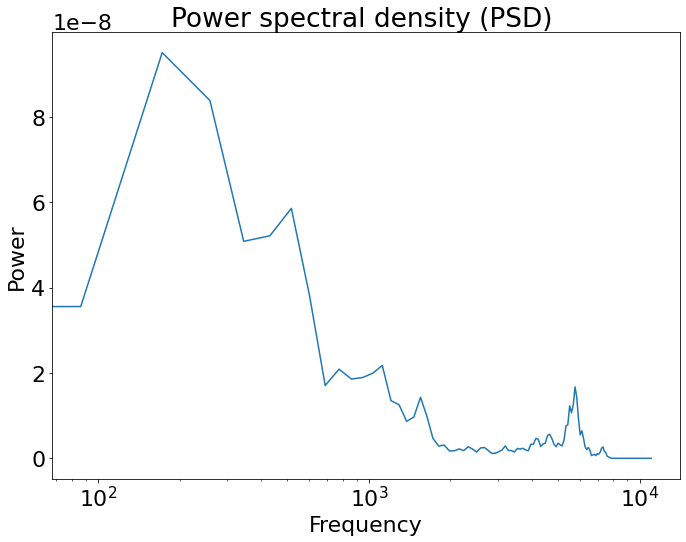

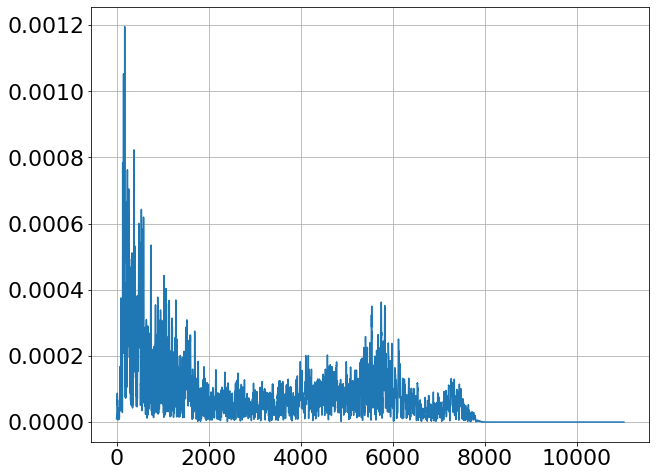

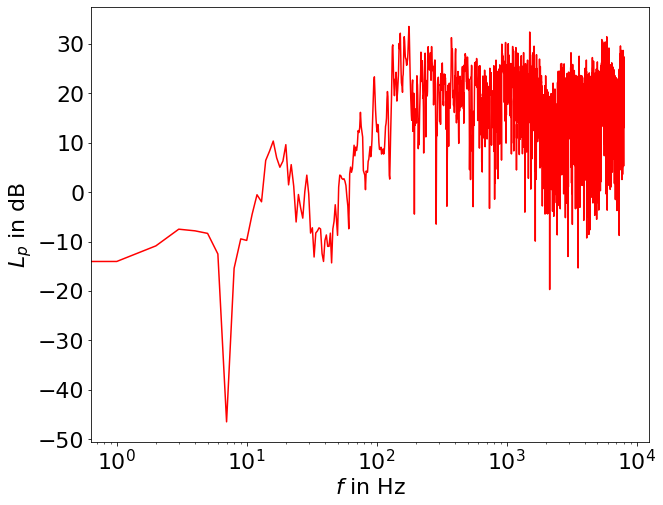

9 9


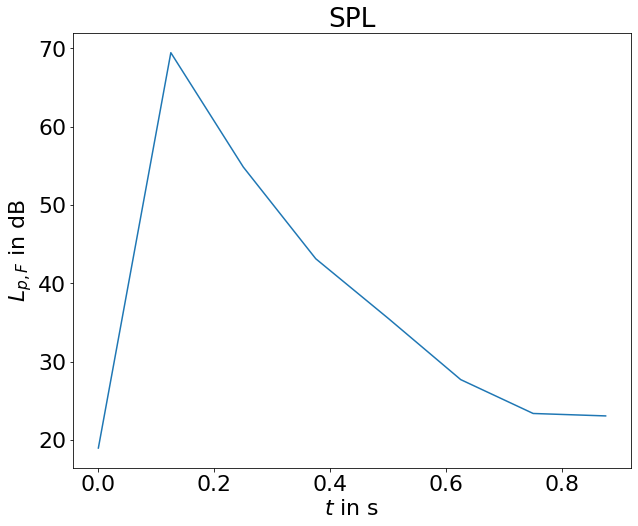

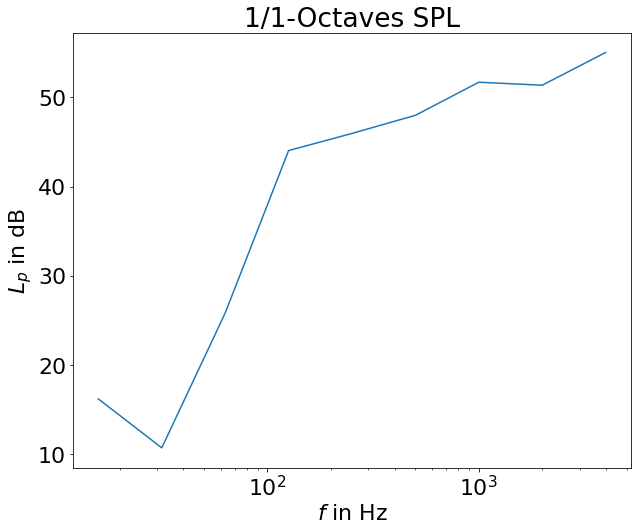

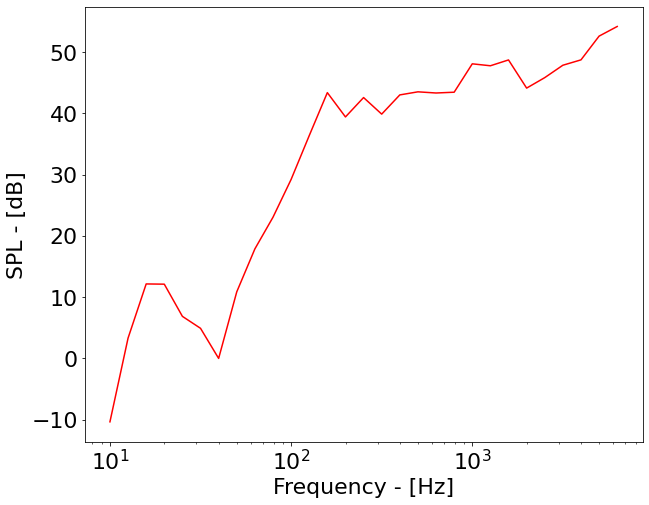

Reverberation Time
[7.18968802 7.23878439 7.34684224 7.07907771 5.71482262]
Noise coupling
Background noise 
(OctaveBand([  63.09573445  125.89254118  251.18864315  501.18723363 1000.
 1995.26231497]), array([29.49079851, 45.35901501, 52.6403142 , 57.18088183, 60.5129657 ,
       60.34038259]))
Operational Speech level
(OctaveBand([  63.09573445  125.89254118  251.18864315  501.18723363 1000.
 1995.26231497]), array([[24.10375174, 44.33233499, 45.4527884 , 47.99193677, 51.55837258,
        51.39680853],
       [24.30795494, 41.90483955, 43.12892979, 45.64059328, 49.06455493,
        49.48877308],
       [22.81100585, 42.77121244, 44.07783192, 46.62178626, 49.7860163 ,
        50.11263304],
       [20.90291445, 42.39152248, 43.88872718, 46.07790305, 50.01008075,
        49.70529144],
       [22.79104395, 43.13394698, 44.75175242, 46.25550638, 50.27668502,
        50.19874206],
       [21.86331206, 43.36012631, 45.35550312, 47.11645492, 51.3368037 ,
        50.15050043],
       [23.69645

In [9]:
file_name = "/kaggle/input/sti-prediction/RVB2014_type1_rir_largeroom1_far_angla.wav" 
filename_BGN = "/kaggle/input/sti-prediction/noise-free-sound-0042.wav"
figure_name = "Figure_5_A_paper"
graph_color = "red"
process_and_plot_audio_files(file_name, filename_BGN, figure_name, graph_color)

## 3.2 - Target Domain data examples

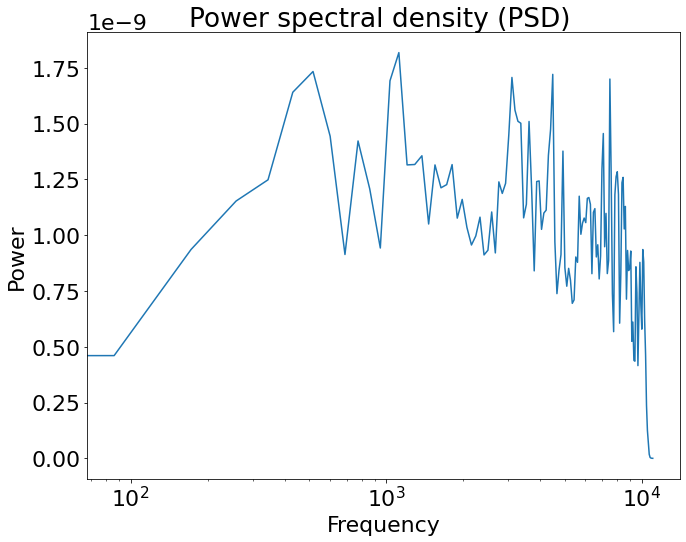

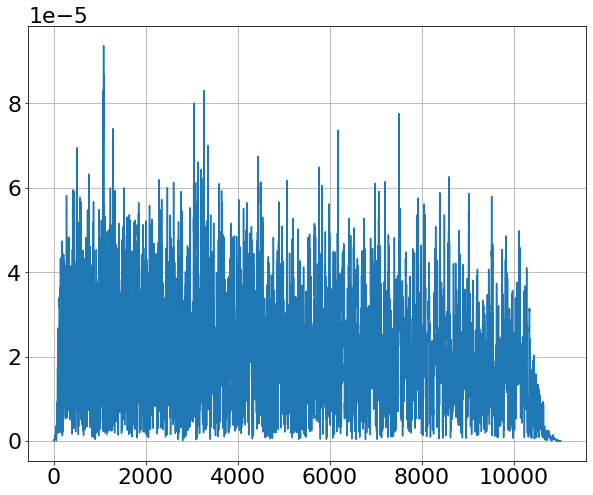

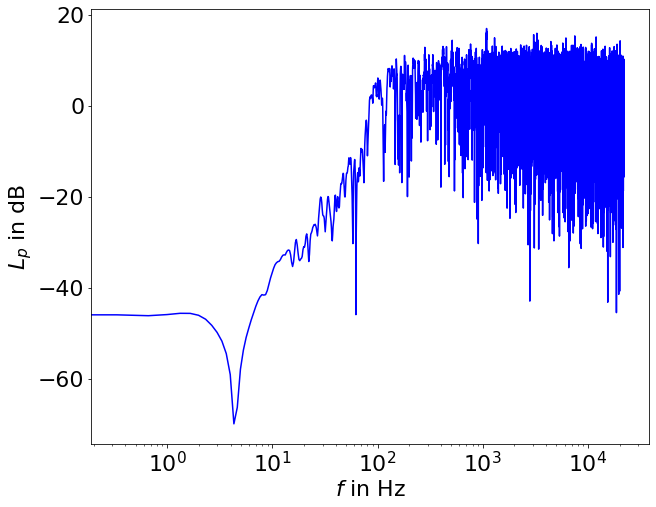

10 10


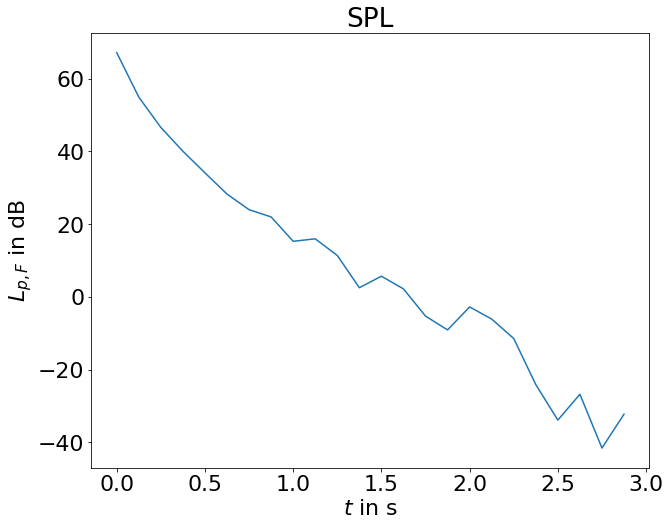

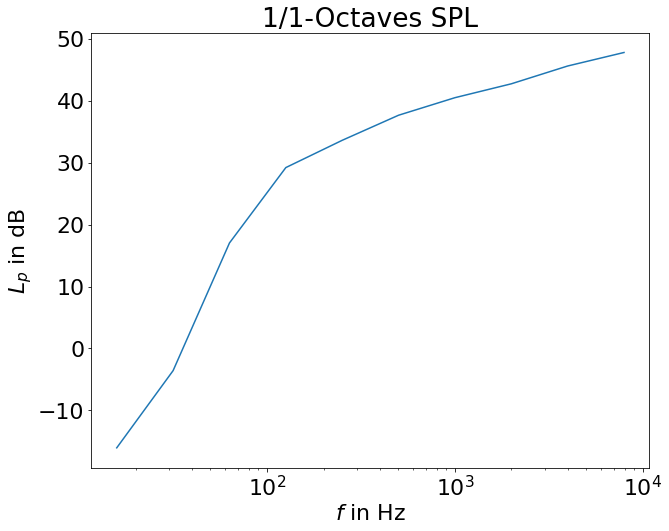

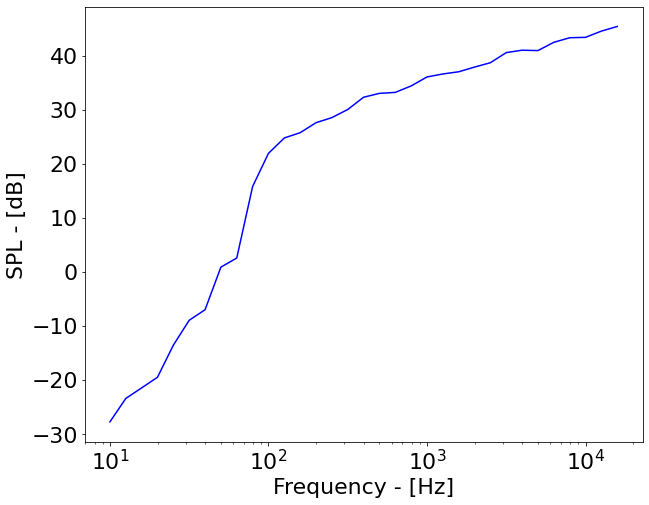

Reverberation Time
[1.61136074 1.67013601 1.48601916 1.43565645 1.39528347]
Noise coupling
Background noise 
(OctaveBand([  63.09573445  125.89254118  251.18864315  501.18723363 1000.
 1995.26231497]), array([29.49079851, 45.35901501, 52.6403142 , 57.18088183, 60.5129657 ,
       60.34038259]))
Operational Speech level
(OctaveBand([  63.09573445  125.89254118  251.18864315  501.18723363 1000.
 1995.26231497]), array([15.93852023, 29.02656302, 33.56596942, 37.5502181 , 40.42057547,
       42.62345492]))
SNR
[-13.55227829 -16.33245199 -19.07434478 -19.63066373 -20.09239023
 -17.71692767]


In [10]:
file_name = "/kaggle/input/sti-prediction/Pyroom_mic2_Dim_10 5 2__RT_0.9_seg1613399128.wav"
filename_BGN = "/kaggle/input/sti-prediction/noise-free-sound-0042.wav"
figure_name = "Figure_5_B_paper"
graph_color = "blue"
process_and_plot_audio_files(file_name, filename_BGN, figure_name, graph_color)

# 4 - Creating the STI Dataset (Source and Target Domains)

In [11]:
"""
- Simulated STI values via Schroeder Equation
"""

def BGN_audios(folder):
   
    allFiles = []
    
    for root, dirs, files in os.walk(folder):
        allFiles += [os.path.join(root, f) for f in files
                     if f.endswith('.wav')]

    return allFiles

def RIR_audios(folder):
   
    allFiles = []
    
    for root, dirs, files in os.walk(folder):
        allFiles += [os.path.join(root, f) for f in files
                     if f.endswith('.wav')]

    return allFiles


def RIR_BGN_2_STI(RIR_file, BGN_file, id_number):
    """
    Calculates the Speech Transmission Index (STI) from RIR and BGN audio files.

    The calculation is based on the IEC 60268-16 standard, which involves determining
    the Modulation Transfer Function (MTF) from the room's reverberation time (RT)
    and the signal-to-noise ratio (SNR).

    Args:
        RIR_file (str): Path to the Room Impulse Response WAV file.
        BGN_file (str): Path to the Background Noise WAV file.
        id_number (int): A unique identifier for the simulation.

    Returns:
        numpy.ndarray: An array containing the room ID, calculated STI, frequency values,
                       RIR Power Spectral Density (PSD), and BGN PSD.
    """

    sig_BGN, sr_BGN = librosa.load(BGN_file)
    freqs_BGN, psd_BGN = signal.welch(sig_BGN,sr_BGN)
        
    sig_RIR, sr_RIR = librosa.load(RIR_file)
    freqs_RIR, psd_RIR = signal.welch(sig_RIR, sr_RIR)

    psd_BGN = psd_BGN[0:len(freqs_BGN[freqs_BGN < 8000])]
    psd_RIR = psd_RIR[0:len(freqs_RIR[freqs_RIR< 8000])]

    xvals = np.arange(0,8001,10)
    psd_BGN = np.interp(xvals, freqs_BGN[freqs_BGN < 8000], psd_BGN)
    psd_RIR = np.interp(xvals, freqs_RIR[freqs_RIR< 8000], psd_RIR)

    psd_BGN = 10 * np.log10(psd_BGN)
    psd_RIR = 10 * np.log10(psd_RIR)
    

    RT_octave = acoustics.room.t60_impulse(RIR_file, 
                                           acoustics.bands.octave(125, 8000),
                                           rt='t30')

    dummy_BGN = Signal.from_wav(BGN_file)
    BGN_octave = acoustics.signal.octaves(dummy_BGN, 
                                          dummy_BGN.fs,
                                          density=False,  
                                          frequencies=acoustics.bands.octave(125, 8000), 
                                          ref=2e-05)
    
    Ln = BGN_octave[1]
    
    # IEC 60268-16
    Op_SL_octave = [61.4, 65.6, 62.3, 56.8, 51.3, 42.6, 33.6]

    
    modulation_freq = np.array([0.63,
                                0.8, 
                                1.0, 
                                1.25, 
                                1.6, 
                                2.0, 
                                2.5, 
                                3.15,
                                5.0, 
                                6.3, 
                                8.0, 
                                10, 
                                12.5])
    
    octave_freq = np.array([125, 250, 500, 1000, 2000, 4000, 8000])
    
    mTF = np.zeros((len(modulation_freq), len(octave_freq)))
    SNR = np.zeros((len(modulation_freq), len(octave_freq)))
    TI = np.zeros((len(modulation_freq), len(octave_freq)))
    MTI = np.zeros(len(octave_freq))
    
    alphas_Male = np.array([0.085, 0.127, 0.230, 0.233, 0.309, 0.224, 0.173])
    betas_Male =  np.array([0.085, 0.078, 0.065, 0.011, 0.047, 0.095])
   
    for m in range(0,mTF.shape[0]):
        
        for octave in range(0,mTF.shape[1]):

            mTF[m,octave] = (( 1 + (2*math.pi*modulation_freq[m]*RT_octave[octave]/ 13.82)**2 )**
                             (-1/2))*(1 + 10**( -(Op_SL_octave[octave]  - Ln[octave])/10 ))**(-1)

            SNR[m,octave] = 10 * np.log10( mTF[m,octave] / (1 - mTF[m,octave] ))

            if SNR[m,octave] > 15:
                 SNR[m,octave] = 15
            if SNR[m,octave] < -15:
                 SNR[m,octave] = -15 

            TI[m,octave] = (SNR[m,octave] + 15 ) / 30
            
            MTI[octave] = ( 1 / len(modulation_freq) ) * sum( TI[:,octave])

            if MTI[octave] > 1:
                 MTI[octave] = 1

            STI = np.dot(alphas_Male,MTI)

    room_id = id_number  * np.ones(( len(xvals ), 1) )
    room_STI = np.round(STI,3) * np.ones(( len(xvals ), 1) )
    
    output = np.concatenate([room_id, room_STI, 
                             xvals.reshape(len(xvals),1),
                             psd_RIR.reshape(len(psd_RIR),1), 
                             psd_BGN.reshape(len(psd_BGN),1) ] , 1)

    return  output

folder_RIR = r"RIR_simuladas"
folder_BGN = r"Background_Noise"

BGN = BGN_audios(folder_BGN)
RIR = RIR_audios(folder_RIR)

# Creating the synthetic samples
id_number = 0
dummy_RIR = random.randint(0,10500)
dummy_BGN = random.randint(0,686)

def generate_STI_database():
    
    A = RIR_BGN_2_STI(RIR[dummy_RIR], BGN[dummy_BGN], id_number)

    id_number = 1
    while id_number < 30001:

        dummy_RIR = random.randint(0,8)
        dummy_BGN = random.sample(range(1, 686), 5)

        for i in dummy_BGN:
            A = np.vstack([A, RIR_BGN_2_STI(RIR[dummy_RIR], BGN[i], id_number )])
            id_number =  id_number + 1
            
            # save the data
            # pd.DataFrame(A).to_csv("Train_Database_identification.csv")
            
        print(id_number)

    dataset = pd.DataFrame({'c1': A[:,0], 'c2': A[:,1], 
                            'c3': A[:,2], 'c4': A[:,3], 
                            'c5': A[:,4]})

    # dataset.to_pickle("./dummy.pkl")
    # savez_compressed('data_compres.npz', A)
    # unpickled_df = pd.read_pickle("./dummy.pkl")

# 5 - Variational Autoencoder (VAE)

In [12]:
A = np.load('../input/sti-prediction/data_compres.npz')
A.files
A = A['arr_0']


df = pd.DataFrame({'c1': A[:,0], 'c2': A[:,1], 
                   'c3': A[:,2], 'c4': A[:,3], 
                   'c5': A[:,4]})


def read_data(file_path):

    df.rename(columns = {'c1': 'Room-id', 
                         'c2': 'STI', 
                         'c3': 'Freq - [Hz]', 
                         'c4': 'PSD(RIR)', 
                         'c5': 'PSD(BGN)' }, 
                         inplace=True)
        
    label_encoder = LabelEncoder()
    
    n_bins = 10 
    y = label_encoder.fit_transform(pd.cut(df['STI'],
                                           n_bins, 
                                           retbins=True)[0]
                                   )

    df['STI'] = y   
    df.dropna(axis=0, how='any', inplace=True)

    return df



def plot_axis(ax, x, y, title):

    ax.plot(x, y)
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)


def plot_activity(activity, data):

    fig, (ax0, ax1) = plt.subplots(nrows=2,
         figsize=(15, 10),
         sharex=True)
    plot_axis(ax0, data['Freq - [Hz]'], data['PSD(RIR)'], 'PSD(RIR)')
    plot_axis(ax1, data['Freq - [Hz]'], data['PSD(BGN)'], 'PSD(BGN)')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()
    plt.close()


def create_segments_and_labels(df, freq_steps, step, label_name):
    
    N_FEATURES = 2
    segments = []
    labels = []
    
    for i in range(0, len(df) - freq_steps, step):
        xs = df['PSD(RIR)'].values[i: i + freq_steps]
        ys = df['PSD(BGN)'].values[i: i + freq_steps]
        xs = xs[1:]
        ys = ys[1:]
        
        label = stats.mode(df[label_name][i: i + freq_steps])[0][0]
        segments.append([xs, ys])
        labels.append(label)

    reshaped_segments = np.asarray(segments, 
                                   dtype= np.float32).reshape(-1, 
                                                              freq_steps-1, 
                                                              N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels


pd.options.display.float_format = '{:.3f}'.format

LABELS = ["1","2","3","4","5","6","7","8","9","10"]
TIME_PERIODS = len(np.arange(0,8001,10))
STEP_DISTANCE = TIME_PERIODS

print("\n--- Load, inspect, and transform data ---\n")
print("Load dataset from npz")

read_data(df)

show_basic_dataframe_info(df, 20)

print("\n--- Reshape the data into segments ---\n")

df_train = df[df['Room-id'] <= 25000]
df_test = df[df['Room-id'] > 25000]
df_source_total = df

scaler = MinMaxScaler()
column_names_to_normalize = ['PSD(RIR)','PSD(BGN)']

x = df_train[column_names_to_normalize].values

# scaler.fit_transform(x)
# joblib.dump(scaler, 'scaler.save')

x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, 
                       columns=column_names_to_normalize, 
                       index=df_train.index)

df_train[column_names_to_normalize] = df_temp

# Normalize the test set using the same scaler
x = df_test[column_names_to_normalize].values
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled,
                       columns=column_names_to_normalize, 
                       index=df_test.index)

df_test[column_names_to_normalize] = df_temp

df_train = df_train.round({'PSD(RIR)': 6, 'PSD(BGN)': 6})
df_test =  df_test.round({'PSD(RIR)': 6, 'PSD(BGN)': 6})

# Reshape the training data into segments so that
# they can be processed by the VAE network
# Set the column name of the label vector

LABEL = "STI"

x_train, y_train = create_segments_and_labels(df_train,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)


x_test, y_test = create_segments_and_labels(df_test,
                                            TIME_PERIODS,
                                            STEP_DISTANCE,
                                            LABEL)

X_source_total, y_source_total = create_segments_and_labels(df_source_total,
                                            TIME_PERIODS,
                                            STEP_DISTANCE,
                                            LABEL)

print("Done - loading source data from 30.000 classrooms")


--- Load, inspect, and transform data ---

Load dataset from npz
Number of columns in dataframe: 5
Number of rows in dataframe: 24030801

Print the first 20 rows
    Room-id  STI  Freq - [Hz]  PSD(RIR)  PSD(BGN)
0     0.000    1        0.000  -102.089   -53.655
1     0.000    1       10.000   -99.591   -52.341
2     0.000    1       20.000   -98.015   -51.333
3     0.000    1       30.000   -96.861   -50.516
4     0.000    1       40.000   -95.951   -49.828
5     0.000    1       50.000   -95.198   -49.235
6     0.000    1       60.000   -94.557   -48.713
7     0.000    1       70.000   -93.998   -48.247
8     0.000    1       80.000   -93.504   -47.826
9     0.000    1       90.000   -92.860   -47.629
10    0.000    1      100.000   -92.036   -47.740
11    0.000    1      110.000   -91.344   -47.854
12    0.000    1      120.000   -90.747   -47.971
13    0.000    1      130.000   -90.222   -48.092
14    0.000    1      140.000   -89.754   -48.215
15    0.000    1      150.000   -89.3

# Definition of source domain data

In [13]:
print("\n--- Reshape data to be accepted by the Keras module ---\n")

print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'Training sample dimension')

print('y_train shape: ', y_train.shape)
y_train_source =  y_train # ys value 
print('y_test shape: ', y_test.shape)

print("Checking the dimensions of the training dataset")

print("Dimension before feature pre processing ")
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

max_psd_freq = 1600 

print("Reshape the training data for the model input layer")
x_train_reshaped_source = x_train.reshape(x_train.shape[0], max_psd_freq)
x_train_reshaped=x_train_reshaped_source  # Xs value
print(x_train_reshaped_source.shape)

print("Dimension after restructuring - test")
x_test_reshaped = x_test.reshape(x_test.shape[0], max_psd_freq)
print(x_test_reshaped.shape)

print("Dimension of source total after restructuring - test")
X_source_total_reshaped = X_source_total.reshape(X_source_total.shape[0], max_psd_freq)
print(X_source_total_reshaped.shape)
print(y_source_total.shape)

x_tr = x_train_reshaped_source
x_te = x_test_reshaped


--- Reshape data to be accepted by the Keras module ---

x_train shape:  (25000, 800, 2)
25000 Training sample dimension
y_train shape:  (25000,)
y_test shape:  (4999,)
Checking the dimensions of the training dataset
Dimension before feature pre processing 
x_train shape: (25000, 800, 2)
x_test shape: (4999, 800, 2)
Reshape the training data for the model input layer
(25000, 1600)
Dimension after restructuring - test
(4999, 1600)
Dimension of source total after restructuring - test
(30000, 1600)
(30000,)


## 5.1 - Training statistics for the source domain

0.19400799999999999 0.14331537229481


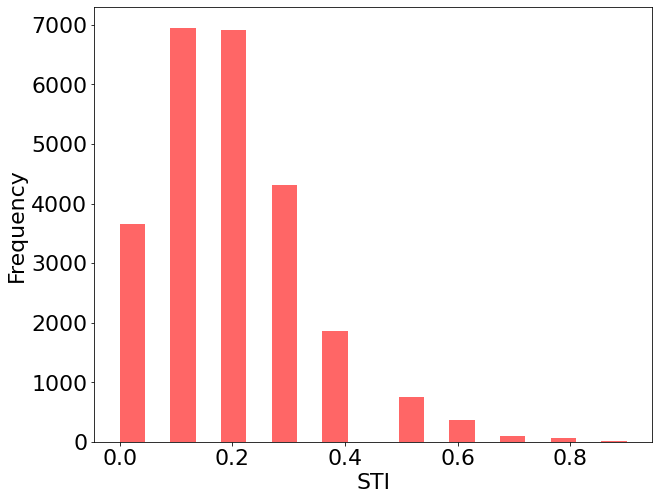

In [14]:
plt.rcParams.update({'font.size': 22})
data_source_ANOVA = y_train/10

mu, std = stats.norm.fit(data_source_ANOVA)

# Plot
plt.hist(data_source_ANOVA, bins=20, alpha=0.6, color='r')
plt.xlabel('STI')
plt.ylabel('Frequency')

print(mu, std)

plt.savefig('Figura_21_a.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
plt.close()

0.19400799999999999 0.14331537229481


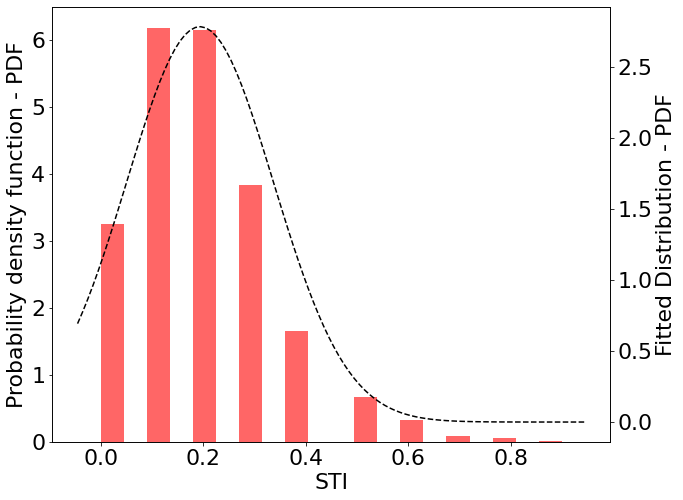

In [15]:
plt.hist(data_source_ANOVA, bins=20, density=True, alpha=0.6, color='r')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)

plt.xlabel('STI')
plt.ylabel('Probability density function - PDF')

ax2 = plt.twinx()
ax2.plot(x, p, 'k--')
ax2.set_ylabel('Fitted Distribution - PDF', color='k')

print(mu, std)

plt.savefig('Figure_6_A_paper.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
plt.close()

0.19400799999999999 0.14331537229481


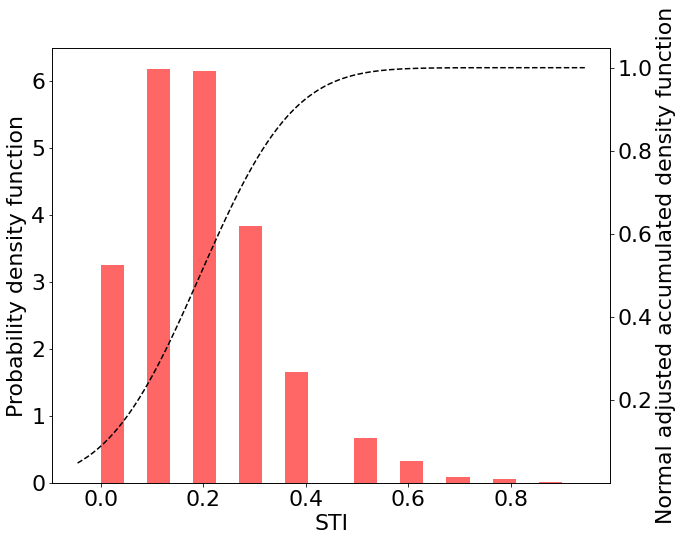

In [16]:
plt.hist(data_source_ANOVA, bins=20, density=True, alpha=0.6, color='r')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
c = stats.norm.cdf(x, mu, std)

plt.xlabel('STI')
plt.ylabel('Probability density function')
ax2 = plt.twinx()

ax2.plot(x, c, 'k--')
ax2.set_ylabel('Normal adjusted accumulated density function', color='k')

print(mu, std)
plt.savefig('Figure_21_e.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
plt.close()

## 5.2 - Training the variational autoencoder (VAE) network

In [17]:
"""
## 3 - Variational Autoencoder with Theoretical ELBO Implementation
"""

print("Building VAE with proper ELBO objective...")

# Model parameters
batch_size, n_epoch = 1, 5    # 1, 10
n_hidden, z_dim = 64, 2       # 64, 2
D = x_tr.shape[1]            # Input dimension for scaling over dimensions

# Encoder
x = Input(shape=(x_tr.shape[1:]))
x_encoded = Dense(n_hidden, activation='relu')(x)            # FC-64
x_encoded = Dense(n_hidden//2, activation='relu')(x_encoded) # FC-32

mu = Dense(z_dim)(x_encoded)
log_var = Dense(z_dim)(x_encoded)

# log_var = log(σ²)
# σ² = exp(log_var)
# σ = sqrt(exp(log_var)) = exp(log_var * 0.5)

def sampling(args):
    mu, log_var = args
    eps = K.random_normal(shape=(batch_size, z_dim), mean=0., stddev=1.0)
    return mu + K.exp(0.5 * log_var) * eps 

z = Lambda(sampling, output_shape=(z_dim,))([mu, log_var])

# Decoder
z_decoder1 = Dense(n_hidden//2, activation='relu') # FC-32
z_decoder2 = Dense(n_hidden, activation='relu')    # FC-64
y_decoder = Dense(x_tr.shape[1], activation='sigmoid')

z_decoded = z_decoder1(z)
z_decoded = z_decoder2(z_decoded)
y = y_decoder(z_decoded)

# Theoretical ELBO Loss (sum-over-dimensions)
# Reconstruction: BCE × D matches E[log p(x|z)] in ELBO
reconstruction_loss = losses.binary_crossentropy(x, y) * D
kl_loss = 0.5 * K.sum(K.square(mu) + K.exp(log_var) - log_var - 1, axis=-1)
vae_loss = reconstruction_loss + kl_loss

# Build VAE model
vae = Model(x, y)
vae.add_loss(vae_loss)

# Add metrics with proper names
vae.add_metric(reconstruction_loss, name='reconstruction_loss')
vae.add_metric(kl_loss, name='kl_loss')
vae.add_metric(vae_loss, name='elbo_loss')

vae.compile(optimizer='rmsprop')
vae.summary()

print(f"Training VAE with D={D} input dimensions")
print("ELBO formulation: E[log p(x|z)] - KL(q(z|x) || p(z))")

vae.fit(x_tr,
       shuffle=True,
       epochs=n_epoch,
       batch_size=batch_size,
       validation_data=(x_te, None), 
       verbose=1)

# Encoder model
encoder = Model(x, mu)
encoder.summary()

Building VAE with proper ELBO objective...
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1600)]       0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 64)           102464      input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 32)           2080        dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 2)            66          dense_1[0][0]                    
___________________________________________________

## 5.3 - VAE network loss function values

In [18]:
vae.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1600)]       0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 64)           102464      input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 32)           2080        dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 2)            66          dense_1[0][0]                    
______________________________________________________________________________________________

dict_keys(['loss', 'reconstruction_loss', 'kl_loss', 'elbo_loss', 'val_loss', 'val_reconstruction_loss', 'val_kl_loss', 'val_elbo_loss'])


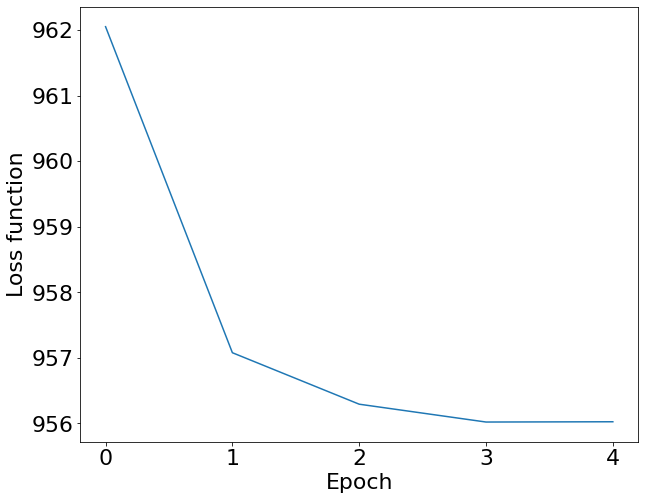

In [19]:
print(vae.history)
print(vae.history.history.keys())
loss_values = vae.history.history['loss']
plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss function')
plt.savefig('Figure_8_A_Loss_function_paper.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
plt.show()
plt.close()

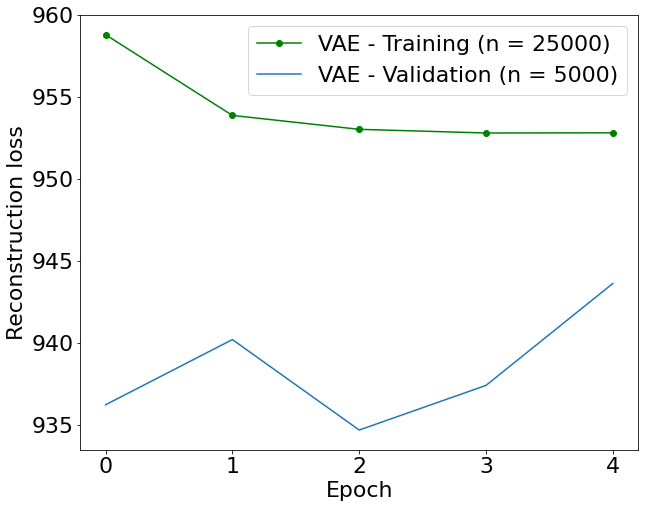

In [20]:
component1_values = vae.history.history['reconstruction_loss']
component2_values = vae.history.history['val_reconstruction_loss']

plt.plot(component1_values, 'go-', label='VAE - Training (n = 25000)')
plt.plot(component2_values, label='VAE - Validation (n = 5000)')
plt.xlabel('Epoch')
plt.ylabel('Reconstruction loss')
plt.legend()
plt.savefig('Figure_8_A_paper.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
plt.close()

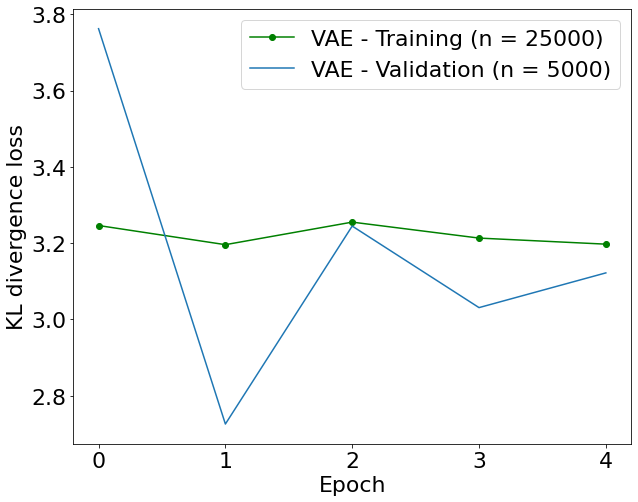

In [21]:
# Extract KL loss values from history and plot them
component1_values = vae.history.history['kl_loss']
component2_values = vae.history.history['val_kl_loss']

plt.plot(component1_values, 'go-', label='VAE - Training (n = 25000)')
plt.plot(component2_values, label='VAE - Validation (n = 5000)')

plt.xlabel('Epoch')
plt.ylabel('KL divergence loss')
plt.legend()
plt.savefig('Figure_8_B_paper.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
plt.close()

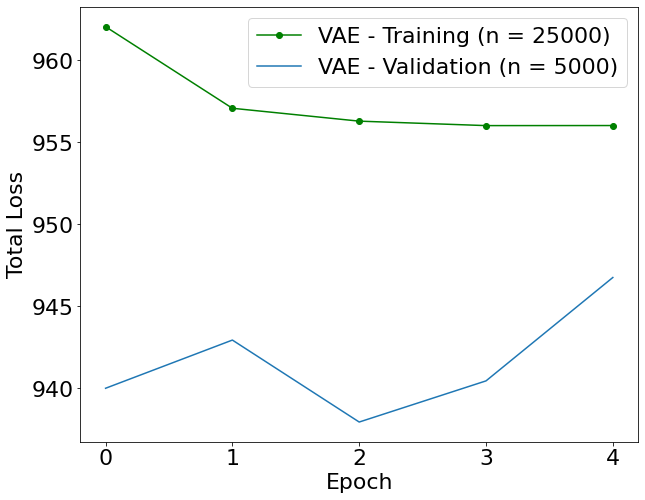

In [22]:
component1_values = vae.history.history['elbo_loss']
component2_values = vae.history.history['val_elbo_loss']

plt.plot(component1_values, 'go-', label='VAE - Training (n = 25000)')
plt.plot(component2_values, label='VAE - Validation (n = 5000)')

plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.legend()
plt.savefig('Figure_9_paper.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
plt.close()

# 6 - Hyperparameter Optimization (HPO) of the VAE Model

In [23]:
def start_Autoencoder(features,trials,  plot_graph = False):

  # VAE model
  def create_model(activation_func, neurons, zdim_num, kernel_initializer):
    clear_session()
    
    batch_size, n_epoch = 1, 10 # default 1, 10
    n_hidden, z_dim = neurons, zdim_num 

    # encoder
    x = Input(shape=(x_tr.shape[1:]))
    x_encoded = Dense(n_hidden, 
                      activation=activation_func, 
                      kernel_initializer=kernel_initializer)(x)
    x_encoded = Dense(n_hidden//2, activation=activation_func)(x_encoded)

    mu = Dense(z_dim)(x_encoded)
    log_var = Dense(z_dim)(x_encoded)

    # sampling function
    def sampling(args):
        mu, log_var = args
        eps = K.random_normal(shape=(batch_size, z_dim), mean=0., stddev=1.0)
        return mu + K.exp(log_var) * eps

    z = Lambda(sampling, output_shape=(z_dim,))([mu, log_var])

    # decoder
    z_decoder1 = Dense(n_hidden//2, activation='relu')
    z_decoder2 = Dense(n_hidden, activation='relu')
    y_decoder = Dense(x_tr.shape[1], activation='sigmoid')

    z_decoded = z_decoder1(z)
    z_decoded = z_decoder2(z_decoded)
    y = y_decoder(z_decoded)

    reconstruction_loss = objectives.binary_crossentropy(x, y) * x_tr.shape[1]
    kl_loss = 0.5 * K.sum(K.square(mu) + K.exp(log_var) - log_var - 1, axis = -1)
    vae_loss = reconstruction_loss + kl_loss

    vae = Model(x, y)
    
    vae.add_loss(vae_loss)
    vae.add_metric(reconstruction_loss, name='reconstruction_loss')
    vae.add_metric(kl_loss, name='kl_loss')
    vae.add_metric(vae_loss, name='vae_loss')
    autoencoder = vae

    return autoencoder

  # Objective function to optimize by OPTUNA module
    
  def objective(trial):
    activation_func = trial.suggest_categorical("activation_func", 
                                           ["relu", "sigmoid", "swish"])
    neurons = trial.suggest_int("neurons", 2,64)
    zdim_num = trial.suggest_int("dim_latent_space", 2,128)
    
    if (activation_func == "relu"):
      model = create_model(activation_func, 
                           neurons, 
                           zdim_num, 
                           kernel_initializer="HeUniform")
    else:
      model = create_model(activation_func,
                           neurons,
                           zdim_num,
                           kernel_initializer="GlorotUniform")
    
    model.compile(optimizer='rmsprop')
        
    callback = keras.callbacks.EarlyStopping(monitor='loss', patience=50)
    history = model.fit(features, 
                        features,
                        batch_size = 1,
                        epochs=10,           # default 10
                        callbacks = [callback], 
                        verbose = 0)
    
    return history.history["loss"][-1]
  
  study = optuna.create_study(direction='minimize')

  study.optimize(objective, n_trials=trials)
    
  print('Best hyperparameters found via Optuna: \n', study.best_params)
    
  if (study.best_params['activation_func'] == "relu"):
    model = create_model(study.best_params['activation_func'],
                         int(study.best_params['neurons']),
                         int(study.best_params['dim_latent_space']),
                         kernel_initializer="HeUniform")
  else:
    model = create_model(study.best_params['activation_func'],
                        int(study.best_params['neurons']),
                        int(study.best_params['dim_latent_space']),
                        kernel_initializer="GlorotUniform")

  model.compile(optimizer='rmsprop')
  model.summary()
    
    
  callback = keras.callbacks.EarlyStopping(monitor='loss', patience=50)
  history = model.fit(features, 
                      features,
                      batch_size = 1,
                      epochs=n_epoch, 
                      callbacks = [callback],
                      verbose = 0)

  result = model.predict(features)
    
  print(f'RMSE Autoencoder: {np.sqrt(mean_squared_error(features, result))}')
  print('')

  # extract_f || MSE || best params OPTUNA

  return mean_squared_error(features, result), study.best_params, study


# Run HPO hyperparameter optimization on the VAE model
OPTUNA_HPO_TRIALS = 10   # default 10

# AutoEncoder_MSE, AutoEncoder_hyperparams, Study = start_Autoencoder(features = x_tr, 
#                                                                     trials = OPTUNA_HPO_TRIALS, 
#                                                                     plot_graph=True)


# df_VAE = Study.trials_dataframe()
# print(df_VAE)

# plot_optimization_history(Study)
# plot_param_importances(Study)
# optuna.visualization.plot_param_importances(
#     Study, target=lambda t: t.duration.total_seconds(), target_name="duration"
# )
# plot_edf(Study)
# plot_contour(Study)

# 7 - Visualization of Embeddings generated via VAE network

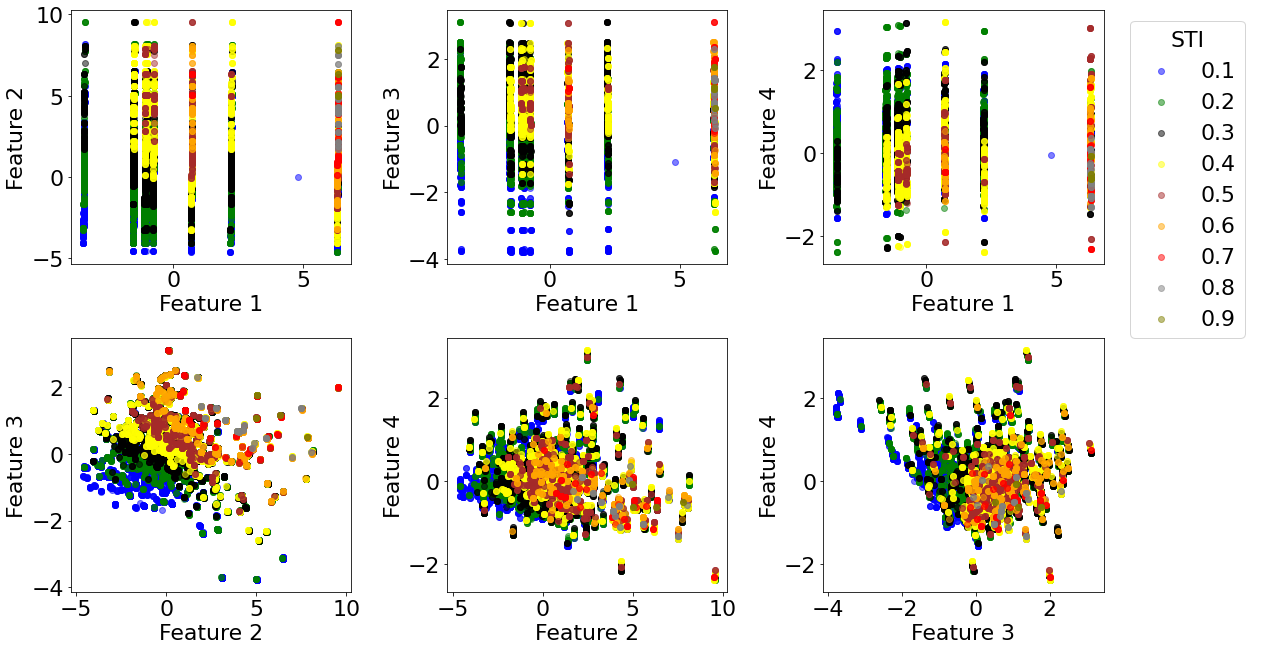

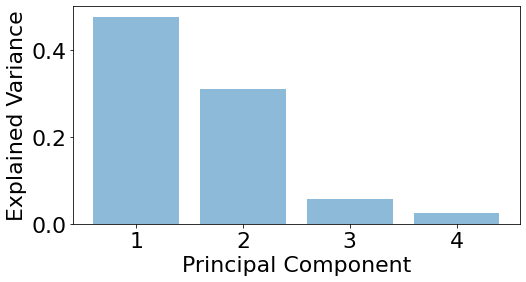

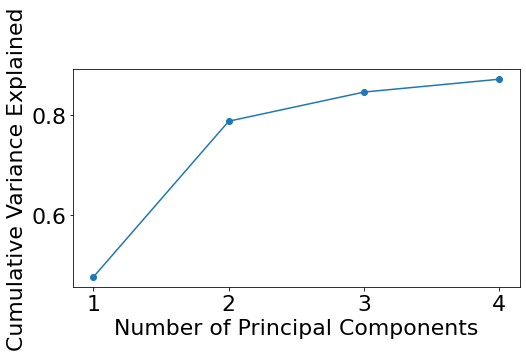

   Principal Component  Explained Variance  Cumulative Variance Explained
0                    1               0.477                          0.477
1                    2               0.311                          0.788
2                    3               0.058                          0.846
3                    4               0.026                          0.872


In [24]:
cmap = matplotlib.cm.get_cmap('Spectral')
label_mapping = {1: 0.1, 2: 0.2, 3: 0.3, 4: 0.4, 5: 0.5, 6: 0.6, 7: 0.7, 8: 0.8, 9: 0.9}

def plot_representation(features, labels, rep_type, pca_variance_ratio):
    fig = plt.figure(figsize=(20, 10))
    gs = GridSpec(2, 4, width_ratios=[1, 1, 1, 0.2]) 
    
    axes = [[None, None, None], [None, None, None]]
    for i, pair in enumerate(combinations([0, 1, 2, 3], 2)):
        row, col = i // 3, i % 3
        axes[row][col] = plt.subplot(gs[row, col])
        for label, color in zip([1, 2, 3, 4, 5, 6, 7, 8, 9], ['blue', 'green', 'black', 'yellow', 'brown', 'orange', 'red', 'gray', 'olive', 'gold']):
            new_label = label_mapping[label]
            axes[row][col].scatter(features[labels == label, pair[0]], 
                                   features[labels == label, pair[1]], 
                                   c=color,
                                   alpha=0.5,
                                   label=new_label)
        axes[row][col].set_xlabel(f'Feature {pair[0]+1}')
        axes[row][col].set_ylabel(f'Feature {pair[1]+1}')
    
    cax = plt.subplot(gs[:, 3]) 
    handles, labels = axes[0][0].get_legend_handles_labels()  
    cax.legend(handles, labels, title='STI')
    cax.set_axis_off()

    
    plt.tight_layout(rect=[0, 0, 0.9, 0.95]) 
    plt.savefig('Figure_10_paper.png', dpi=300, bbox_inches='tight', transparent=True)
    plt.show()
    plt.close()

    
    plt.figure(figsize=(8, 4))
    plt.bar(range(1, len(pca_variance_ratio) + 1), pca_variance_ratio, alpha=0.5, align='center')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance')
    plt.show()
    plt.savefig('Figura_27_a.png', dpi=300, bbox_inches='tight', transparent=True)
    plt.close()


    cumulative_variance = np.cumsum(pca_variance_ratio)
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Variance Explained')
    plt.grid(False)
    plt.show()
    plt.savefig('Figura_27_b.png', dpi=300, bbox_inches='tight', transparent=True)
    plt.close()


PCA_transformer = PCA(n_components=4)
x_train_reshaped_TSE = np.asarray(x_train_reshaped, dtype='float64')
PCA_representation = PCA_transformer.fit_transform(x_train_reshaped_TSE)

plot_representation(PCA_representation, y_train, 'PCA', PCA_transformer.explained_variance_ratio_)

explained_variance = PCA_transformer.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
component_number = range(1, len(explained_variance) + 1)

pca_info_df = pd.DataFrame({
        'Principal Component': component_number,
        'Explained Variance': explained_variance,
        'Cumulative Variance Explained': cumulative_variance})

print(pca_info_df)

principal_components = PCA_transformer.components_

# 8 - Saving the VAE Encoder Model to a .h5 File Extension & reproducibility

In [25]:
# Please uncomment to run
# Saving the weight matrices
# vae.save_weights('my_vae_weights.h5')
# encoder.save("my_h5_model.h5")
# Loads the weights
# `save('my_model.h5')` creates an h5 file `my_model.h5`.
# encoder.save("my_h5_model.h5")
# Can be used to rebuild the model identically. # reconstructed_model = keras.models.load_model("my_h5_model.h5")
# Let's verify: (Test to verify that the model was reloaded correctly)
# np.testing.assert_allclose(
# encoder.predict(test_input), reconstructed_model.predict(test_input)
# )
# The reconstructed model is already compiled and has retained the optimizer's state, so training can resume
# state, so training can resume:
# reconstructed_model.fit(test_input, test_target)

In [26]:
# Running `save('my_model.h5')` creates an h5 file `my_model.h5`.
encoder.save("vae_encoder.h5")

# Can be used to reconstruct the model identically.
# Load the saved model and make predictions

# Here you can load the previous trained model from the sti-prediction database to ensure reproducibility
# reconstructed_model = keras.models.load_model("/kaggle/input/sti-prediction/vae_encoder.h5")

reconstructed_model = keras.models.load_model("vae_encoder.h5")
x_te_latent_recons = reconstructed_model.predict(x_te, batch_size=1)

# Compare with the original encoder model
x_te_latent_origin = encoder.predict(x_te, batch_size=batch_size)

# Compare the reconstruction results
x_te_latent_origin == x_te_latent_recons

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       ...,
       [ True,  True],
       [ True,  True],
       [ True,  True]])

## 8.2 - Saving the encoder model as a TensorFlow graph object

In [27]:
encoder.save("current_vae_encoder.model")

tensorflow_graph = tf.saved_model.load("./current_vae_encoder.model")
z_latent = tensorflow_graph(x_te ,False, None).numpy()

# x = np.random.uniform(size=(1600))
# x = np.expand_dims(x, axis=0)
# predicted = tensorflow_graph(x ,False, None).numpy()

# Compare the results of the saved model and the original model in memory
np.round(z_latent,4) == np.round(x_te_latent_origin,4)

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       ...,
       [ True,  True],
       [ True,  True],
       [ True,  True]])

## 8.3 - Saving the training dataset predictions (x_tr_latent) into the encoded space for KPCR modeling

In [28]:
# Here, you can use either the saved model or the currently trained one. 
# Just change the path and uncomment 

reconstructed_model = keras.models.load_model("/kaggle/input/sti-prediction/vae_encoder.h5")
x_tr_latent = reconstructed_model.predict(x_tr, batch_size=1)

# x_tr_latent = encoder.predict(x_tr, batch_size=batch_size)
x_tr_latent.shape

dataset_high_z_dim = pd.DataFrame(x_tr_latent)
classes = pd.DataFrame(y_train)

# dataset_high_z_dim.append(classes)
dataset_high_z_dim['classes'] = classes
print(dataset_high_z_dim)

dataset_high_z_dim.to_csv('dataset_high_z_dim.csv')

           0      1  classes
0     -0.918 -0.509        1
1     -0.901 -0.963        2
2     -1.363 -0.671        4
3     -0.361 -1.321        3
4     -0.880 -0.993        2
...      ...    ...      ...
24995 -1.386 -0.649        5
24996  0.073  0.835        1
24997  0.348  0.668        0
24998  1.334  0.282        1
24999 -1.639  1.160        0

[25000 rows x 3 columns]


# 9 - Plotting 2D Kernel Space Visualization

## 9.1 - Plotting the latent space representation (z = 2) of the training (source dataset)

### Figure 7 c - STI - Training set (Source domain)

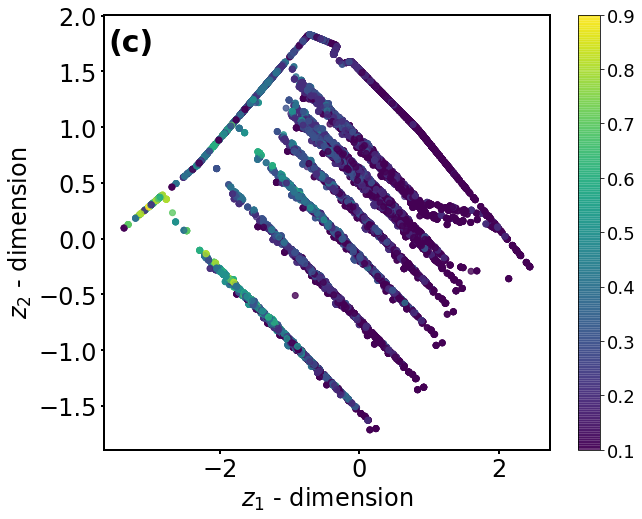

In [29]:
# Set global spine (axes border) width via rcParams doesn't exist directly,
# so we define a helper function to apply it to all future plots

def set_global_spines(ax, linewidth=2):
    for spine in ax.spines.values():
        spine.set_linewidth(linewidth)


def plot_sti_PCA_source_target_domain(x_tr_latent, y_tr):
    fig, ax = plt.subplots(figsize=(10, 8))  # Keep original figure size
    
    # Create matching normalization
    norm = matplotlib.colors.Normalize(vmin=0.1, vmax=0.9)
    
    # Create styled scatter plot
    scatter = ax.scatter(x_tr_latent[:, 0], x_tr_latent[:, 1],
                        c=y_tr/10,
                        cmap='viridis',
                        alpha=0.8,
                        norm=norm)
    
    # Colorbar with matching configuration
    cbar = fig.colorbar(scatter, ax=ax,
                       boundaries=np.linspace(0.1, 0.9, 256),
                       ticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
    cbar.ax.tick_params(labelsize=18)
    cbar.set_label('')

    # Axis styling
    ax.set_xlabel('$z_1$ - dimension', fontsize=24)
    ax.set_ylabel('$z_2$ - dimension', fontsize=24)
    ax.tick_params(axis='both', which='major', width=2, labelsize=24)

    # Subplot label with matching positioning
    ax.text(0.01, 0.97, '(c)', transform=ax.transAxes,
           fontsize=30, fontweight='bold', va='top', ha='left')

    # Spine styling
    set_global_spines(ax, linewidth=2)

    plt.savefig('Figure_7c_submission_img_paper.png', dpi=600, 
               bbox_inches='tight', transparent=True)
    plt.show()
    plt.close()

# Usage
plot_sti_PCA_source_target_domain(x_tr_latent, y_train)

### Figure 7 b

In [30]:
def set_global_spines(ax, linewidth=1):
    """Helper function to style plot spines"""
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(linewidth)

def plot_tsne_representation(features, labels):
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Create custom normalization
    norm = mcolors.Normalize(vmin=0.1, vmax=0.9)
    
    # Create scatter plot
    scatter = ax.scatter(features[:, 0], 
                        features[:, 1], 
                        c=labels/10,
                        cmap='viridis',
                        alpha=0.8,
                        norm=norm)
    
    # Create color bar
    cbar = fig.colorbar(scatter, ax=ax,
                       boundaries=np.linspace(0.1, 0.9, 256),
                       ticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
    cbar.ax.tick_params(labelsize=18)  # Set colorbar tick font size
    
    # Axis labels styling
    ax.set_xlabel('t-SNE dimension 1', fontsize=24)
    ax.set_ylabel('t-SNE dimension 2', fontsize=24)
    ax.tick_params(axis='both', which='major', width=2, labelsize=24)
    
    # Add subplot label
    ax.text(0.01, 0.97, '(b)', transform=ax.transAxes,
           fontsize=30, fontweight='bold', va='top', ha='left')
    
    # Spine styling
    set_global_spines(ax, linewidth=2)
    
    plt.savefig('Figure_7b_paper.png', dpi=600, 
               bbox_inches='tight', transparent=True)
    plt.show()

# Apply t-SNE and plot
# tSNE_transformer = TSNE(n_components=2, random_state=0)
# x_train_reshaped_TSE = np.asarray(x_train_reshaped, dtype='float64')
# tSNE_representation = tSNE_transformer.fit_transform(x_train_reshaped_TSE)
# plot_tsne_representation(tSNE_representation, y_train)

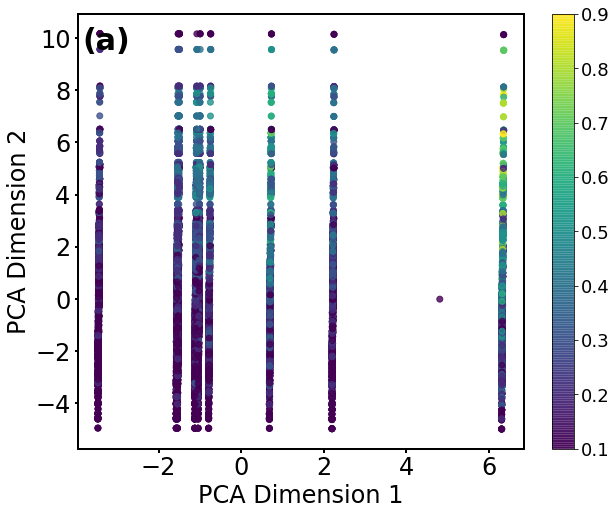

In [31]:
def set_global_spines(ax, linewidth=2):
    """Helper function to style plot spines"""
    for spine in ax.spines.values():
        spine.set_linewidth(linewidth)


def plot_pca_representation_with_colorbar(features, labels):
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Create custom normalization
    norm = matplotlib.colors.Normalize(vmin=0.1, vmax=0.9)
    
    # Create scatter plot with matching style
    scatter = ax.scatter(features[:, 0], features[:, 1],
                         c=labels/10,  # Direct label scaling
                         cmap='viridis',  # Match t-SNE colormap
                         alpha=0.8, 
                         norm=norm)
    
    # Colorbar styling to match t-SNE
    cbar = fig.colorbar(scatter, ax=ax,
                       boundaries=np.linspace(0.1, 0.9, 256),
                       ticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
    cbar.ax.tick_params(labelsize=18)
    cbar.set_label('')  # Remove label to match t-SNE
    
    # Axis labels with matching style
    ax.set_xlabel('PCA Dimension 1', fontsize=24)
    ax.set_ylabel('PCA Dimension 2', fontsize=24)
    ax.tick_params(axis='both', which='major', width=2, labelsize=24)
    
    # Subplot label styling
    ax.text(0.01, 0.97, '(a)', transform=ax.transAxes,
           fontsize=30, fontweight='bold', va='top', ha='left')
    
    # Spine styling
    set_global_spines(ax, linewidth=2)
    
    plt.savefig('Figure_7a_submission_img_paper.png', dpi=600, 
               bbox_inches='tight', transparent=True)
    plt.show()

# Apply PCA and plot
PCA_transformer = PCA(n_components=2)
x_train_reshaped_PCA = np.asarray(x_train_reshaped, dtype='float64')
PCA_representation = PCA_transformer.fit_transform(x_train_reshaped_PCA)
plot_pca_representation_with_colorbar(PCA_representation, y_train)

## 9.2 Plotting the latent space representation (z = 2) of the test (source dataset)

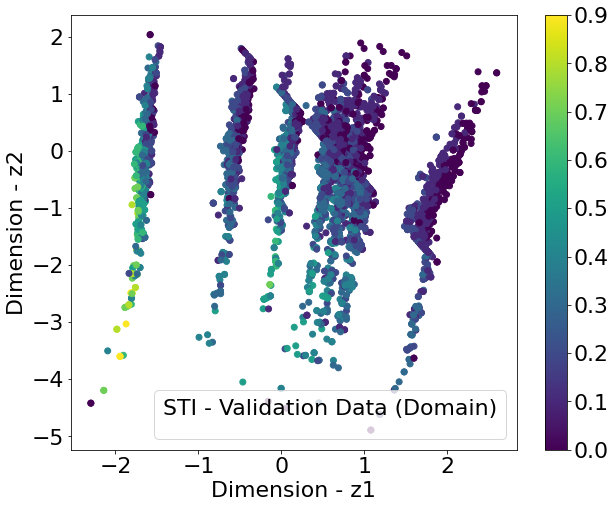

In [32]:
# Predict latent space
x_te_latent = encoder.predict(x_te, batch_size=batch_size)
y_te = y_test  
plt.scatter(x_te_latent[:, 0], x_te_latent[:, 1], c = y_te/10 )
plt.legend(title="STI - Validation Data (Domain)")
plt.xlabel('Dimension - z1')
plt.ylabel('Dimension - z2')
plt.colorbar()
plt.savefig('Figura_28_b.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
plt.close()

In [33]:
x_te_latent

array([[-1.7244551 ,  0.51735115],
       [-1.7289052 , -0.83824396],
       [-1.7156515 , -1.1734519 ],
       ...,
       [-1.6932623 , -1.294929  ],
       [-1.6765101 ,  0.43646812],
       [-1.6302848 , -0.53180075]], dtype=float32)

## 9.3 - Reconstructing the VAE latent space via embedded map encoder (Source domain)

In [34]:
x_tr_latent = encoder.predict(x_tr, batch_size=batch_size)
y_tr = y_train                            
dataset = pd.DataFrame({'z1': x_tr_latent[:, 0], 'z2': x_tr_latent[:, 1], 'STI':  y_tr})
print(dataset)

          z1     z2  STI
0     -0.987 -0.306    1
1     -1.446  0.271    2
2     -1.517 -0.397    4
3     -1.418  1.173    3
4     -1.512  0.387    2
...      ...    ...  ...
24995 -1.529 -0.429    5
24996  1.065 -0.656    1
24997  1.010 -0.348    0
24998  1.245  0.693    1
24999  0.356 -4.542    0

[25000 rows x 3 columns]


### 9.3.1 - Visualizing the latent space histogram inference

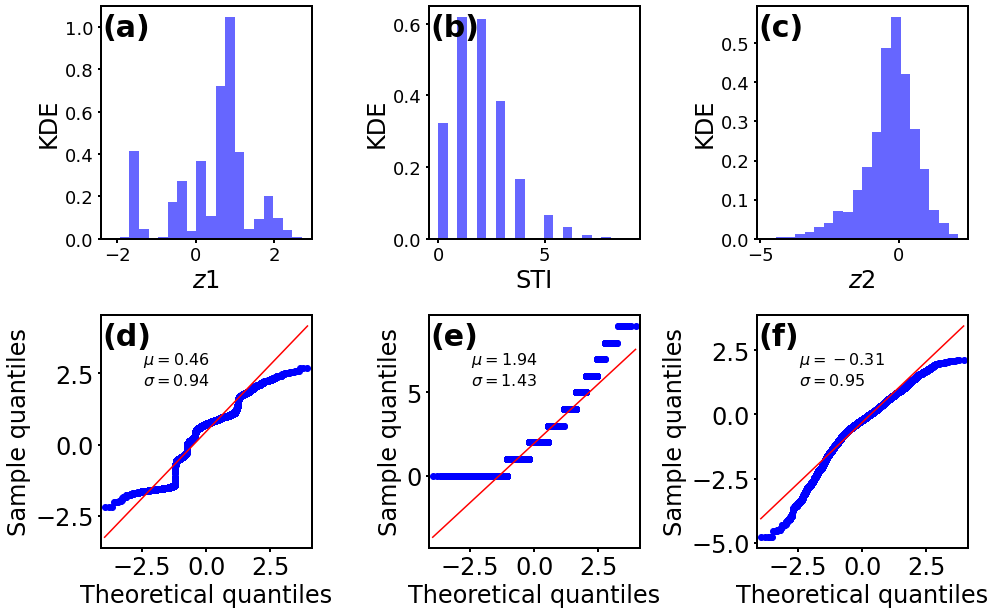

In [35]:
def plot_normality_analysis(dataset):
    fig, axes = plt.subplots(2, 3, figsize=(14, 9))
    plot_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']  # Labels for all subplots
    
    # First row: Histograms
    for i, col in enumerate(['z1', 'STI', 'z2']):
        ax = axes[0, i]
        dataset[col].plot(kind="hist", bins=20, density=True, 
                         alpha=0.6, ax=ax, color='blue')
        
        # Style components
        ax.set_xlabel(f'${col}$' if col in ['z1','z2'] else col, fontsize=24)
        ax.set_ylabel('KDE', fontsize=24)
        ax.tick_params(axis='both', which='major', width=2, labelsize=18)
        set_global_spines(ax, linewidth=2)
        
        # Add subplot label
        ax.text(0.01, 0.97, plot_labels[i], transform=ax.transAxes,
               fontsize=30, fontweight='bold', va='top', ha='left')

    # Second row: Q-Q plots
    for i, col in enumerate(['z1', 'STI', 'z2']):
        ax = axes[1, i]
        data = dataset[col]
        mu, std = stats.norm.fit(data)
        
        sm.qqplot(data, line='s', ax=ax, color='blue')
        
        # Style components
        ax.set_xlabel('Theoretical quantiles', fontsize=24)
        ax.set_ylabel('Sample quantiles', fontsize=24)  # Fixed typo
        ax.tick_params(axis='both', which='major', width=2, labelsize=24)
        set_global_spines(ax, linewidth=2)
        
        # Add fit parameters with matching style
        ax.text(0.2, 0.70, f'$\mu={mu:.2f}$\n$\sigma={std:.2f}$', 
               transform=ax.transAxes, fontsize=16)
        
        # Add subplot label
        ax.text(0.01, 0.97, plot_labels[i+3], transform=ax.transAxes,
               fontsize=30, fontweight='bold', va='top', ha='left')

    plt.tight_layout()
    plt.savefig('Figure_10_submission_img_paper.png', dpi=600, 
               bbox_inches='tight', transparent=True)
    plt.show()
    plt.close()

# Usage
plot_normality_analysis(dataset)

### 9.3.2 - Explainable AI (XAI): Visualizing the Latent Space

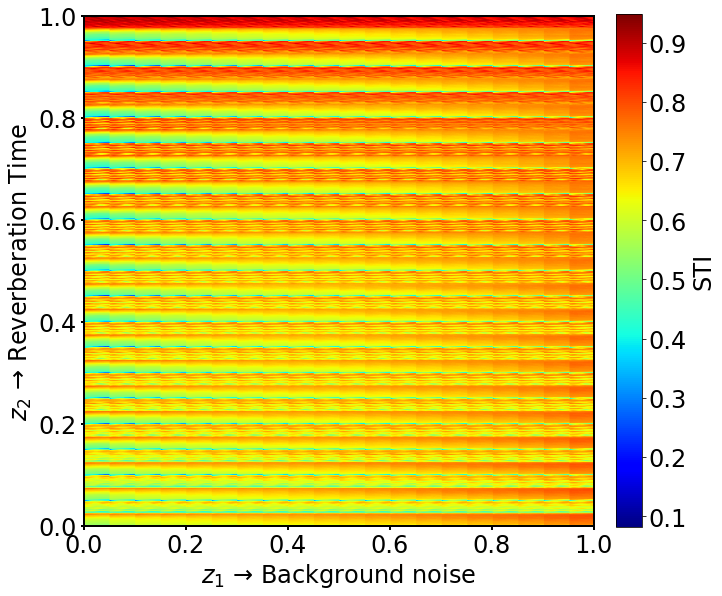

In [36]:
def plot_latent_space_grid(generator, dim1=40, dim2=40, n=20):
    # Generate grid
    grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
    grid_y = norm.ppf(np.linspace(0.05, 0.95, n))
    
    # Generate images
    figure = np.zeros((dim1 * n, dim2 * n))
    for i, xi in enumerate(grid_x):
        for j, yi in enumerate(grid_y):
            z_sample = np.array([[xi, yi]])
            x_decoded = generator.predict(z_sample, verbose=0)
            figure[i*dim1:(i+1)*dim1, j*dim2:(j+1)*dim2] = x_decoded[0].reshape(dim1, dim2)

    # Create plot with consistent style
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Main image plot
    im = ax.imshow(figure, cmap='jet', extent=[0, 1, 0, 1])
    
    # Colorbar styling
    cbar = fig.colorbar(im, fraction=0.046, pad=0.04, ax=ax)
    cbar.ax.tick_params(labelsize=24)
    cbar.set_label('STI', fontsize=24)
    
    # Axis labels with matching style
    ax.set_xlabel('$z_1$ → Background noise', fontsize=24)
    ax.set_ylabel('$z_2$ → Reverberation Time', fontsize=24)
    ax.tick_params(axis='both', which='major', width=2, labelsize=24)
    

    # Spine styling
    set_global_spines(ax, linewidth=2)
    
    plt.savefig('Figure_8_paper.png', dpi=600, 
               bbox_inches='tight', transparent=True)
    plt.show()
    plt.close()

# Usage
dim1 = 40
dim2 = 40
n = 20
z_dim = 2

decoder_input = Input(shape=(z_dim,))
_z_decoded = z_decoder1(decoder_input)
_z_decoded = z_decoder2(_z_decoded)
_y = y_decoder(_z_decoded)
generator = Model(decoder_input, _y)
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))
plot_latent_space_grid(generator)

### 9.3.3 PCA applied to the latent space during VAE network training: z Dim = 2

In [37]:
print(x_te_latent_recons.shape)
print(y_te.min())

(4999, 2)
0


### 9.3.4 - Visualizing the kernel density estimation of the source domain

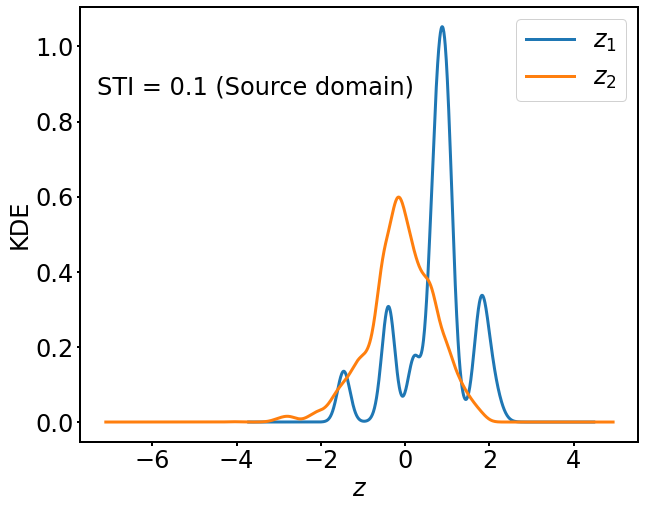

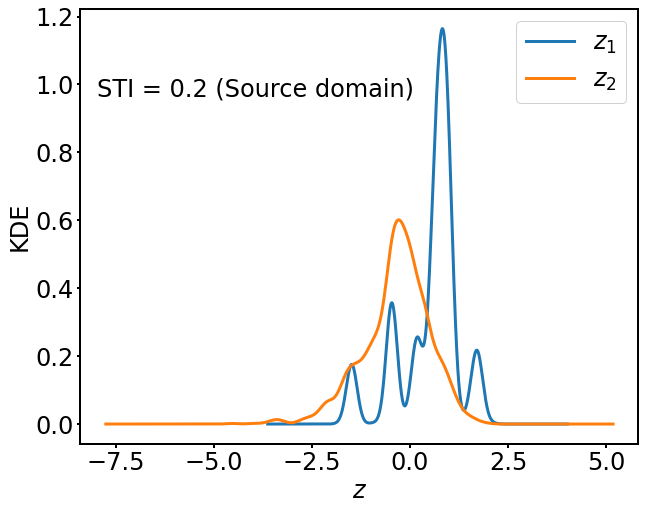

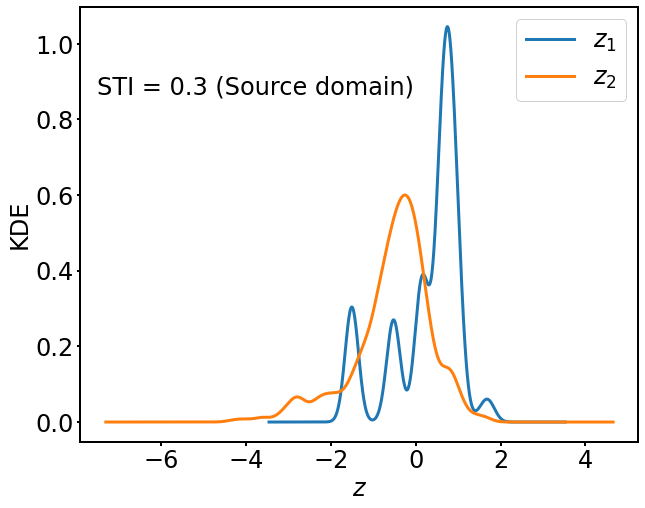

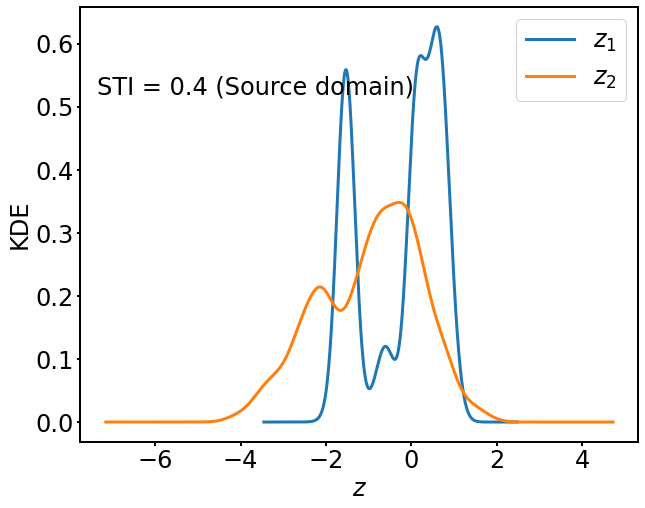

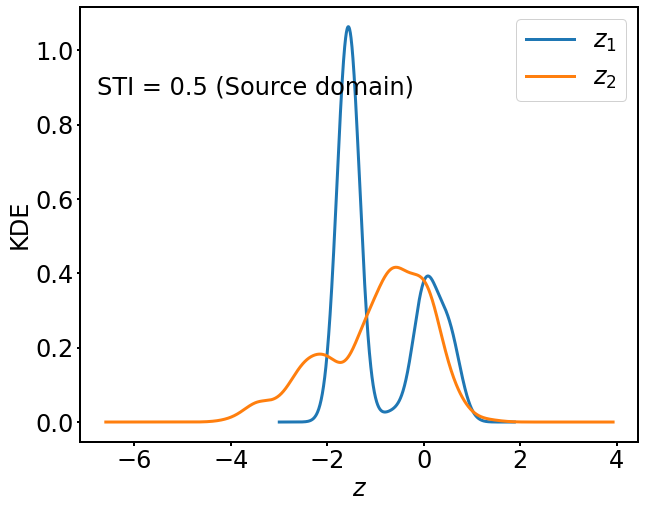

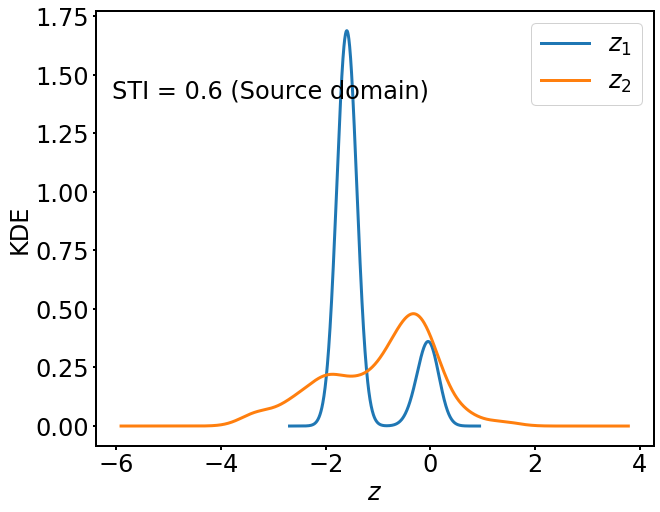

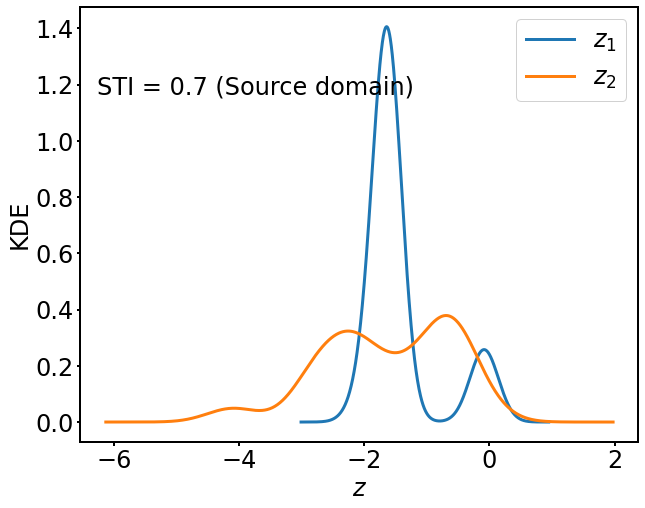

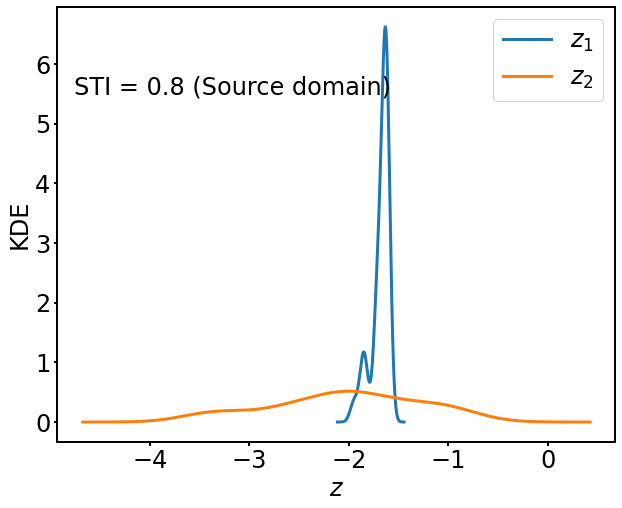

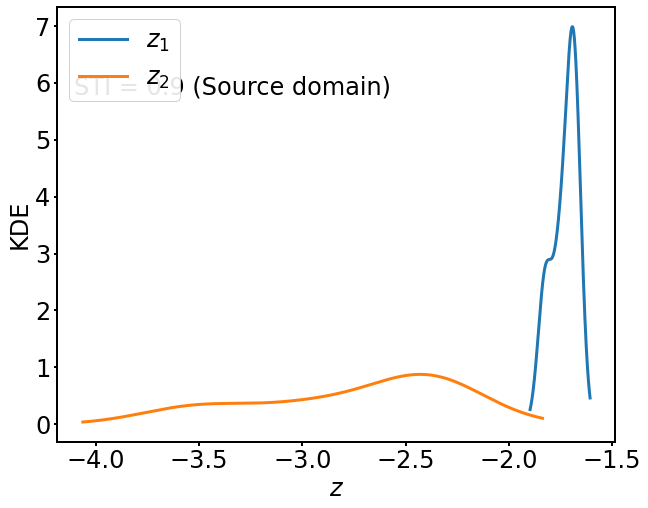

In [38]:
def plot_sti_kde_plots(dataset):
    for sti_value in range(1, 10):
        fig, ax = plt.subplots(figsize=(10, 8))
        
        # Filter data and plot KDE
        subset = dataset[dataset['STI'] == sti_value][['z1', 'z2']]
        subset.plot.kde(ax=ax, linewidth=3)
        
        # Style components
        ax.set_xlabel('$z$', fontsize=24)
        ax.set_ylabel('KDE', fontsize=24)
        ax.tick_params(axis='both', which='major', width=2, labelsize=24)
        
        # Subplot label and STI text
        #ax.text(0.02, 0.95, '(a)', transform=ax.transAxes, fontsize=30, fontweight='bold', va='top', ha='left')
        ax.text(0.03, 0.80, f'STI = {sti_value/10:.1f} (Source domain)', 
               transform=ax.transAxes, fontsize=24)
        
        # Spine styling
        set_global_spines(ax, linewidth=2)
        
        # Legend styling
        ax.legend(['$z_1$', '$z_2$'], fontsize=24, framealpha=0.9)
        #plt.show()
        
        plt.savefig(f'Figure_9a_submission_img_{sti_value}.png', 
                   dpi=600, bbox_inches='tight', transparent=True)
        plt.show()
        plt.close()

# Usage
plot_sti_kde_plots(dataset)

### 9.3.5 - Source Set Mapping

In [39]:
z_mapping_VAE_source_domain = dataset
z_mapping_VAE_source_domain

z1     z2  STI
0     -0.987 -0.306    1
1     -1.446  0.271    2
2     -1.517 -0.397    4
3     -1.418  1.173    3
4     -1.512  0.387    2
...      ...    ...  ...
24995 -1.529 -0.429    5
24996  1.065 -0.656    1
24997  1.010 -0.348    0
24998  1.245  0.693    1
24999  0.356 -4.542    0

[25000 rows x 3 columns]

### 9.3.6 - KDE 2D visualization of two-dimensional encoded space and STI values for source-target domains

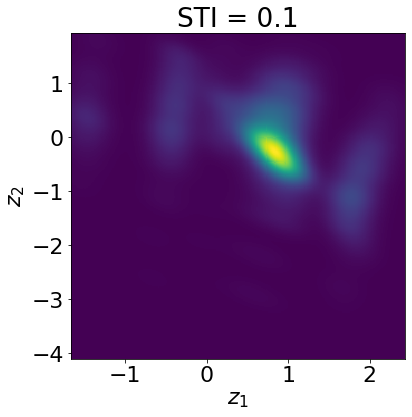

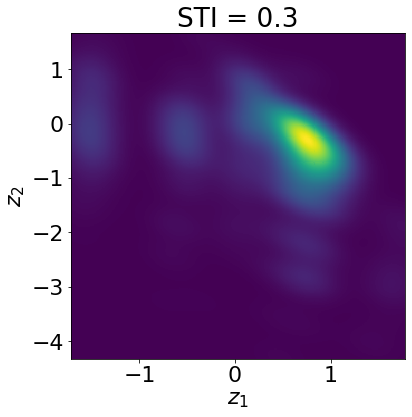

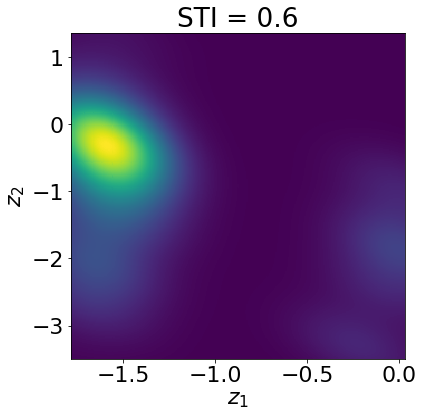

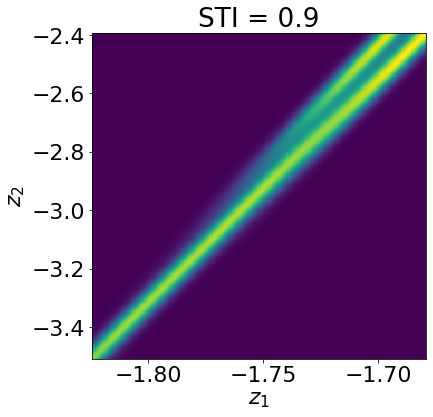

In [40]:
def plot_kde_for_sti(sti_value):
    
    plt.figure(figsize=(6, 6))

    x = dataset[dataset['STI'] == sti_value]['z1']
    y = dataset[dataset['STI'] == sti_value]['z2']

    nbins = 300
    k = kde.gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))

    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')
    plt.xlabel('$z_1$')
    plt.ylabel('$z_2$')
    plt.title(f'STI = {sti_value/10}')
    plt.savefig(f'Figure_14_A_source__paper{sti_value / 10}.png', dpi=300, bbox_inches='tight', transparent=True)
    plt.show()
    plt.close()


for sti_value in [1, 3, 6, 9]:
    plot_kde_for_sti(sti_value)

# 10 - Implementing Principal Component Regression via Kernel - KPCR

## 10.1 - Kernel Regression Modeling

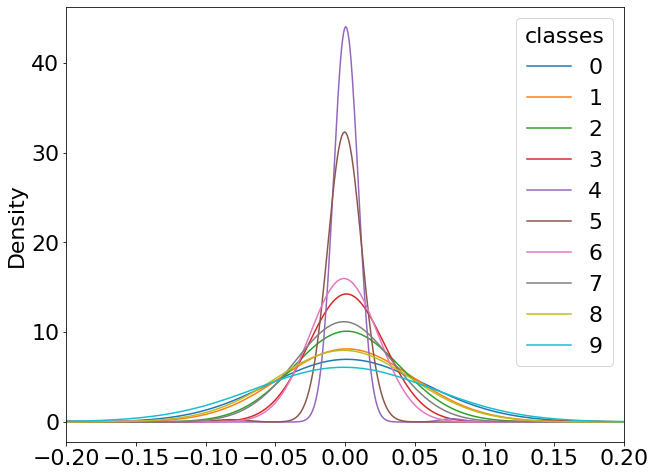

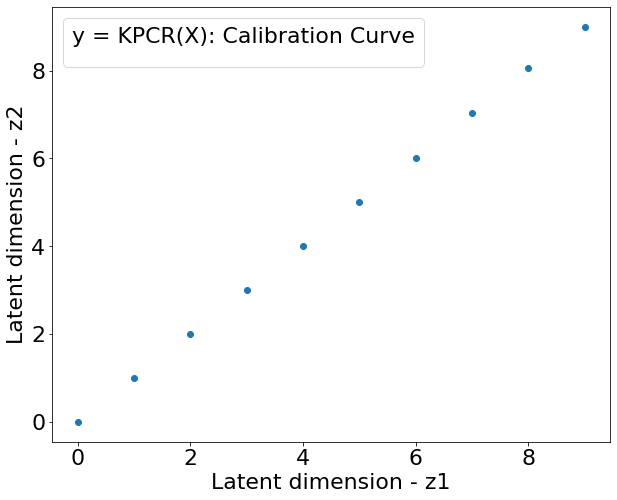

In [41]:
# Load the database into memory
# To ensure reproducibility, the previous VAE model's latent representation is presented in a CSV file.

df_KPCR  = pd.read_csv('/kaggle/input/sti-prediction/dataset_high_z_dim_to_KCPR.csv')
df_KPCR.dropna(inplace=True)

df_KPCR = df_KPCR.groupby(by=["classes"], dropna=True).mean()
df_KPCR = df_KPCR.drop(columns=["Unnamed: 0"])
df_KPCR = df_KPCR.apply(lambda x: x-x.mean())

X_KPCR = df_KPCR.values
y_KPCR = df_KPCR.index.values

ax = df_KPCR.T.plot.kde(bw_method=0.3)
ax.set_xlim([-.2, 0.2])
plt.show()
plt.close()

kernel = RBF(0.2)
K = kernel.__call__(X_KPCR)

eigenValues, eigenVectors = LA.eig(K)

Z = K  * eigenVectors

gamma = LA.inv(np.transpose(Z) * Z) * np.transpose(Z) * y_KPCR
y_pred = np.diag(Z*gamma)

plt.scatter(y_KPCR, y_pred)
plt.xlabel('Latent dimension - z1')
plt.ylabel('Latent dimension - z2')
plt.legend(title="y = KPCR(X): Calibration Curve")
plt.show()
plt.close()

# Making the model predict the function
x_hat = X_KPCR[5]
y_hat = (np.transpose(np.expand_dims(y_KPCR, 1)) *  K \
         * kernel.__call__(X_KPCR, np.transpose(np.expand_dims(x_hat, 1)))).max()

## 10.2 - KS test on regression (KPCR)

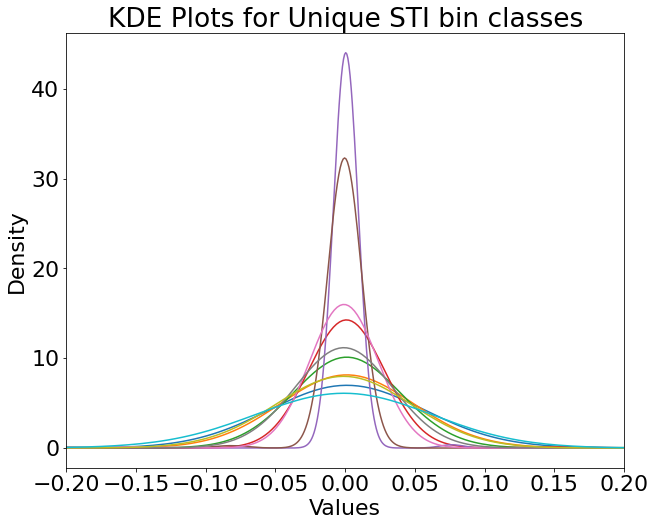

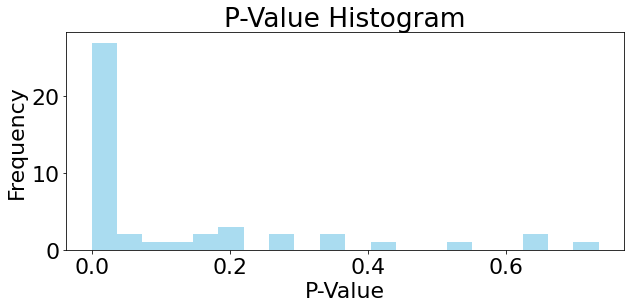

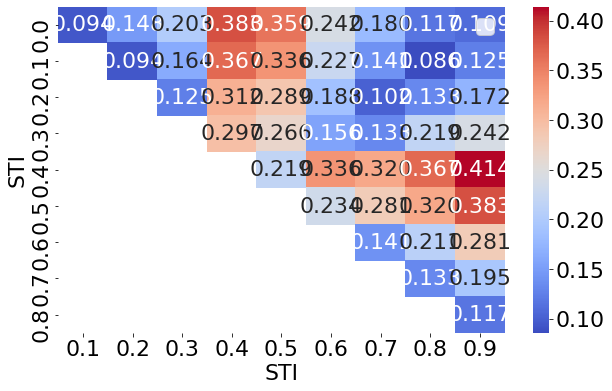

In [42]:
ax = df_KPCR.T.plot.kde(bw_method=0.3, legend=False)
ax.set_xlim([-.2, 0.2])
plt.title('KDE Plots for Unique STI bin classes')
plt.xlabel('Values')
plt.ylabel('Density')

ks_results = []
unique_classes = df_KPCR.index.unique()

for i, class1 in enumerate(unique_classes):
    for j, class2 in enumerate(unique_classes):
        if i < j:
            kde1 = df_KPCR[df_KPCR.index == class1].values.flatten()
            kde2 = df_KPCR[df_KPCR.index == class2].values.flatten()
            
            ks_stat, p_value = ks_2samp(kde1, kde2)
            
            ks_results.append({
                'Class 1': class1/10,
                'Class 2': class2/10,
                'KS Test Statistic': ks_stat,
                'P-Value': p_value,
            })

ks_df = pd.DataFrame(ks_results)

plt.figure(figsize=(10, 4))
plt.hist(ks_df['P-Value'], bins=20, color='skyblue', alpha=0.7)
plt.title('P-Value Histogram')
plt.xlabel('P-Value')
plt.ylabel('Frequency')

plt.figure(figsize=(10, 6))
heatmap_data = ks_df.pivot(index='Class 1', columns='Class 2', values='KS Test Statistic')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".3f", cbar=True)
plt.xlabel('STI')
plt.ylabel('STI')


plt.legend(unique_classes)

plt.savefig('Figura_31.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
plt.close()

In [43]:
ks_matrix = ks_df.pivot_table(index='Class 1', columns='Class 2', values='KS Test Statistic', fill_value=0)

print(ks_matrix)

Class 2  0.100  0.200  0.300  0.400  0.500  0.600  0.700  0.800  0.900
Class 1                                                               
0.000    0.094  0.148  0.203  0.383  0.359  0.242  0.180  0.117  0.109
0.100    0.000  0.094  0.164  0.367  0.336  0.227  0.141  0.086  0.125
0.200    0.000  0.000  0.125  0.312  0.289  0.188  0.102  0.133  0.172
0.300    0.000  0.000  0.000  0.297  0.266  0.156  0.133  0.219  0.242
0.400    0.000  0.000  0.000  0.000  0.219  0.336  0.320  0.367  0.414
0.500    0.000  0.000  0.000  0.000  0.000  0.234  0.281  0.320  0.383
0.600    0.000  0.000  0.000  0.000  0.000  0.000  0.141  0.211  0.281
0.700    0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.133  0.195
0.800    0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.117


In [44]:
ks_matrix = ks_df.pivot_table(index='Class 1', columns='Class 2', values=['KS Test Statistic', 'P-Value'], fill_value=0)

passed_test = ks_matrix['P-Value'] >= 0.05
ks_matrix['KS Test Statistic'] = ks_matrix['KS Test Statistic'].astype(str) + passed_test.applymap(lambda x: '*' if x else '')

print(ks_matrix)

        KS Test Statistic                                                \
Class 2             0.100       0.200       0.300      0.400      0.500   
Class 1                                                                   
0.000            0.09375*  0.1484375*    0.203125  0.3828125   0.359375   
0.100                 0.0    0.09375*  0.1640625*  0.3671875  0.3359375   
0.200                 0.0         0.0      0.125*     0.3125  0.2890625   
0.300                 0.0         0.0         0.0   0.296875   0.265625   
0.400                 0.0         0.0         0.0        0.0    0.21875   
0.500                 0.0         0.0         0.0        0.0        0.0   
0.600                 0.0         0.0         0.0        0.0        0.0   
0.700                 0.0         0.0         0.0        0.0        0.0   
0.800                 0.0         0.0         0.0        0.0        0.0   

                                                       P-Value              \
Class 2      0.600   

In [45]:
pd.options.display.float_format = '{:.3f}'.format
ks_matrix_df = pd.DataFrame(ks_matrix)
ks_matrix_df

KS Test Statistic                                                \
Class 2             0.100       0.200       0.300      0.400      0.500   
Class 1                                                                   
0.000            0.09375*  0.1484375*    0.203125  0.3828125   0.359375   
0.100                 0.0    0.09375*  0.1640625*  0.3671875  0.3359375   
0.200                 0.0         0.0      0.125*     0.3125  0.2890625   
0.300                 0.0         0.0         0.0   0.296875   0.265625   
0.400                 0.0         0.0         0.0        0.0    0.21875   
0.500                 0.0         0.0         0.0        0.0        0.0   
0.600                 0.0         0.0         0.0        0.0        0.0   
0.700                 0.0         0.0         0.0        0.0        0.0   
0.800                 0.0         0.0         0.0        0.0        0.0   

                                                       P-Value              \
Class 2      0.600       0.700       0.800       0.900   0.100 0.200 0.300   
Class 1                                                                      
0.000    0.2421875   0.1796875  0.1171875*   0.109375*   0.629 0.119 0.010   
0.100    0.2265625   0.140625*  0.0859375*      0.125*   0.000 0.629 0.064   
0.200       0.1875  0.1015625*  0.1328125*    0.171875   0.000 0.000 0.271   
0.300     0.15625*  0.1328125*     0.21875   0.2421875   0.000 0.000 0.000   
0.400    0.3359375   0.3203125   0.3671875   0.4140625   0.000 0.000 0.000   
0.500     0.234375     0.28125   0.3203125   0.3828125   0.000 0.000 0.000   
0.600          0.0   0.140625*   0.2109375     0.28125   0.000 0.000 0.000   
0.700          0.0         0.0  0.1328125*   0.1953125   0.000 0.000 0.000   
0.800          0.0         0.0         0.0  0.1171875*   0.000 0.000 0.000   

                                             
Class 2 0.400 0.500 0.600 0.700 0.800 0.900  
Class 1                                      
0.000   0.000 0.000 0.001 0.032 0.344 0.430  
0.100   0.000 0.000 0.003 0.159 0.734 0.271  
0.200   0.000 0.000 0.022 0.526 0.209 0.045  
0.300   0.000 0.000 0.088 0.209 0.004 0.001  
0.400   0.000 0.004 0.000 0.000 0.000 0.000  
0.500   0.000 0.000 0.002 0.000 0.000 0.000  
0.600   0.000 0.000 0.000 0.159 0.007 0.000  
0.700   0.000 0.000 0.000 0.000 0.209 0.015  
0.800   0.000 0.000 0.000 0.000 0.000 0.344

In [46]:
ks_matrix = ks_df.pivot_table(index='Class 1', columns='Class 2', values=['KS Test Statistic', 'P-Value'], fill_value=0)
ks_matrix = ks_matrix.round(3)

passed_test = ks_matrix['P-Value'] >= 0.05 
ks_matrix['KS Test Statistic'] = ks_matrix['KS Test Statistic'].astype(str) + passed_test.applymap(lambda x: '*' if x else '')
ks_matrix.columns = [f'STI ({col[1]/10})' if col[0] == 'KS Test Statistic' else col[1] for col in ks_matrix.columns]
ks_matrix.index = [f'STI ({index/10})' for index in ks_matrix.index]

print(ks_matrix)

                          STI (0.01) STI (0.02) STI (0.03) STI (0.04)  \
STI (0.0)                     0.094*     0.148*      0.203      0.383   
STI (0.01)                       0.0     0.094*     0.164*      0.367   
STI (0.02)                       0.0        0.0     0.125*      0.312   
STI (0.03)                       0.0        0.0        0.0      0.297   
STI (0.04)                       0.0        0.0        0.0        0.0   
STI (0.05)                       0.0        0.0        0.0        0.0   
STI (0.06)                       0.0        0.0        0.0        0.0   
STI (0.06999999999999999)        0.0        0.0        0.0        0.0   
STI (0.08)                       0.0        0.0        0.0        0.0   

                          STI (0.05) STI (0.06) STI (0.06999999999999999)  \
STI (0.0)                      0.359      0.242                      0.18   
STI (0.01)                     0.336      0.227                    0.141*   
STI (0.02)                     0.289  

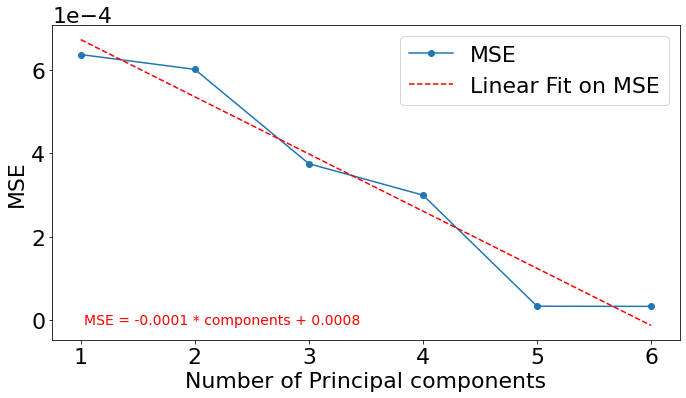

In [47]:
df_KPCR = pd.read_csv('/kaggle/input/sti-prediction/dataset_high_z_dim_to_KCPR.csv')
df_KPCR.dropna(inplace=True)

df_KPCR = df_KPCR.groupby(by=["classes"], dropna=True).mean()
df_KPCR = df_KPCR.drop(columns=["Unnamed: 0"])

df_KPCR = df_KPCR.apply(lambda x: x - x.mean())

X_KPCR = df_KPCR.values
y_KPCR = df_KPCR.index.values

X_input = X_KPCR
y_output = y_KPCR/10

n_components_list = [1, 2, 3, 4, 5, 6]

mse_scores = []
residuals = []

plt.figure(figsize=(16, 12))

for i, n_components in enumerate(n_components_list):
    plt.subplot(3, 2, i + 1)
    
    kpca = KernelPCA(n_components=n_components, kernel='rbf')
    X_kpca = kpca.fit_transform(X_input)

    regressor = LinearRegression()
    regressor.fit(X_kpca, y_output)

    y_pred = regressor.predict(X_kpca)

    mse = np.mean((y_output - y_pred) ** 2)
    mse_scores.append(mse)

    residual = y_output - y_pred
    residuals.append(residual)

    plt.scatter(y_output, y_pred, label=f'Regression with components={n_components}')
    plt.xlabel('Expected STI')
    plt.ylabel('Predicted STI')
    
    m, b = np.polyfit(y_output, y_pred, 1)
    plt.plot(y_output, m * y_output + b, color='red', linestyle='--')
    plt.text(0.1, 0.5, f'y = {m:.2f}x + {b:.2f}', transform=plt.gca().transAxes, fontsize=12, color='red')
    
    mse_equation = f'MSE = {mse:.2f}'
    plt.legend([f'Regression with components = {n_components}', mse_equation])


plt.tight_layout(pad=1.0)
plt.savefig('Figura_35.png', dpi=300, bbox_inches='tight', transparent=True)
plt.close()

plt.figure(figsize=(10, 6))

coefficients = np.polyfit(n_components_list, mse_scores, 1)
mse_fit = np.poly1d(coefficients)

plt.plot(n_components_list, mse_scores, marker='o', label='MSE')
plt.xlabel('Number of Principal components')
plt.ylabel('MSE')

plt.plot(n_components_list, mse_fit(n_components_list), color='red', linestyle='--', label='Linear Fit on MSE')

equation = f'MSE = {coefficients[0]:.4f} * components + {coefficients[1]:.4f}'
plt.text(0.05, 0.05, equation, transform=plt.gca().transAxes, fontsize=14, color='red')

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.legend()
plt.tight_layout()

plt.savefig('Figure_17_paper.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
plt.close()

## 10.3 - Persistence of the KPCR model used as a custom loss function in the MVPAnP model

In [48]:
class KPCR:
    def __init__(self, n_components=2, kernel='linear'):
        self.kernel_pca = KernelPCA(n_components=n_components, kernel=kernel)
        self.linear_regression = LinearRegression()

    def fit(self, X, y):
        X_transformed = self.kernel_pca.fit_transform(X)
        self.linear_regression.fit(X_transformed, y)

    def predict(self, X):
        X_transformed = self.kernel_pca.transform(X)
        return self.linear_regression.predict(X_transformed)

X_kcpr, y_kcpr = dataset[['z1', 'z2']].values, dataset['STI'].values

X_train, X_test, y_train, y_test = train_test_split(X_kcpr, y_kcpr, test_size=0.1, random_state=42)

kpcr = Pipeline([
    ('scaler', StandardScaler()),
    ('kpcr', KPCR(n_components=9, kernel='linear'))  # Adjust n_components and kernel as needed
])

kpcr.fit(X_train, y_train/10)
y_pred = kpcr.predict(X_train/10)
y_pred

array([0.20089415, 0.20602044, 0.1984412 , ..., 0.20394188, 0.21206403,
       0.21260759], dtype=float32)

### Saving the KPCR VAE regression model

In [49]:
dump(kpcr, 'kpcr_model.joblib')

kpcr_persisted = load('kpcr_model.joblib')
y_pred_persisted = kpcr_persisted.predict(X_test[0:1])

print("Predicted value using the persistent KPCR model:", y_pred_persisted)

Predicted value using the persistent KPCR model: [0.0867765]


# 11 - Deep Transfer Learning Methodology

## 11.1 - Load data from the target domain

In [50]:
# Load function for test/validation dataset for transfer learning

A = np.load('../input/sti-prediction/data_to_transfer_02_11_22.npz')
A.files
A = A['arr_0']

df = pd.DataFrame({'c1': A[:,0], 'c2': A[:,1], 'c3': A[:,2], \
                   'c4': A[:,3], 'c5': A[:,4]})

def read_data(file_path):
        
    df.rename(columns = {'c1': 'Room-id', 'c2': 'STI', 
                         'c3': 'Freq - [Hz]', 'c4': 'PSD(RIR)', 
                         'c5': 'PSD(BGN)' },  inplace = True)
   
    n_bins = 10 
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(pd.cut(df['STI'], n_bins, retbins=True)[0])

    df['STI'] = y   
    df.dropna(axis=0, how='any', inplace=True)

    return df


def plot_axis(ax, x, y, title):

    ax.plot(x, y)
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)


def plot_activity(activity, data):

    fig, (ax0, ax1) = plt.subplots(nrows=2,
         figsize=(15, 10),
         sharex=True)
    plot_axis(ax0, data['Freq - [Hz]'], data['PSD(RIR)'], 'PSD(RIR)')
    plot_axis(ax1, data['Freq - [Hz]'], data['PSD(BGN)'], 'PSD(BGN)')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()
    plt.close()


def create_segments_and_labels(df, freq_steps, step, label_name):

    """
    This function processes a DataFrame of acoustic data, segmenting it into windows of a specified size. 
    It extracts the Power Spectral Density (PSD) for both the RIR and BGN within each segment and 
    determines the most frequent STI label for that window.
    Arguments:
    df: Dataframe in the expected format.
    freq_steps: Integer value of the length of a created segment.
    Returns:
    reshaped_segments
    labels:
    """

    N_FEATURES = 2
    segments = []
    labels = []
    
    for i in range(0, len(df) - freq_steps, step):
        xs = df['PSD(RIR)'].values[i: i + freq_steps]
        ys = df['PSD(BGN)'].values[i: i + freq_steps]
        xs = xs[1:]
        ys = ys[1:]
        # Retrieve the most often used label in this segment
        label = stats.mode(df[label_name][i: i + freq_steps])[0][0]
        segments.append([xs, ys])
        labels.append(label)

    reshaped_segments = np.asarray(segments, dtype= np.float32) \
                          .reshape(-1, freq_steps-1, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels


pd.options.display.float_format = '{:.3f}'.format
print('keras version ', keras.__version__)

LABELS = ["1","2","3","4","5","6 ","7","8","9","10"]
TIME_PERIODS = len(np.arange(0,8001,10))
STEP_DISTANCE = TIME_PERIODS

print("\n--- Load, inspect, and transform data ---\n")
print("Load dataset from npz")

read_data(df)
show_basic_dataframe_info(df, 20)

print("\n--- Calculating total number of classrooms ---\n")
num_rooms = len(df) / TIME_PERIODS

df['STI'].value_counts().plot(kind='bar', title='')

print("\n--- Reshape the data into segments ---\n")

df_train = df[df['Room-id'] <= 0.7* num_rooms]
df_test = df[df['Room-id'] > 0.7* num_rooms]

# Saving the scaler of the training data only
scaler = MinMaxScaler()

column_names_to_normalize = ['PSD(RIR)',  'PSD(BGN)']
x = df_train[column_names_to_normalize].values

# Normalize the data from the source domain
scaler.fit_transform(x)
joblib.dump(scaler, 'scaler.save') 

x_scaled = scaler.fit_transform(x)

# Save scalers for future use in inference mode
joblib.dump(scaler, 'scaler_target.pkl')

df_temp = pd.DataFrame(x_scaled, 
                       columns=column_names_to_normalize, 
                       index = df_train.index)
df_train[column_names_to_normalize] = df_temp

# Apply the same previous scaler of the training dataset onto the testing
x = df_test[column_names_to_normalize].values
x_scaled = scaler.transform(x)

df_temp = pd.DataFrame(x_scaled, 
                       columns=column_names_to_normalize, 
                       index = df_test.index)

df_test[column_names_to_normalize] = df_temp


df_train = df_train.round({'PSD(RIR)': 6, 'PSD(BGN)': 6})
df_test =  df_test.round({'PSD(RIR)': 6, 'PSD(BGN)': 6})

LABEL = "STI"
x_train, y_train = create_segments_and_labels(df_train,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)

x_test, y_test = create_segments_and_labels(df_test,
                                            TIME_PERIODS,
                                            STEP_DISTANCE,
                                            LABEL)

plt.close()
print("Done data scaling")

keras version  2.4.3

--- Load, inspect, and transform data ---

Load dataset from npz
Number of columns in dataframe: 5
Number of rows in dataframe: 481401

Print the first 20 rows
    Room-id  STI  Freq - [Hz]  PSD(RIR)  PSD(BGN)
0     1.000    9        0.000  -225.259   -51.117
1     1.000    9       10.000  -224.084   -49.413
2     1.000    9       20.000  -223.160   -48.192
3     1.000    9       30.000  -222.398   -47.240
4     1.000    9       40.000  -221.750   -46.460
5     1.000    9       50.000  -221.187   -45.798
6     1.000    9       60.000  -220.688   -45.225
7     1.000    9       70.000  -220.241   -44.718
8     1.000    9       80.000  -219.835   -44.264
9     1.000    9       90.000  -218.693   -44.120
10    1.000    9      100.000  -216.963   -44.425
11    1.000    9      110.000  -215.729   -44.753
12    1.000    9      120.000  -214.769   -45.107
13    1.000    9      130.000  -213.983   -45.493
14    1.000    9      140.000  -213.318   -45.917
15    1.000    9  

In [51]:
print("\n--- Reshape data to be accepted by the Keras module ---\n")

print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'Training samples')


print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

print("Checking the dimension of the training dataset")

print("Dimensions before reshaping")
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

max_psd_freq = 1600  

# len(np.arange(0,8001,10)) approximation of 800 PDS(RIR) samples and 800 PSD(BGN) samples

print("Dimension after restructuring - training")
x_train_reshaped = x_train.reshape(x_train.shape[0], max_psd_freq)
print(x_train_reshaped.shape)

print("Dimension after restructuring - test")
x_test_reshaped = x_test.reshape(x_test.shape[0], max_psd_freq)
print(x_test_reshaped.shape)

x_tr = x_train_reshaped
x_te = x_test_reshaped


--- Reshape data to be accepted by the Keras module ---

x_train shape:  (420, 800, 2)
420 Training samples
y_train shape:  (420,)
y_test shape:  (179,)
Checking the dimension of the training dataset
Dimensions before reshaping
x_train shape: (420, 800, 2)
x_test shape: (179, 800, 2)
Dimension after restructuring - training
(420, 1600)
Dimension after restructuring - test
(179, 1600)


## 11.2 - Target Domain Data Distribution Statistics

In [52]:
data_target_ANOVA = np.append(y_train, y_test)/10
mu, std = stats.norm.fit(data_target_ANOVA)

plt.hist(data_target_ANOVA, bins=20, alpha=0.6, color='b')

plt.xlabel('STI')
plt.ylabel('Frequency')

print(mu, std)

plt.savefig('Figura_21_b.png', dpi=300, bbox_inches='tight', transparent=True)
plt.close()

0.24090150250417364 0.19358628066363986


0.24090150250417364 0.19358628066363986


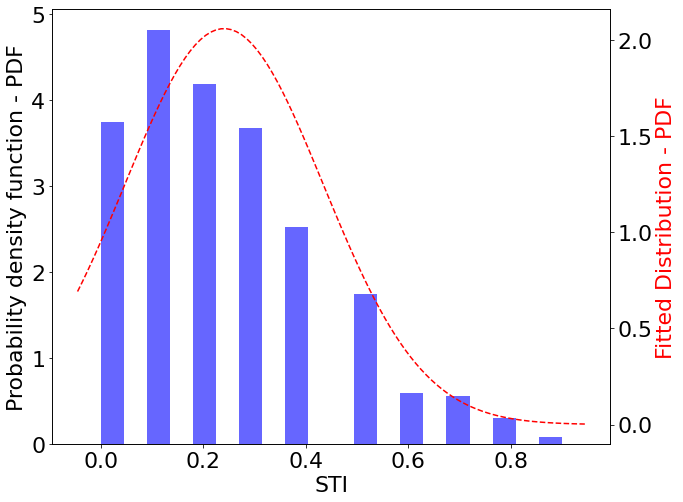

In [53]:
plt.hist(data_target_ANOVA , bins=20, density=True, alpha=0.6, color='b')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)

plt.xlabel('STI')
plt.ylabel('Probability density function - PDF')

ax2 = plt.twinx()
ax2.plot(x, p, 'r--')
ax2.set_ylabel('Fitted Distribution - PDF', color='r')

print(mu, std)
plt.savefig('Figure_6_B_paper.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
plt.close()

0.24090150250417364 0.19358628066363986


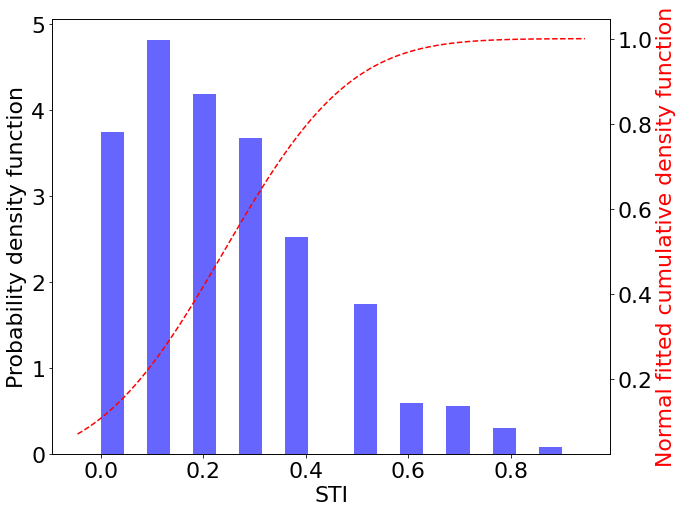

In [54]:
plt.hist(data_target_ANOVA , bins=20, density=True, alpha=0.6, color='b')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
c = stats.norm.cdf(x, mu, std)

plt.xlabel('STI')
plt.ylabel('Probability density function')

ax2 = plt.twinx()

ax2.plot(x, c, 'r--')
ax2.set_ylabel('Normal fitted cumulative density function', color='r')


print(mu, std)
plt.savefig('Figura_r.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
plt.close()

## 11.3 ANOVA difference between means + KS test

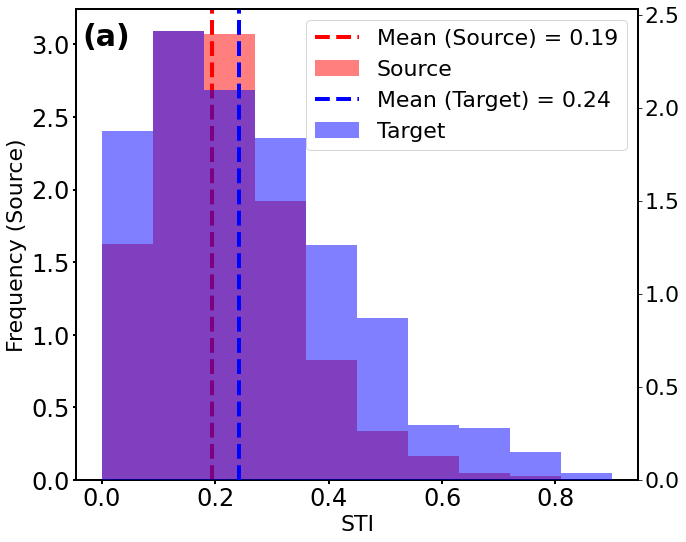

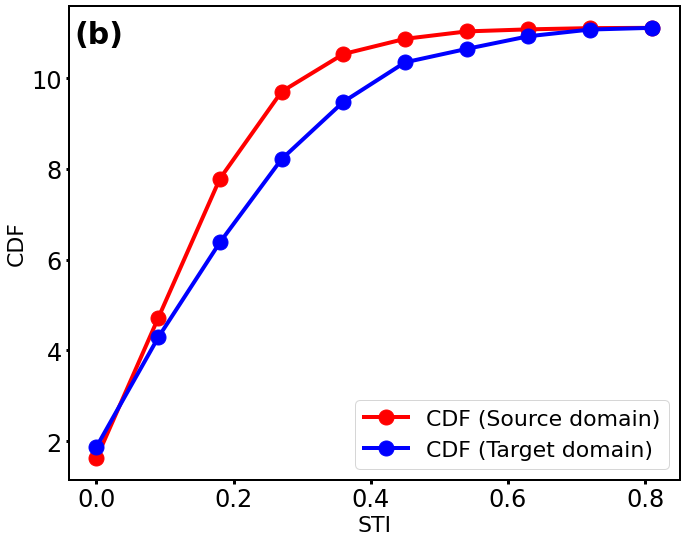

Significant difference
KS p-value: 0.00000


In [55]:
# Set global spine (axes border) width via rcParams doesn't exist directly,
# so we define a helper function to apply it to all future plots

def set_global_spines(ax, linewidth=2):
    for spine in ax.spines.values():
        spine.set_linewidth(linewidth)

# Execute the KS test
ks_statistic, p_value_ks = stats.ks_2samp(data_source_ANOVA, data_target_ANOVA)
alpha = 0.01

# ====== FIGURE (a) - Histogram Comparison ======
fig1, ax1 = plt.subplots(figsize=(10, 8))

# Plot source histogram
n1, bins1, _ = ax1.hist(data_source_ANOVA, bins=10, alpha=0.5, label='Source', color='red', density=True)
source_mean = data_source_ANOVA.mean()
ax1.axvline(source_mean, color='red', linestyle='dashed', linewidth=4, label=f'Mean (Source) = {source_mean:.2f}')

# Twin axis for target
ax2 = ax1.twinx()
n2, bins2, _ = ax2.hist(data_target_ANOVA, bins=10, alpha=0.5, label='Target', color='blue', density=True)
target_mean = data_target_ANOVA.mean()
ax2.axvline(target_mean, color='blue', linestyle='dashed', linewidth=4, label=f'Mean (Target) = {target_mean:.2f}')

# Axis labels
ax1.set_xlabel('STI')
ax1.set_ylabel('Frequency (Source)')

# Merge legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

# Tick parameters
ax1.tick_params(width=2, labelsize=24)

# Add subplot label "(a)"
ax1.text(0.01, 0.97, '(a)', transform=ax1.transAxes, fontsize=30, fontweight='bold', va='top', ha='left')
for spine in ax1.spines.values():
    spine.set_linewidth(2)
    
plt.tight_layout()
plt.savefig('Figure_6a_submission_img_paper.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()
plt.close()

# ====== FIGURE (b) - CDF Plot ======
fig2, ax3 = plt.subplots(figsize=(10, 8))
set_global_spines(ax3)  # Apply spine widt
        
# CDFs for source and target
cumulative_source = np.cumsum(n1)
ax3.plot(bins1[:-1], cumulative_source, color='red', linestyle='-', linewidth=4, marker='o', markersize=15, label='CDF (Source domain)')

cumulative_target = np.cumsum(n2)
ax3.plot(bins2[:-1], cumulative_target, color='blue', linestyle='-', linewidth=4,  marker='o', markersize=15, label='CDF (Target domain)')

# Axis labels and legend
ax3.set_xlabel('STI')
ax3.set_ylabel('CDF')
ax3.legend(loc='best')

# Tick parameters
ax3.tick_params(width=3, labelsize=24)
ax3.tick_params(width=3, labelsize=24)
# Add subplot label "(b)"
ax3.text(0.01, 0.97, '(b)', transform=ax3.transAxes, fontsize=30, fontweight='bold', va='top', ha='left')

plt.tight_layout()
plt.savefig('Figure_6b_paper.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()
plt.close()

if p_value_ks < alpha:
    similarity_result = "Significant difference"
else:
    similarity_result = "No significant difference"

print(similarity_result)
print(f"KS p-value: {p_value_ks:.5f}")

## 11.4 Check whether the source and target domains are derived from a normal distribution

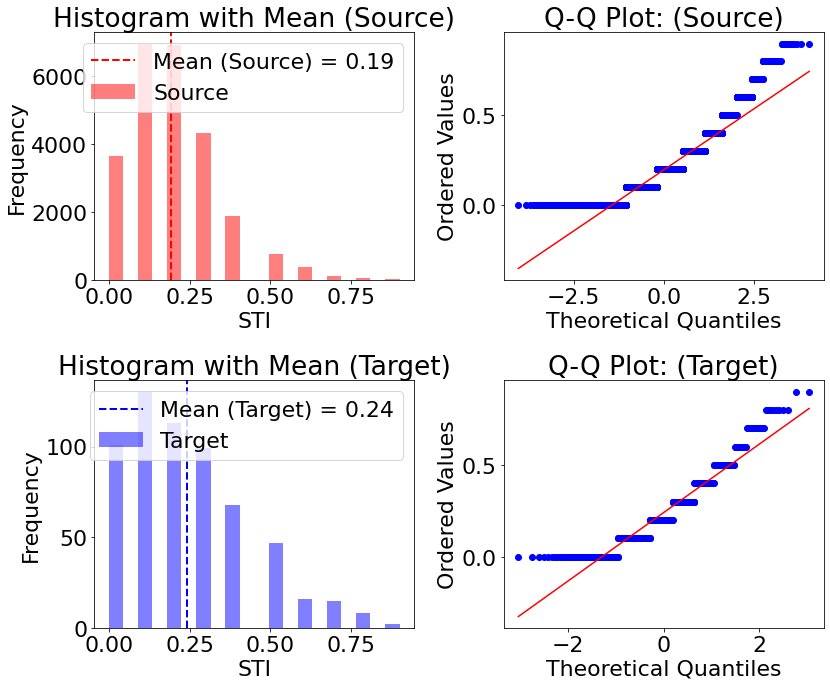

Shapiro-Wilk test results

Source:
Statistic: 0.91, P-value: 0.00
Result: Not Normally Distributed

Target:
Statistic: 0.92, P-value: 0.00
Result: Not Normally Distributed


In [56]:
#  Shapiro-Wilk Test for the Source domain
statistic_source, p_value_source = stats.shapiro(data_source_ANOVA)
alpha = 0.01

statistic_target, p_value_target = stats.shapiro(data_target_ANOVA)

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.hist(data_source_ANOVA, bins=20, alpha=0.5, label='Source', color='red')
source_mean = data_source_ANOVA.mean()
plt.axvline(source_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Source) = {source_mean:.2f}')
plt.legend()
plt.title('Histogram with Mean (Source)')
plt.xlabel('STI')
plt.ylabel('Frequency')
plt.grid(False)

plt.subplot(2, 2, 2)
stats.probplot(data_source_ANOVA, dist="norm", plot=plt)
plt.title('Q-Q Plot: (Source)')
plt.xlabel('Theoretical Quantiles')

plt.subplot(2, 2, 3)
plt.hist(data_target_ANOVA, bins=20, alpha=0.5, label='Target', color='blue')
target_mean = data_target_ANOVA.mean()
plt.axvline(target_mean, color='blue', linestyle='dashed', linewidth=2, label=f'Mean (Target) = {target_mean:.2f}')
plt.legend()
plt.title('Histogram with Mean (Target)')
plt.xlabel('STI')
plt.ylabel('Frequency')
plt.grid(False)

plt.subplot(2, 2, 4)
stats.probplot(data_target_ANOVA, dist="norm", plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.title('Q-Q Plot: (Target)')

plt.tight_layout()

if p_value_source < alpha:
    normality_result_source = "Not Normally Distributed"
else:
    normality_result_source = "Normally Distributed"

if p_value_target < alpha:
    normality_result_target = "Not Normally Distributed"
else:
    normality_result_target = "Normally Distributed"


plt.savefig('Figura_34_b.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

plt.close()

print(f'Shapiro-Wilk test results\n\n'
        f'Source:\n'
        f'Statistic: {statistic_source:.2f}, P-value: {p_value_source:.2f}\n'
        f'Result: {normality_result_source}\n\n'
        f'Target:\n'
        f'Statistic: {statistic_target:.2f}, P-value: {p_value_target:.2f}\n'
        f'Result: {normality_result_target}')

# 12 - Reconstructing the VAE latent space for the target domain

In [57]:
# Load the VAE encoder model trained in the source domain
# reconstructed_model = keras.models.load_model("vae_encoder.h5")

reconstructed_model = keras.models.load_model("/kaggle/input/sti-prediction/vae_encoder.h5")

# x_tr_latent = encoder.predict(x_tr, batch_size=batch_size)
x_tr_latent = reconstructed_model.predict(x_tr, batch_size=1)
y_tr = y_train                            
dataset = pd.DataFrame({'z1': x_tr_latent[:, 0], 'z2': x_tr_latent[:, 1], 'STI':  y_tr})
print(dataset)

        z1     z2  STI
0    0.546  0.087    9
1    1.555 -1.498    7
2    0.962 -1.088    3
3    0.930 -0.942    2
4    1.346 -2.114    1
..     ...    ...  ...
415 -0.044 -0.448    1
416 -0.138 -0.406    1
417 -0.650 -0.082    1
418 -0.420 -0.261    0
419 -0.916  0.110    3

[420 rows x 3 columns]


# 12.1 - Plotting the latent space representation (z=2) of the test data on the target dataset

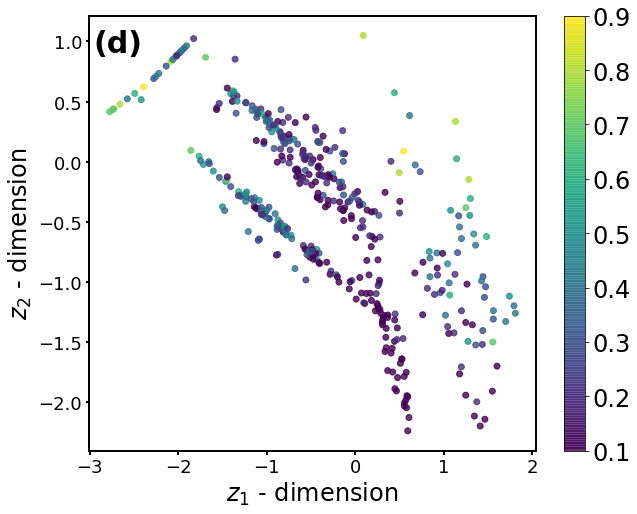

In [58]:
def plot_sti_PCA_source_target_domain(x_tr_latent, y_tr):
    fig, ax = plt.subplots(figsize=(10, 8))  # Keep original figure size
    
    # Create matching normalization
    norm = matplotlib.colors.Normalize(vmin=0.1, vmax=0.9)
    
    # Create styled scatter plot
    scatter = ax.scatter(x_tr_latent[:, 0], x_tr_latent[:, 1],
                        c=y_tr/10,
                        cmap='viridis',
                        alpha=0.8,
                        norm=norm)
    
    # Colorbar with matching configuration
    cbar = fig.colorbar(scatter, ax=ax,
                       boundaries=np.linspace(0.1, 0.9, 256),
                       ticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
    cbar.ax.tick_params(labelsize=24)
    cbar.set_label('')

    # Axis styling
    ax.set_xlabel('$z_1$ - dimension', fontsize=24)
    ax.set_ylabel('$z_2$ - dimension', fontsize=24)
    ax.tick_params(axis='both', which='major', width=2, labelsize=18)

    # Subplot label with matching positioning
    ax.text(0.01, 0.97, '(d)', transform=ax.transAxes,
           fontsize=30, fontweight='bold', va='top', ha='left')

    # Spine styling
    set_global_spines(ax, linewidth=2)

    plt.savefig('Figure_7d_paper.png', dpi=600, 
               bbox_inches='tight', transparent=True)
    plt.show()
    plt.close()

# Usage
y_tr = y_train
plot_sti_PCA_source_target_domain(x_tr_latent, y_train)

### 12.1.1 - Kernel Density Estimation (KDE) Visualization for the Target Domain

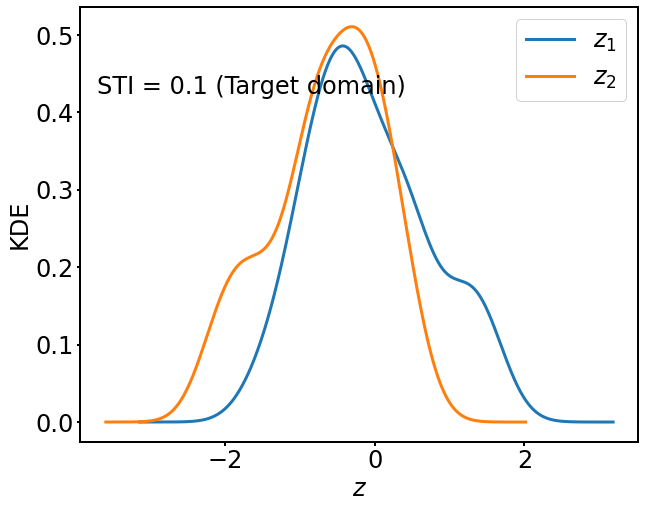

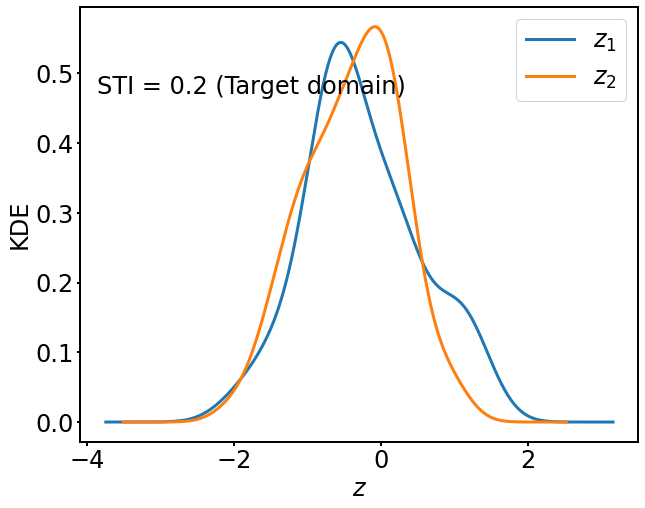

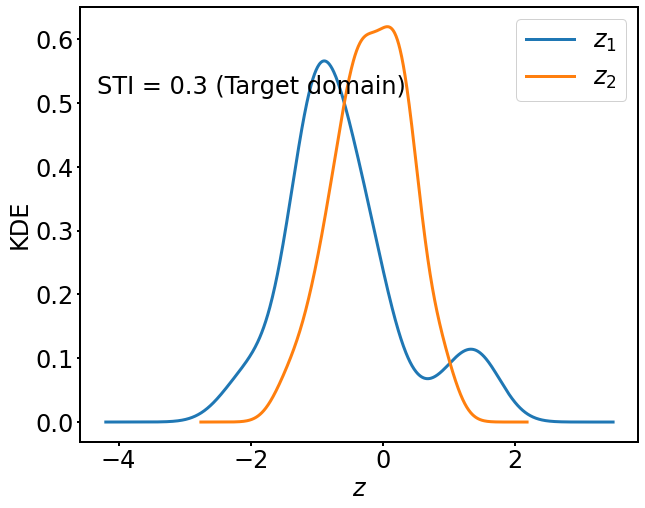

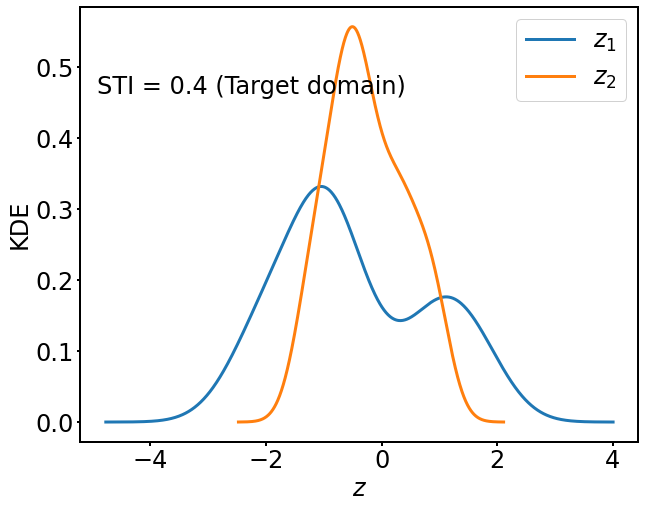

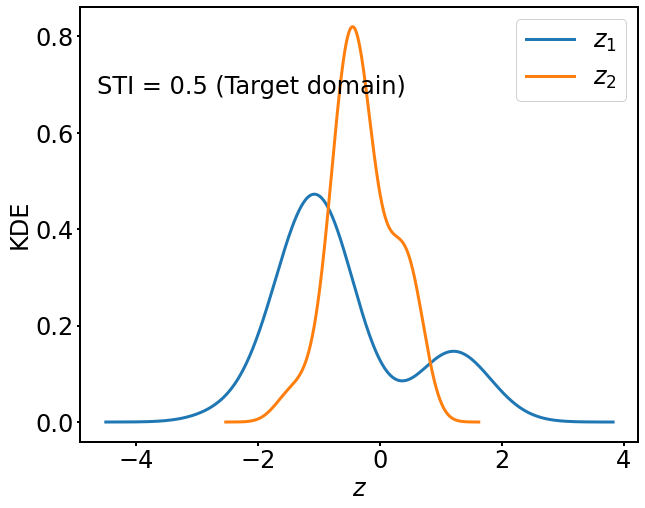

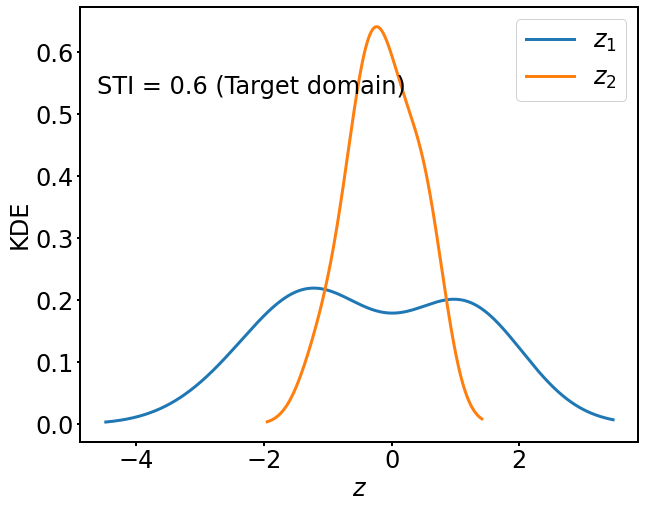

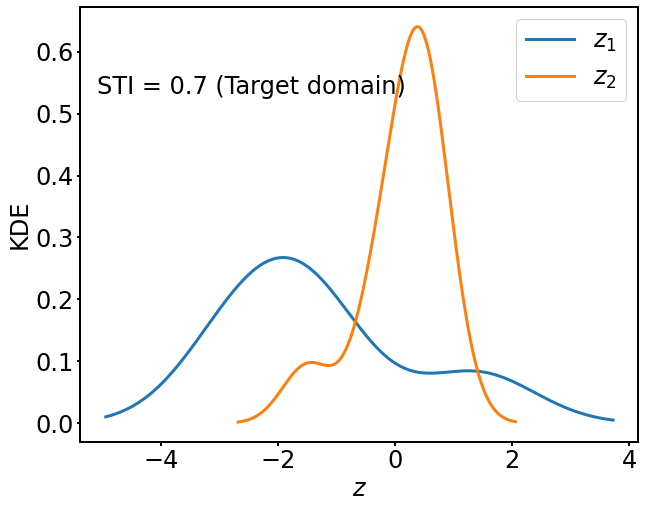

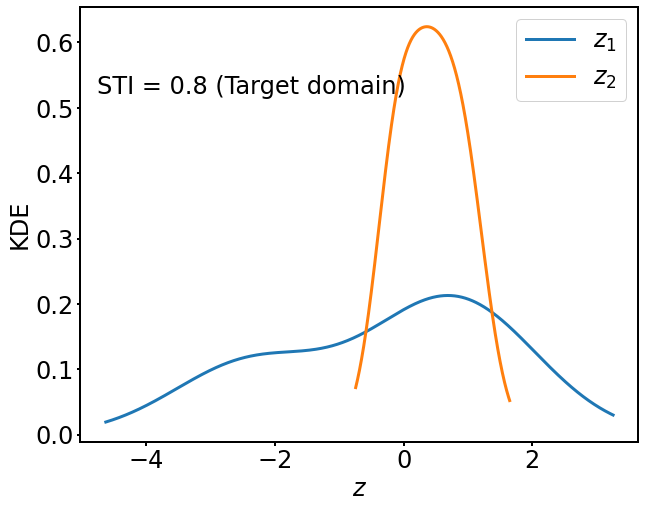

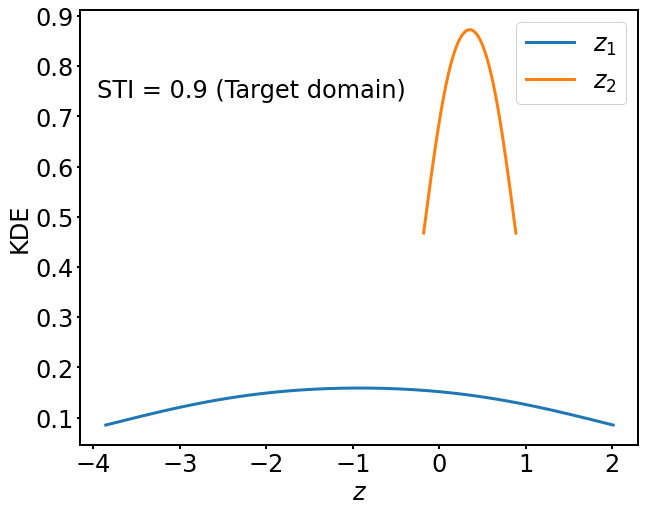

In [59]:
def plot_sti_kde_plots(dataset):
    for sti_value in range(1, 10):
        fig, ax = plt.subplots(figsize=(10, 8))
        
        # Filter data and plot KDE
        subset = dataset[dataset['STI'] == sti_value][['z1', 'z2']]
        subset.plot.kde(ax=ax, linewidth=3)
        
        # Style components
        ax.set_xlabel('$z$', fontsize=24)
        ax.set_ylabel('KDE', fontsize=24)
        ax.tick_params(axis='both', which='major', width=2, labelsize=24)
        
        # Subplot label and STI text
        # ax.text(0.02, 0.95, '(b)', transform=ax.transAxes, fontsize=30, fontweight='bold', va='top', ha='left')
        ax.text(0.03, 0.80, f'STI = {sti_value/10:.1f} (Target domain)', 
               transform=ax.transAxes, fontsize=24)
        
        # Spine styling
        set_global_spines(ax, linewidth=2)
        
        # Legend styling
        ax.legend(['$z_1$', '$z_2$'], fontsize=24, framealpha=0.9)
        #plt.show()
        
        plt.savefig(f'Figure_9b_submission_img_{sti_value}.png', 
                   dpi=600, bbox_inches='tight', transparent=True)
        plt.show()
        plt.close()

# Usage
plot_sti_kde_plots(dataset)

### 12.1.1.1 - TARGET DATA MAPPING (MMD - Target Domain)

In [60]:
z_mapping_VAE_target_domain = dataset
z_mapping_VAE_target_domain

z1     z2  STI
0    0.546  0.087    9
1    1.555 -1.498    7
2    0.962 -1.088    3
3    0.930 -0.942    2
4    1.346 -2.114    1
..     ...    ...  ...
415 -0.044 -0.448    1
416 -0.138 -0.406    1
417 -0.650 -0.082    1
418 -0.420 -0.261    0
419 -0.916  0.110    3

[420 rows x 3 columns]

#### 12.1.2 - KDE 2D Visualization of the bidmensional encoded space and STI values (Target Domain)

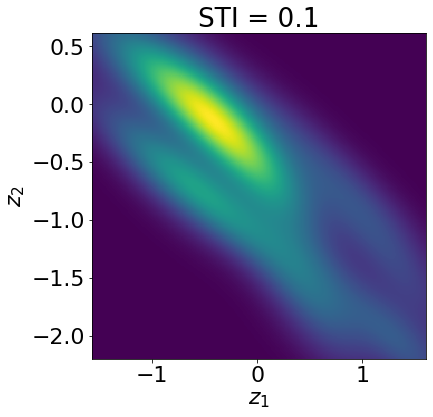

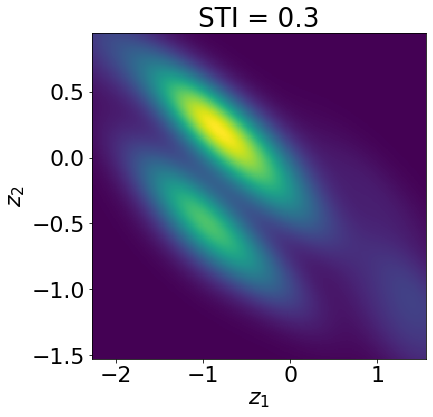

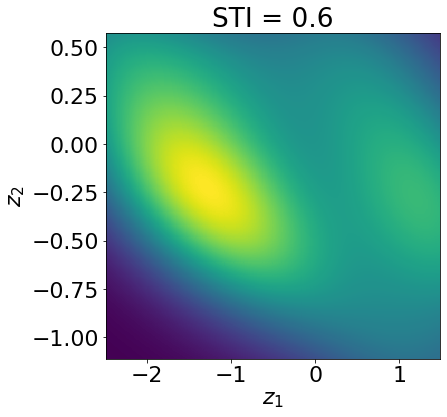

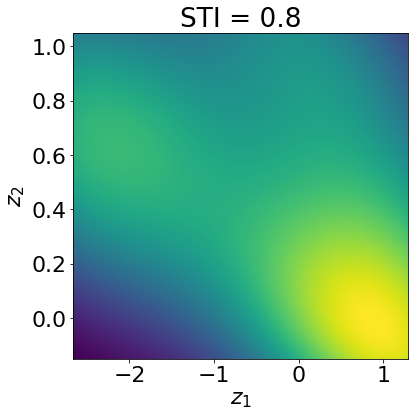

In [61]:
def plot_kde_for_sti(sti_value):
    
    plt.figure(figsize=(6, 6))

    x = dataset[dataset['STI'] == sti_value]['z1']
    y = dataset[dataset['STI'] == sti_value]['z2']

    nbins = 300
    k = kde.gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))

    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')
    plt.xlabel('$z_1$')
    plt.ylabel('$z_2$')
    plt.title(f'STI = {sti_value/10}')
    plt.savefig(f'Figure_14_B_target__paper{sti_value / 10}.png', dpi=300, bbox_inches='tight', transparent=True)
    plt.show()
    plt.close()


for sti_value in [1, 3, 6, 8]:
    plot_kde_for_sti(sti_value)

# 12.2 - MMD metric calculation and visualization

MMD result of X and Y is 0.4460340142250061


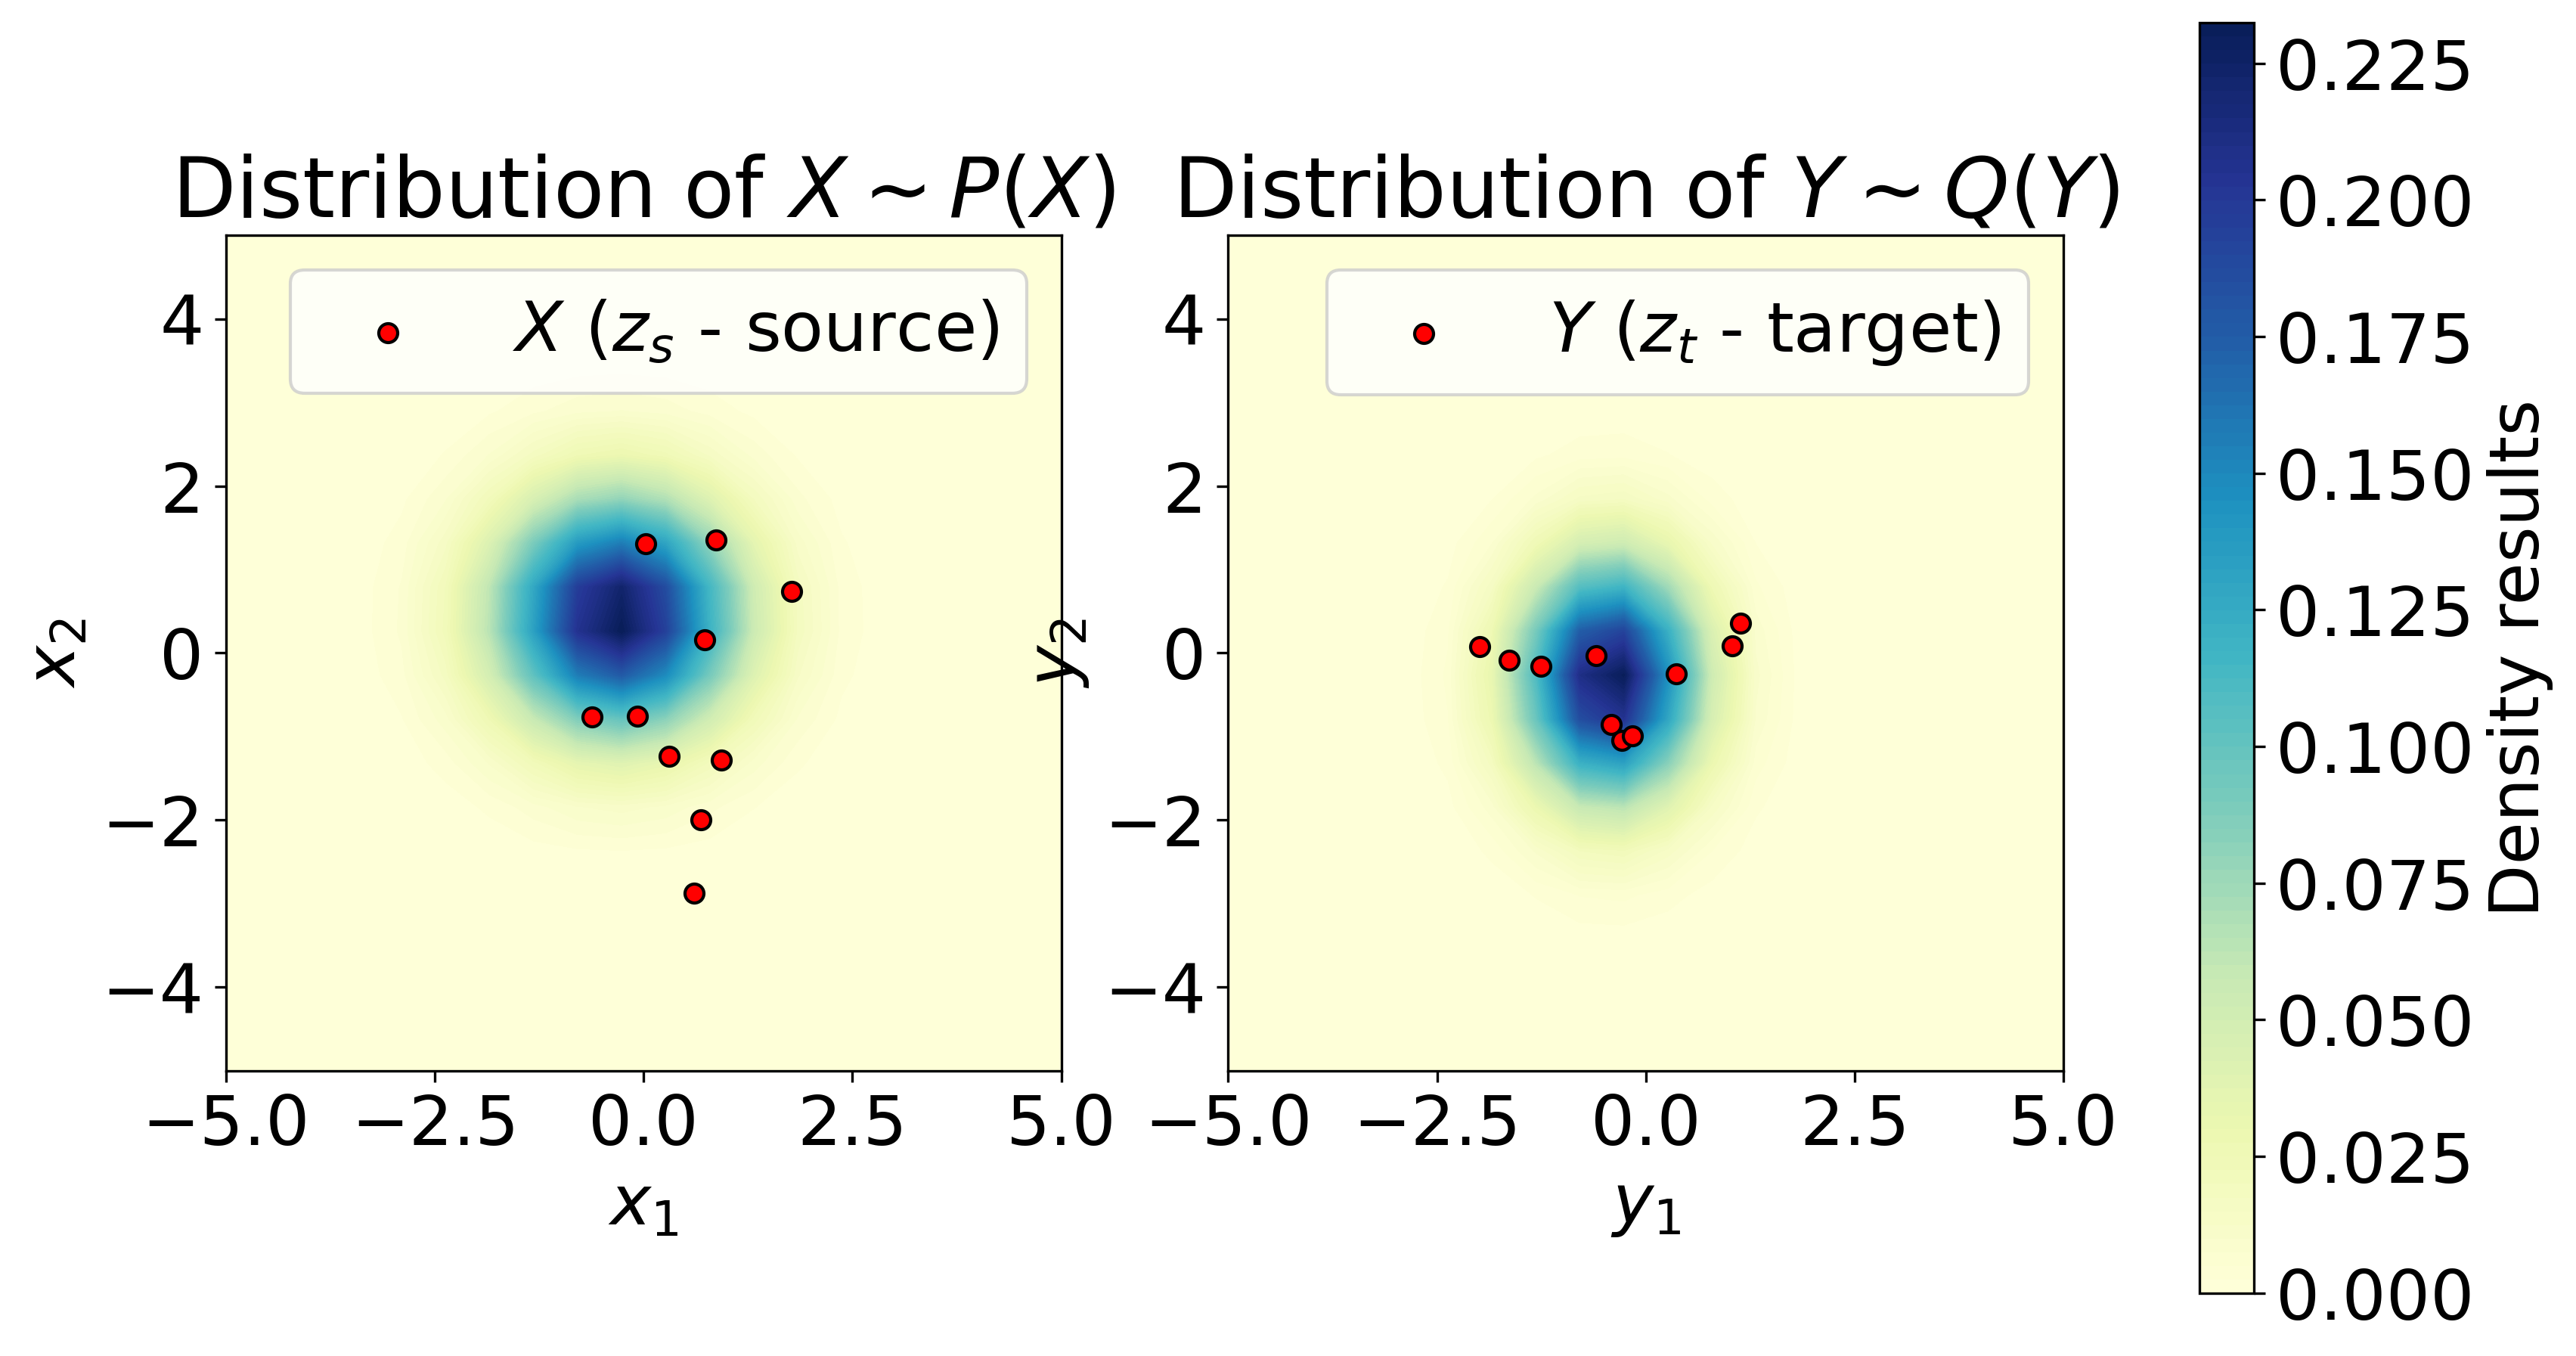

In [62]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

m = 20

x_mean = torch.FloatTensor(([z_mapping_VAE_source_domain["z1"].mean(),
               z_mapping_VAE_source_domain["z2"].mean()])) 


y_mean = torch.FloatTensor(([z_mapping_VAE_target_domain["z1"].mean(),
               z_mapping_VAE_target_domain["z2"].mean()])) 


x_cov =  torch.FloatTensor(
                           np.cov([z_mapping_VAE_source_domain["z1"], 
                                  z_mapping_VAE_source_domain["z2"]])
                                  ) * torch.eye(2)
                          
# IMPORTANT: Covariance matrices must be obtained with positive definite

y_cov = torch.FloatTensor(
                          np.cov([z_mapping_VAE_target_domain["z1"], 
                                 z_mapping_VAE_target_domain["z2"]])
                                 ) * torch.eye(2)

px = MultivariateNormal(x_mean, x_cov)
qy = MultivariateNormal(y_mean, y_cov)

x = px.sample([m]).to(device)
y = qy.sample([m]).to(device)


def MMD(x, y, kernel):
    
    """ Maximum empirical mean discrepancy. The smaller the result,
    the more evidence that the distributions are equal.
    
    Arguments:
    x: first sample, P distribution
    y: second sample, Q distribution
    kernel: kernel type such as "multiscale" or "rbf"
    """
    
    xx, yy, zz = torch.mm(x, x.t()), torch.mm(y, y.t()),torch.mm(x, y.t())
            
    rx = (xx.diag().unsqueeze(0).expand_as(xx))
    ry = (yy.diag().unsqueeze(0).expand_as(yy))
   
    dxx = rx.t() + rx - 2. * xx 
    dyy = ry.t() + ry - 2. * yy 
    dxy = rx.t() + ry - 2. * zz
   
    XX, YY, XY = (torch.zeros(xx.shape).to(device),
                  torch.zeros(xx.shape).to(device),
                  torch.zeros(xx.shape).to(device))
   
    if kernel == "multiscale":
       
        bandwidth_range = [0.2, 0.5, 0.9, 1.3]
        for a in bandwidth_range:
            XX += a**2 * (a**2 + dxx)**-1
            YY += a**2 * (a**2 + dyy)**-1
            XY += a**2 * (a**2 + dxy)**-1
           
    if kernel == "rbf":
     
        bandwidth_range = [10, 15, 20, 50]
        for a in bandwidth_range:
            XX += torch.exp(-0.5*dxx/a)
            YY += torch.exp(-0.5*dyy/a)
            XY += torch.exp(-0.5*dxy/a)
     
    return torch.mean(XX + YY - 2. * XY)


result = MMD(x, y, kernel="multiscale")

print(f"MMD result of X and Y is {result.item()}")


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,8), dpi=300)

delta = 0.025

x1_val = np.linspace(-5, 5, num=m)
x2_val = np.linspace(-5, 5, num=m)

x1, x2 = np.meshgrid(x1_val, x2_val)

px_grid = torch.zeros(m,m)
qy_grid = torch.zeros(m,m)

for i in range(m):
    for j in range(m):
        px_grid[i,j] = multivariate_normal.pdf([x1_val[i],x2_val[j]], 
                                               x_mean, 
                                               x_cov)
        
        qy_grid[i,j] = multivariate_normal.pdf([x1_val[i],x2_val[j]], 
                                               y_mean, 
                                               y_cov)


CS1 = ax1.contourf(x1, x2, px_grid,100, cmap=plt.cm.YlGnBu)
ax1.set_title("Distribution of $X \sim P(X)$")
ax1.set_ylabel('$x_2$')
ax1.set_xlabel('$x_1$')
ax1.set_aspect('equal')
ax1.scatter(x[:10,0].cpu(), x[:10,1].cpu(), 
            label="$X$ ($z_s$ - source)", 
            marker="o", 
            facecolor="r", 
            edgecolor="k")

ax1.legend()

CS2 = ax2.contourf(x1, x2, qy_grid,100, cmap=plt.cm.YlGnBu)
ax2.set_title("Distribution of $Y \sim Q(Y)$")
ax2.set_xlabel('$y_1$')
ax2.set_ylabel('$y_2$')
ax2.set_aspect('equal')
ax2.scatter(y[:10,0].cpu(), y[:10,1].cpu(), 
            label="$Y$ ($z_t$ - target)", 
            marker="o", 
            facecolor="r", 
            edgecolor="k")

ax2.legend()  

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(CS2, cax=cbar_ax)
cbar.ax.set_ylabel('Density results')


plt.savefig('Figure_13_paper.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
plt.close()

## 12.3 - Batch prediction for the x_tr dataset

In [63]:
print(x_tr[0].shape)
x_tr_latent = encoder.predict(x_tr, batch_size=batch_size)
# This result will be the reference value for the Loss function
kpcr.predict(x_tr_latent)
print("This was the batch prediction")

(1600,)
This was the batch prediction


## 12.4 - Single-sample prediction in the target domain using the encoder model trained in the source domain

In [64]:
print(x_tr[0:2].shape)
x_tr_latent = encoder.predict(x_tr[0:10], batch_size=batch_size)
x_tr_latent
kpcr.predict(x_tr_latent)

(2, 1600)


array([-0.12599322, -0.41112515, -0.36963013, -0.3328657 , -0.57749915,
       -0.43954387, -0.28528726, -0.35432473, -0.43122867, -0.5449643 ],
      dtype=float32)

## 12.5 - Model Validation: Dimension Validation

In [65]:
print("Raw signal input - Raw dimension before formatting:", x_test.shape)

print("Dimension after restructuring to serve as autoencoder input:",
x_test.reshape(x_test.shape[0],
max_psd_freq).shape)

x_test_reshaped = x_test.reshape(x_test.shape[0], max_psd_freq)
x_input_vae = x_test_reshaped

print("Making a prediction in the VAE to obtain the sample space: ",
np.expand_dims(x_input_vae[2], axis=0).shape)

x_tr_latent_pred = encoder.predict(np.expand_dims(x_input_vae[5], axis=0),
                                   batch_size=batch_size)

# x_tr_latent = encoder.predict(x_input_vae[2:3], batch_size=batch_size)
x_tr_latent_pred

kpcr.predict(x_tr_latent_pred)

Raw signal input - Raw dimension before formatting: (179, 800, 2)
Dimension after restructuring to serve as autoencoder input: (179, 1600)
Making a prediction in the VAE to obtain the sample space:  (1, 1600)


array([-0.57129645], dtype=float32)

# 13 - Deep Transfer Learning Modeling data split

In [66]:
print(x_tr.shape)
print(y_train.shape)

(420, 1600)
(420,)


In [67]:
X_train, X_test, y_train, y_test = train_test_split(x_tr,
                                                    y_train, 
                                                    test_size=0.1,
                                                    random_state=2)

In [68]:
print("Training dimension")
print(X_train.shape)
print(y_train.shape)
print("Testing dimensions")
print(X_test.shape)
print(y_test.shape)

Training dimension
(378, 1600)
(378,)
Testing dimensions
(42, 1600)
(42,)


In [69]:
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
X_train, y_train = X_res, y_res/10
print(f"Training stats after over sampler: {Counter(y_res)}")

Training stats after over sampler: Counter({2: 72, 0: 72, 1: 72, 8: 72, 5: 72, 6: 72, 4: 72, 7: 72, 3: 72, 9: 72})


In [70]:
X_res_test, y_res_test = over_sampler.fit_resample(X_test, y_test)
print(f"Training stats after over sampler with scaled sti/10 labels: {Counter(y_res_test)}")
X_test, y_test = X_res_test, y_res_test/10

Training stats after over sampler with scaled sti/10 labels: Counter({0: 11, 1: 11, 3: 11, 2: 11, 4: 11, 6: 11, 5: 11, 9: 11, 7: 11})


#### Definition of target dataset

In [71]:
X_target_total = X_train
y_target_total = y_train

print("Dimension Xt - ", X_target_total.shape)
print("Dimension yt - ", y_target_total.shape)

Dimension Xt -  (720, 1600)
Dimension yt -  (720,)


## 13.1 - Loading of the KPCR loss function used in the DTL equation

In [72]:
kpcr_persisted = load('/kaggle/input/sti-prediction/kpcr_model.joblib') # TODO fix the load model from the input
kpcr.predict(x_tr_latent)

encoder_reconstructed = keras.models.load_model("current_vae_encoder.model")

print(x_tr[0:1].shape)
print(type(x_tr[0:1]))
print(x_tr[0:1].dtype)

latent_pred = encoder_reconstructed.predict(x_tr[0:2], batch_size=1)
latent_pred

(1, 1600)
<class 'numpy.ndarray'>
float32


array([[3.349346 , 0.8448534],
       [4.038028 , 4.210307 ]], dtype=float32)

In [73]:
kpcr.predict([[1., 1.0]])

array([0.06005432])

# Definitions of soure and tagert domains

In [74]:
# Source domain
Xs = x_train_reshaped
ys = y_train/10

# Target
Xt = X_target_total
yt = y_target_total

## 13.2 - Baseline Model (1D CONVNET) - ( on target data only) - WITHOUT Deep Transfer Learning

In [75]:
# from keras import backend as K
# kl = tf.keras.losses.KLDivergence()

clear_session()

# Initialize KFold cross-validation
n_splits =   10     # deafult 10
num_epochs = 500     # default 200 used also in the DTL 
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# encoder_reconstructed = keras.models.load_model("current_vae_encoder.model")  
# This is pretrained VAE encoder model in the current run

encoder_reconstructed = keras.models.load_model("/kaggle/input/sti-prediction/vae_encoder.model")

print(f"X shape: {Xt.shape}")
print(f"y shape: {yt.shape}")

# Create a DataFrame to store results
results_df = pd.DataFrame(columns=['Fold', 'MSE', 'MAE', 'R2'])

# Initialize best validation MSE
best_val_mse = float('inf')

# Perform cross-validation
fold = 1 # default 1

for train_idx, val_idx in kf.split(Xt):
    print(f"Training fold {fold}/{n_splits}")
    
    # clear_session()
    # Split data - use the original X and all_targets arrays
    X_train_fold, X_val_fold = Xt[train_idx], Xt[val_idx]
    y_train_fold, y_val_fold = yt[train_idx], yt[val_idx]

    # 1. Input Layer
    i = Input(shape=(1600, 1))
    # 2. Block 1: Feature extraction with larger receptive fields
    x = layers.Conv1D(100, 10, activation='relu', padding='same')(i)
    x = layers.Conv1D(100, 10, activation='relu', padding='same')(x)
    x = layers.MaxPooling1D(2)(x)
    x = layers.Dropout(0.1)(x)
    # 3. Block 2: Feature refinement with medium kernels
    x = layers.Conv1D(160, 10, activation='relu', padding='same')(x)
    x = layers.Conv1D(160, 10, activation='relu', padding='same')(x)
    # 4. Global Average Pooling
    x = layers.GlobalAveragePooling1D()(x)
    # 5. Regression Head (Dense layers)
    x = layers.Dense(10, activation='relu')(x)
    o = layers.Dense(1, activation='linear')(x)

    model = Model(i, o)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    callback  = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
    model.compile(loss="mse", optimizer=optimizer, metrics=['mse'])

    history = model.fit(
        X_train_fold, 
        y_train_fold,
        batch_size=1, 
        epochs=num_epochs, 
        callbacks=[callback], 
        verbose=0
    )
    
    # Evaluate on validation set
    y_pred = model.predict(X_train_fold, verbose=0)
    y_pred_val = model.predict(X_val_fold, verbose=0)
    
    # Flatten predictions if needed
    if y_pred.ndim > 1:
        y_pred = y_pred.flatten()
        
    if y_pred_val.ndim > 1:
        y_pred_val = y_pred_val.flatten()
    
    # Calculate metrics - training
    mse = mean_squared_error(y_train_fold, y_pred)
    mae = mean_absolute_error(y_train_fold, y_pred)
    r2 = r2_score(y_train_fold, y_pred)

    # Calculate metrics - validation
    mse_val = mean_squared_error(y_val_fold, y_pred_val)
    mae_val = mean_absolute_error(y_val_fold, y_pred_val)
    r2_val = r2_score(y_val_fold, y_pred_val)

    # Save best model
    if mse_val < best_val_mse:
        best_val_mse = mse_val
        model.save('current_cnn_without_DTL.model', save_format='tf')
        print(f"New best model saved with validation MSE: {best_val_mse:.4f}")

    # Store results
    results_df = pd.concat([results_df, pd.DataFrame({
        'Fold': [fold],
        'MSE': [mse],
        'MAE': [mae],
        'R2': [r2],
        'MSE_val': [mse_val], 
        'MAE_val': [mae_val], 
        'R2_val': [r2_val],
    })], ignore_index=True)
    
    print(f"Fold {fold} - MSE: {mse:.4f},         MAE: {mae:.4f},     R2: {r2:.4f} \
                          MSE_val: {mse_val:.4f}, MAE_val: {mae_val:.4f}, R2_val: {r2_val:.4f}")
    fold += 1

# Calculate and add average metrics
avg_metrics = pd.DataFrame({
    'Fold': ['Average'],
    'MSE': [results_df['MSE'].mean()],
    'MAE': [results_df['MAE'].mean()],
    'R2': [results_df['R2'].mean()],
    'MSE_val': [results_df['MSE_val'].mean()],
    'MAE_val': [results_df['MAE_val'].mean()],
    'R2_val': [results_df['R2_val'].mean()]
})

results_df = pd.concat([results_df, avg_metrics], ignore_index=True)

# Calculate and add standard deviation
std_metrics = pd.DataFrame({
    'Fold': ['Std Dev'],
    'MSE': [results_df['MSE'].iloc[:-1].std()],
    'MAE': [results_df['MAE'].iloc[:-1].std()],
    'R2': [results_df['R2'].iloc[:-1].std()],
    'MSE_val': [results_df['MSE_val'].iloc[:-1].std()],
    'MAE_val': [results_df['MAE_val'].iloc[:-1].std()],
    'R2_val': [results_df['R2_val'].iloc[:-1].std()]
})

results_df_WITHOUT_DTL = pd.concat([results_df, std_metrics], ignore_index=True)

# Display results
print("\nCross-Validation Results:")
print(results_df_WITHOUT_DTL)

X shape: (720, 1600)
y shape: (720,)
Training fold 1/10
New best model saved with validation MSE: 0.0053
Fold 1 - MSE: 0.0040,         MAE: 0.0472,     R2: 0.9519                           MSE_val: 0.0053, MAE_val: 0.0506, R2_val: 0.9332
Training fold 2/10
Fold 2 - MSE: 0.0062,         MAE: 0.0565,     R2: 0.9259                           MSE_val: 0.0076, MAE_val: 0.0692, R2_val: 0.8996
Training fold 3/10
New best model saved with validation MSE: 0.0042
Fold 3 - MSE: 0.0043,         MAE: 0.0463,     R2: 0.9485                           MSE_val: 0.0042, MAE_val: 0.0494, R2_val: 0.9434
Training fold 4/10
Fold 4 - MSE: 0.0082,         MAE: 0.0679,     R2: 0.8998                           MSE_val: 0.0074, MAE_val: 0.0668, R2_val: 0.9134
Training fold 5/10
Fold 5 - MSE: 0.0043,         MAE: 0.0469,     R2: 0.9483                           MSE_val: 0.0066, MAE_val: 0.0579, R2_val: 0.9176
Training fold 6/10
Fold 6 - MSE: 0.0050,         MAE: 0.0524,     R2: 0.9387                           MS

### 13.4.2 - Baseline Model (1D CONVNET) - (target dataset only) WITH Deep Transfer Learning

In [76]:
# Define the loss function and precompute KPCR predictions for the entire dataset
from keras import backend as K

z_latent = encoder_reconstructed.predict(Xt, batch_size=32, verbose=0)
print(f"z_latent shape: {z_latent.shape}")

kpcr_predictions = kpcr.predict(z_latent)
print(f"kpcr_predictions shape: {kpcr_predictions.shape}")

# Reshape kpcr_predictions if needed to match y
if kpcr_predictions.shape[0] != yt.shape[0]:
    print("Warning: kpcr_predictions and y have different numbers of samples!")
    min_samples = min(kpcr_predictions.shape[0], yt.shape[0])
    kpcr_predictions = kpcr_predictions[:min_samples]
    yt = yt[:min_samples]
    Xt = Xt[:min_samples]

# Combine y and kpcr_predictions into a single array
all_targets = np.column_stack((yt, kpcr_predictions))
print(f"all_targets shape: {all_targets.shape}")

# Create a DataFrame to store results
results_df = pd.DataFrame(columns=['Fold', 'MSE', 'MAE', 'R2', 'MSE_val', 'MAE_val', 'R2_val'])


def MVPAnP_Loss(data, y_pred):
    """
    Custom loss function with precomputed KPCR predictions.
    """
    y_true = data[:, 0]     # First column is the true STI
    kpcr_pred = data[:, 1]  # Second column is the precomputed KPCR prediction
    
    mse_loss = K.mean(K.square(y_pred - y_true))
    # KPCR Loss = KL of kpcr_pred,  y_true
    kl_loss = kl(kpcr_pred, y_true)
    return mse_loss + 0.0001 * kl_loss


# Initialize best validation MSE
best_val_mse = float('inf')

# Perform cross-validation
fold = 1    # default 1

for train_idx, val_idx in kf.split(Xt):
    print(f"Training fold {fold}/{n_splits}")
    #clear_session()
    
    # Split data - use the original X and all_targets arrays
    X_train_fold, X_val_fold = Xt[train_idx], Xt[val_idx]
    y_train_fold, y_val_fold = yt[train_idx], yt[val_idx]
    targets_train_fold, targets_val_fold = all_targets[train_idx], all_targets[val_idx]
    
    # 1. Input Layer
    i = Input(shape=(1600, 1))
    # 2. Block 1: Feature extraction with larger receptive fields
    x = layers.Conv1D(100, 10, activation='relu', padding='same')(i)
    x = layers.Conv1D(100, 10, activation='relu', padding='same')(x)
    x = layers.MaxPooling1D(2)(x)
    x = layers.Dropout(0.1)(x)
    # 3. Block 2: Feature refinement with medium kernels
    x = layers.Conv1D(160, 10, activation='relu', padding='same')(x)
    x = layers.Conv1D(160, 10, activation='relu', padding='same')(x)
    # 4. Global Average Pooling
    x = layers.GlobalAveragePooling1D()(x)
    # 5. Regression Head (Dense layers)
    x = layers.Dense(10, activation='relu')(x)
    o = layers.Dense(1, activation='linear')(x)
    
    model = Model(i, o)
    model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss=MVPAnP_Loss,
            metrics=['mse'])
    
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
    history = model.fit(
        X_train_fold, 
        targets_train_fold,
        batch_size=1,
        epochs=num_epochs,
        callbacks=[callback], 
        verbose=0
    )
    
    # Evaluate on validation set
    y_pred = model.predict(X_train_fold, verbose=0)
    y_pred_val = model.predict(X_val_fold, verbose=0)
    
    # Flatten predictions if needed
    if y_pred.ndim > 1:
        y_pred = y_pred.flatten()
        
    if y_pred_val.ndim > 1:
        y_pred_val = y_pred_val.flatten()
    
    # Calculate metrics - training
    mse = mean_squared_error(y_train_fold, y_pred)
    mae = mean_absolute_error(y_train_fold, y_pred)
    r2 = r2_score(y_train_fold, y_pred)

    # Calculate metrics - validation
    mse_val = mean_squared_error(y_val_fold, y_pred_val)
    mae_val = mean_absolute_error(y_val_fold, y_pred_val)
    r2_val = r2_score(y_val_fold, y_pred_val)


    # Save best model
    if mse_val < best_val_mse:
        best_val_mse = mse_val
        model.save('current_cnn_with_DTL_MVPAnP_Loss.model', save_format='tf')
        print(f"New best model saved with validation MSE: {best_val_mse:.4f}")

    # Store results
    results_df = pd.concat([results_df, pd.DataFrame({
        'Fold': [fold],
        'MSE': [mse],
        'MAE': [mae],
        'R2': [r2],
        'MSE_val': [mse_val], 
        'MAE_val': [mae_val], 
        'R2_val': [r2_val],
    })], ignore_index=True)
    
    print(f"Fold {fold} - MSE: {mse:.4f},         MAE: {mae:.4f},     R2: {r2:.4f} \
                          MSE_val: {mse_val:.4f}, MAE_val: {mae_val:.4f}, R2_val: {r2_val:.4f}")
    fold += 1

# Calculate and add average metrics
avg_metrics = pd.DataFrame({
    'Fold': ['Average'],
    'MSE': [results_df['MSE'].mean()],
    'MAE': [results_df['MAE'].mean()],
    'R2': [results_df['R2'].mean()],
    'MSE_val': [results_df['MSE_val'].mean()],
    'MAE_val': [results_df['MAE_val'].mean()],
    'R2_val': [results_df['R2_val'].mean()]
})

results_df = pd.concat([results_df, avg_metrics], ignore_index=True)

# Calculate and add standard deviation
std_metrics = pd.DataFrame({
    'Fold': ['Std Dev'],
    'MSE': [results_df['MSE'].iloc[:-1].std()],
    'MAE': [results_df['MAE'].iloc[:-1].std()],
    'R2': [results_df['R2'].iloc[:-1].std()],
    'MSE_val': [results_df['MSE_val'].iloc[:-1].std()],
    'MAE_val': [results_df['MAE_val'].iloc[:-1].std()],
    'R2_val': [results_df['R2_val'].iloc[:-1].std()]
})

results_df_WITH_DTL = pd.concat([results_df, std_metrics], ignore_index=True)

print("\nCross-Validation Results:")
print(results_df_WITH_DTL)

z_latent shape: (720, 2)
kpcr_predictions shape: (720,)
all_targets shape: (720, 2)
Training fold 1/10
New best model saved with validation MSE: 0.0049
Fold 1 - MSE: 0.0021,         MAE: 0.0331,     R2: 0.9750                           MSE_val: 0.0049, MAE_val: 0.0476, R2_val: 0.9377
Training fold 2/10
Fold 2 - MSE: 0.0052,         MAE: 0.0502,     R2: 0.9372                           MSE_val: 0.0066, MAE_val: 0.0613, R2_val: 0.9131
Training fold 3/10
Fold 3 - MSE: 0.0061,         MAE: 0.0577,     R2: 0.9261                           MSE_val: 0.0070, MAE_val: 0.0646, R2_val: 0.9066
Training fold 4/10
New best model saved with validation MSE: 0.0043
Fold 4 - MSE: 0.0037,         MAE: 0.0412,     R2: 0.9543                           MSE_val: 0.0043, MAE_val: 0.0435, R2_val: 0.9489
Training fold 5/10
Fold 5 - MSE: 0.0037,         MAE: 0.0421,     R2: 0.9555                           MSE_val: 0.0080, MAE_val: 0.0622, R2_val: 0.8997
Training fold 6/10
Fold 6 - MSE: 0.0037,         MAE: 0.04

## 13.3 - Best model evaluation ( OUT OF SAMPLE DATA) - TEST DATASET

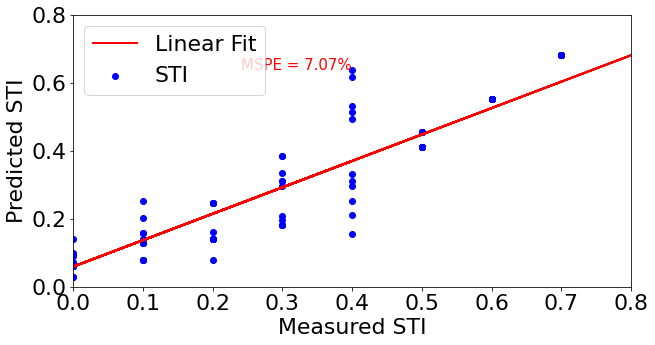

In [77]:
y_pred = model.predict(X_test)
mspe = np.mean(((y_test - y_pred) / (y_test + 1)) ** 2) * 100

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, c='blue', label='STI')
plt.xlabel("Measured STI")
plt.ylabel("Predicted STI")
           
plt.xlim([0, 0.8])
plt.ylim([0, 0.8])

regression_model = LinearRegression()
regression_model.fit(y_test.reshape(-1, 1), y_pred)
plt.plot(y_test, regression_model.predict(y_test.reshape(-1, 1)), color='red', linewidth=2, label='Linear Fit')

equation = "MSPE = {:.2f}%".format(mspe)
plt.text(0.3, 0.8, equation, transform=plt.gca().transAxes, fontsize=15, color='red')
plt.legend()
plt.grid(False)
plt.savefig('Figure_19_paper.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
plt.close()

## 13.4 - ANOVA analysis for the baseline model before and after DTL

In [78]:
results_df_WITH_DTL["Transfer_Learning"] = "With DTL"
results_df_WITHOUT_DTL["Transfer_Learning"] = "Without DTL"

In [79]:
benchmarking_analysis = pd.concat([results_df_WITHOUT_DTL, results_df_WITH_DTL])
benchmarking_analysis['MSE'] = benchmarking_analysis['MSE'].values.round(4)

In [80]:
benchmarking_analysis['MSE'].values.round(4)

array([0.004 , 0.0062, 0.0043, 0.0082, 0.0043, 0.005 , 0.0063, 0.0075,
       0.0034, 0.0045, 0.0054, 0.0016, 0.0021, 0.0052, 0.0061, 0.0037,
       0.0037, 0.0037, 0.0044, 0.0097, 0.005 , 0.007 , 0.0051, 0.0021])

In [81]:
benchmarking_analysis

Fold   MSE   MAE    R2  MSE_val  MAE_val  R2_val Transfer_Learning
0         1 0.004 0.047 0.952    0.005    0.051   0.933       Without DTL
1         2 0.006 0.057 0.926    0.008    0.069   0.900       Without DTL
2         3 0.004 0.046 0.949    0.004    0.049   0.943       Without DTL
3         4 0.008 0.068 0.900    0.007    0.067   0.913       Without DTL
4         5 0.004 0.047 0.948    0.007    0.058   0.918       Without DTL
5         6 0.005 0.052 0.939    0.006    0.058   0.941       Without DTL
6         7 0.006 0.054 0.924    0.007    0.057   0.900       Without DTL
7         8 0.007 0.068 0.907    0.009    0.069   0.896       Without DTL
8         9 0.003 0.043 0.959    0.005    0.048   0.940       Without DTL
9        10 0.004 0.045 0.946    0.008    0.059   0.909       Without DTL
10  Average 0.005 0.053 0.935    0.007    0.058   0.919       Without DTL
11  Std Dev 0.002 0.009 0.020    0.002    0.008   0.019       Without DTL
0         1 0.002 0.033 0.975    0.005    0.048   0.938          With DTL
1         2 0.005 0.050 0.937    0.007    0.061   0.913          With DTL
2         3 0.006 0.058 0.926    0.007    0.065   0.907          With DTL
3         4 0.004 0.041 0.954    0.004    0.043   0.949          With DTL
4         5 0.004 0.042 0.955    0.008    0.062   0.900          With DTL
5         6 0.004 0.043 0.954    0.007    0.057   0.931          With DTL
6         7 0.004 0.048 0.948    0.004    0.050   0.940          With DTL
7         8 0.010 0.075 0.880    0.010    0.076   0.892          With DTL
8         9 0.005 0.048 0.940    0.006    0.055   0.922          With DTL
9        10 0.007 0.059 0.915    0.010    0.071   0.879          With DTL
10  Average 0.005 0.050 0.939    0.007    0.059   0.917          With DTL
11  Std Dev 0.002 0.012 0.026    0.002    0.010   0.023          With DTL

# 14 - Comparison of the  1D CNN model with and without DTL

In [82]:
xx_without_DTL = benchmarking_analysis[benchmarking_analysis['Transfer_Learning'] == 'Without DTL']['MSE'].values
xy_with_DTL = benchmarking_analysis[benchmarking_analysis['Transfer_Learning'] == 'With DTL']['MSE'].values

# One way ANOVA
f_oneway(xy_with_DTL, xx_without_DTL)

F_onewayResult(statistic=0.09039211279716236, pvalue=0.7665021478482248)

# 15 - Validation benchmarking with others DTL

In [83]:
# --- 2. Saving the Variables ---
Xs = x_train_reshaped_source
ys = y_train_source/10

# Target
Xt = X_target_total
yt = y_target_total

FILE_PATH = 'DTL_STI_source_target_domain_data.npz'

print(f"-> Step 2: Saving variables to {FILE_PATH}...")

# np.savez saves multiple arrays into a single file in an uncompressed format.
# We map the variable names (as strings) to the variables themselves.

np.savez(FILE_PATH, Xs=Xs, ys=ys, Xt=Xt, yt=yt)
print("   Save complete.")
print("-" * 30)

-> Step 2: Saving variables to DTL_STI_source_target_domain_data.npz...
   Save complete.
------------------------------


In [84]:
print("Xs", Xs.shape)
print("ys", ys.shape)

print("Xt", Xt.shape)
print("yt", yt.shape)

Xs (25000, 1600)
ys (25000,)
Xt (720, 1600)
yt (720,)


In [85]:
# ---------------------------
# Config / hyperparams
# ---------------------------

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

INPUT_LEN = 1600
INPUT_SHAPE = (INPUT_LEN, 1)
N_SPLITS = 5          # default 10
BATCH_SIZE = 128
EPOCHS = 100          # default 200

# Weight-transfer / fine-tune specific epochs
PRETRAIN_EPOCHS = 100
WEIGHT_TRANSFER_HEAD_EPOCHS = 100
FINE_TUNE_EPOCHS = 100

# Vanilla-specific epochs
VANILLA_SOURCE_EPOCHS = 100 
VANILLA_TARGET_EPOCHS = FINE_TUNE_EPOCHS

# Learning rates
LEARNING_RATE = 1e-3
FINETUNE_LR = LEARNING_RATE / 5.0

# Adaptation hyperparameters
lambda_target = 0.2
lambda_mmd = 0.1
lambda_coral = 1.0

# Save per-fold weights / models
MODEL_DIR = "./cv_models"
os.makedirs(MODEL_DIR, exist_ok=True)

# ---------------------------
# Model builders
# ---------------------------

def build_feature_extractor(input_shape=(1600, 1)):
    """Builds the optimized 1D CNN feature extractor for transfer learning."""
    inputs = Input(shape=input_shape)
    
    # Block 1: Feature extraction with larger receptive fields
    x = layers.Conv1D(100, 10, activation='relu', padding='same')(inputs)
    x = layers.Conv1D(100, 10, activation='relu', padding='same')(x)
    x = layers.MaxPooling1D(2)(x)
    x = layers.Dropout(0.1)(x)
    # Block 2: Feature refinement with medium kernels
    x = layers.Conv1D(160, 10, activation='relu', padding='same')(x)
    x = layers.Conv1D(160, 10, activation='relu', padding='same')(x)  
    # Global context - this is where we extract features for transfer
    x = layers.GlobalAveragePooling1D()(x)
    return models.Model(inputs, x, name='feature_extractor')


def build_regressor():
    """Builds the regression head for the optimized architecture."""
    return models.Sequential([
        layers.Dense(10, activation='relu'),
        layers.Dense(1, activation='linear')
    ], name='regression_head')


def build_regressor_with_regularization():
    """Builds the regression head with regularization to prevent overfitting."""
    return models.Sequential([
        layers.Dense(10, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        layers.Dropout(0.3),
        layers.Dense(1, activation='linear')
    ], name='regression_head')


def assemble_full_model(extractor, head):
    """Combine extractor and head into one end-to-end model."""
    inputs = Input(shape=(1600, 1))
    features = extractor(inputs)
    outputs = head(features)
    return Model(inputs, outputs, name='full_model')


# ---------------------------
# Loss functions (MMD / CORAL)
# ---------------------------

def gaussian_kernel(x, y, sigma=1.0):
    x_expanded = tf.expand_dims(x, 1)
    y_expanded = tf.expand_dims(y, 0)
    distance = tf.reduce_sum(tf.square(x_expanded - y_expanded), axis=2)
    return tf.exp(-distance / (2.0 * sigma**2))


def mmd_loss(x, y, sigma=1.0):
    x = tf.reshape(x, [tf.shape(x)[0], -1])
    y = tf.reshape(y, [tf.shape(y)[0], -1])
    xx = gaussian_kernel(x, x, sigma)
    yy = gaussian_kernel(y, y, sigma)
    xy = gaussian_kernel(x, y, sigma)
    m = tf.cast(tf.shape(x)[0], tf.float32)
    n = tf.cast(tf.shape(y)[0], tf.float32)
    diag_x = tf.linalg.diag_part(xx)
    diag_y = tf.linalg.diag_part(yy)
    k_xx = (tf.reduce_sum(xx) - tf.reduce_sum(diag_x)) / (m * (m - 1) + 1e-12)
    k_yy = (tf.reduce_sum(yy) - tf.reduce_sum(diag_y)) / (n * (n - 1) + 1e-12)
    k_xy = tf.reduce_mean(xy)
    mmd_squared = k_xx + k_yy - 2 * k_xy
    return tf.sqrt(tf.maximum(mmd_squared, 1e-8))


def multi_scale_mmd_loss(x, y, bandwidths=None):
    if bandwidths is None:
        bandwidths = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
    x = tf.reshape(x, [tf.shape(x)[0], -1])
    y = tf.reshape(y, [tf.shape(y)[0], -1])
    mmd_losses = [mmd_loss(x, y, sigma) for sigma in bandwidths]
    return tf.reduce_mean(mmd_losses)


def coral_loss(src, tgt):
    src_f = tf.reshape(src, [tf.shape(src)[0], -1])
    tgt_f = tf.reshape(tgt, [tf.shape(tgt)[0], -1])
    bs_src = tf.cast(tf.shape(src_f)[0], tf.float32)
    bs_tgt = tf.cast(tf.shape(tgt_f)[0], tf.float32)
    d = tf.cast(tf.shape(src_f)[1], tf.float32)
    src_mean = tf.reduce_mean(src_f, axis=0, keepdims=True)
    tgt_mean = tf.reduce_mean(tgt_f, axis=0, keepdims=True)
    src_centered = src_f - src_mean
    tgt_centered = tgt_f - tgt_mean
    cov_src = tf.matmul(src_centered, src_centered, transpose_a=True) / (bs_src - 1.0 + 1e-12)
    cov_tgt = tf.matmul(tgt_centered, tgt_centered, transpose_a=True) / (bs_tgt - 1.0 + 1e-12)
    diff = cov_src - cov_tgt
    frob_sq = tf.reduce_sum(tf.square(diff))
    loss = frob_sq / (4.0 * (d ** 2) + 1e-12)
    return loss


# ---------------------------
# Improved Fine-tuning Function
# ---------------------------
def fine_tune_with_gradual_unfreezing(extractor, regressor, Xt_train, yt_train, Xt_val, yt_val):
    """Gradual unfreezing approach to prevent catastrophic forgetting."""
    
    # Callbacks for training
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=0
    )
    
    reduce_lr = keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        verbose=0
    )
    
    # Stage 1: Freeze feature extractor, only train head
    print("Stage 1: Training only regression head...")
    for layer in extractor.layers:
        layer.trainable = False
    
    model = assemble_full_model(extractor, regressor)
    model.compile(
        optimizer=keras.optimizers.Adam(LEARNING_RATE),
        loss='mse', 
        metrics=['mae']
    )
    
    history1 = model.fit(
        Xt_train, yt_train,
        epochs=max(1, FINE_TUNE_EPOCHS//3),
        batch_size=BATCH_SIZE,
        validation_data=(Xt_val, yt_val),
        callbacks=[early_stopping, reduce_lr],
        verbose=0
    )
    
    # Stage 2: Unfreeze last few layers of extractor
    print("Stage 2: Unfreezing last layers of feature extractor...")
    for layer in extractor.layers[-4:]:  # Unfreeze last 4 layers
        layer.trainable = True
    
    model.compile(
        optimizer=keras.optimizers.Adam(LEARNING_RATE/10),
        loss='mse',
        metrics=['mae']
    )
    
    history2 = model.fit(
        Xt_train, yt_train,
        epochs=max(1, FINE_TUNE_EPOCHS//3),
        batch_size=BATCH_SIZE,
        validation_data=(Xt_val, yt_val),
        callbacks=[early_stopping, reduce_lr],
        verbose=0
    )
    
    # Stage 3: Unfreeze all layers with very low LR
    print("Stage 3: Full fine-tuning with low learning rate...")
    for layer in extractor.layers:
        layer.trainable = True
    
    model.compile(
        optimizer=keras.optimizers.Adam(LEARNING_RATE/50),
        loss='mse',
        metrics=['mae']
    )
    
    history3 = model.fit(
        Xt_train, yt_train,
        epochs=max(1, FINE_TUNE_EPOCHS//3),
        batch_size=BATCH_SIZE,
        validation_data=(Xt_val, yt_val),
        callbacks=[early_stopping, reduce_lr],
        verbose=0
    )
    
    return model

# ---------------------------
# Data prep helpers
# ---------------------------
def prepare_data(Xs, ys, Xt, yt, scale_inputs=True, scale_targets=False):
    Xs = np.asarray(Xs, dtype=np.float32)
    Xt = np.asarray(Xt, dtype=np.float32)
    ys = np.asarray(ys, dtype=np.float32)
    yt = np.asarray(yt, dtype=np.float32)

    Xs3 = Xs.reshape((-1, INPUT_LEN, 1))
    Xt3 = Xt.reshape((-1, INPUT_LEN, 1))

    input_scaler = None
    target_scaler = None

    if scale_inputs:
        s = StandardScaler()
        s.fit(Xs)  # fit on source
        Xs2 = s.transform(Xs)
        Xt2 = s.transform(Xt)
        Xs3 = Xs2.reshape((-1, INPUT_LEN, 1)).astype(np.float32)
        Xt3 = Xt2.reshape((-1, INPUT_LEN, 1)).astype(np.float32)
        input_scaler = s

    if scale_targets:
        ts = StandardScaler()
        ys = ts.fit_transform(ys.reshape(-1,1)).ravel()
        yt = ts.transform(yt.reshape(-1,1)).ravel()
        target_scaler = ts

    return Xs3, ys, Xt3, yt, input_scaler, target_scaler

def build_datasets_for_fold(Xs, ys, Xt_train, yt_train, Xt_val, yt_val, batch_size):
    ds_src = tf.data.Dataset.from_tensor_slices((Xs.astype(np.float32), 
                                                 ys.astype(np.float32))).shuffle(10000, seed=SEED).batch(batch_size)
    
    ds_tgt = tf.data.Dataset.from_tensor_slices((Xt_train.astype(np.float32),
                                                 yt_train.astype(np.float32))).shuffle(600, seed=SEED).batch(batch_size)
    
    ds_tgt_full_train = tf.data.Dataset.from_tensor_slices((Xt_train.astype(np.float32),
                                                            yt_train.astype(np.float32))).batch(batch_size)
    
    ds_val = tf.data.Dataset.from_tensor_slices((Xt_val.astype(np.float32), 
                                                 yt_val.astype(np.float32))).batch(batch_size)
    
    return ds_src, ds_tgt, ds_tgt_full_train, ds_val


# ---------------------------
# Evaluation helper
# ---------------------------
def evaluate_model_numpy(model_or_pair, X, y):
    if isinstance(model_or_pair, tuple):
        extractor, regressor = model_or_pair
        y_pred_list = []
        for i in range(0, X.shape[0], 512):
            xb = X[i:i+512]
            feats = extractor(xb, training=False)
            yp = tf.squeeze(regressor(feats, training=False), axis=-1).numpy()
            y_pred_list.append(yp)
        y_pred = np.concatenate(y_pred_list)
    else:
        try:
            y_pred = model_or_pair.predict(X, verbose=0).ravel()
        except TypeError:
            # Fallback for models that don't accept 'verbose'
            y_pred = model_or_pair.predict(X).ravel()
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return {'mse': mse, 'mae': mae, 'r2': r2}
    
# ---------------------------
# Main CV runner
# ---------------------------
def run_cv_mode(mode_name, Xs3, ys3, Xt3, yt3):
    print(f"\n=== Running {N_SPLITS}-fold CV for mode: {mode_name} ===")
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED)
    fold_results = []
    fold_idx = 0

    for train_idx, val_idx in kf.split(Xt3):
        fold_idx += 1
        print(f"\n--- Fold {fold_idx}/{N_SPLITS} ---")
        Xt_train = Xt3[train_idx]
        Xt_val = Xt3[val_idx]
        yt_train = yt3[train_idx]
        yt_val = yt3[val_idx]

        # Flatten data for TrAdaBoost methods (they expect 2D input)
        if mode_name in ['TrAdaBoostR2', 'TwoStageTrAdaBoostR2']:
            Xs_flat = Xs3.reshape(Xs3.shape[0], -1)
            Xt_train_flat = Xt_train.reshape(Xt_train.shape[0], -1)
            Xt_val_flat = Xt_val.reshape(Xt_val.shape[0], -1)

        ds_src, ds_tgt, ds_tgt_full_train, ds_val = build_datasets_for_fold(Xs3, ys3, 
                                                                            Xt_train, yt_train, 
                                                                            Xt_val, yt_val, 
                                                                            BATCH_SIZE)

        # ---------- Mode-specific training ----------
        if mode_name in ('MMD', 'CORAL', 'MSE'):
            feature_extractor = build_feature_extractor()
            regressor_head = build_regressor()
            optimizer = keras.optimizers.Adam(LEARNING_RATE)
            mse_fn = keras.losses.MeanSquaredError()

            @tf.function
            def train_step(x_s, y_s, x_t, y_t):
                with tf.GradientTape() as tape:
                    z_s = feature_extractor(x_s, training=True)
                    z_t = feature_extractor(x_t, training=True)
                    y_s_pred = tf.squeeze(regressor_head(z_s, training=True), axis=-1)
                    y_t_pred = tf.squeeze(regressor_head(z_t, training=True), axis=-1)
                    loss_s = mse_fn(y_s, y_s_pred)
                    loss_t = mse_fn(y_t, y_t_pred)
                    loss_mmd = tf.constant(0.0, dtype=tf.float32)
                    loss_coral = tf.constant(0.0, dtype=tf.float32)
                    total_loss = loss_s + lambda_target * loss_t
                    if mode_name == 'MMD':
                        loss_mmd = multi_scale_mmd_loss(z_s, z_t)
                        total_loss += lambda_mmd * loss_mmd
                    if mode_name == 'CORAL':
                        loss_coral = coral_loss(z_s, z_t)
                        total_loss += lambda_coral * loss_coral
                grads = tape.gradient(total_loss, 
                                      feature_extractor.trainable_variables + regressor_head.trainable_variables)
                
                optimizer.apply_gradients(zip(grads, 
                                              feature_extractor.trainable_variables + regressor_head.trainable_variables))
                
                return loss_s, loss_t, loss_mmd, loss_coral, total_loss

            try:
                src_cards = int(tf.data.experimental.cardinality(ds_src).numpy())
                tgt_cards = int(tf.data.experimental.cardinality(ds_tgt).numpy())
                steps_per_epoch = min(src_cards, tgt_cards) if min(src_cards, tgt_cards) > 0 else 1
            except Exception:
                steps_per_epoch = 1

            for epoch in range(EPOCHS):
                src_iter = iter(ds_src)
                tgt_iter = iter(ds_tgt)
                last_vals = None
                for step in range(steps_per_epoch):
                    try:
                        x_s_batch, y_s_batch = next(src_iter)
                    except StopIteration:
                        src_iter = iter(ds_src)
                        x_s_batch, y_s_batch = next(src_iter)
                    try:
                        x_t_batch, y_t_batch = next(tgt_iter)
                    except StopIteration:
                        tgt_iter = iter(ds_tgt)
                        x_t_batch, y_t_batch = next(tgt_iter)
                    last_vals = train_step(x_s_batch, y_s_batch, x_t_batch, y_t_batch)
                if (epoch+1) % max(1, EPOCHS//5) == 0 or epoch == 0:
                    ls, lt, lm, lc, total = last_vals
                    print(f"Epoch {epoch+1}/{EPOCHS} - s:{ls:.4f} t:{lt:.4f} mmd:{lm:.6f} coral:{lc:.6f} total:{total:.4f}")

            train_metrics = evaluate_model_numpy((feature_extractor, regressor_head), Xt_train, yt_train)
            val_metrics = evaluate_model_numpy((feature_extractor, regressor_head), Xt_val, yt_val)

        # -------------------------------
        # Vanilla / Weight transfer / Finetune
        # -------------------------------
        elif mode_name == 'WEIGHT_TRANSFER':
            tf.keras.backend.clear_session()
            extractor = build_feature_extractor()
            regressor = build_regressor()
            full = assemble_full_model(extractor, regressor)
            full.compile(optimizer=keras.optimizers.Adam(LEARNING_RATE), loss='mse', metrics=['mae'])
            
            full.fit(Xs3, ys3, 
                     epochs=PRETRAIN_EPOCHS,
                     batch_size=BATCH_SIZE,
                     validation_split=0.05,
                     verbose=0)
            
            feat_path = os.path.join(MODEL_DIR, f"extractor_pretrained_fold{fold_idx}.weights.h5")
            extractor.save_weights(feat_path)
            extractor_t = build_feature_extractor()
            extractor_t.load_weights(feat_path)
            
            for layer in extractor_t.layers:
                layer.trainable = False
            
            regressor_new = build_regressor()
            full_target = assemble_full_model(extractor_t, regressor_new)
            full_target.compile(optimizer=keras.optimizers.Adam(LEARNING_RATE), loss='mse', metrics=['mae'])
            
            full_target.fit(Xt_train, yt_train, 
                            epochs=WEIGHT_TRANSFER_HEAD_EPOCHS, 
                            batch_size=BATCH_SIZE,
                            validation_split=0.10, 
                            verbose=0)
            
            train_metrics = evaluate_model_numpy(full_target, Xt_train, yt_train)
            val_metrics = evaluate_model_numpy(full_target, Xt_val, yt_val)

        elif mode_name == 'FINETUNE':
            tf.keras.backend.clear_session()
            print("Phase 1: Pre-training on source data...")
            
            extractor = build_feature_extractor()
            regressor = build_regressor_with_regularization()  # Use regularized head
            full_pre = assemble_full_model(extractor, regressor)
            
            # Add callbacks for source pre-training
            source_callbacks = [
                keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
            ]
            
            full_pre.compile(
                optimizer=keras.optimizers.Adam(LEARNING_RATE),
                loss='mse',
                metrics=['mae']
            )
            
            full_pre.fit(
                Xs3, ys3,
                epochs=PRETRAIN_EPOCHS,
                batch_size=BATCH_SIZE,
                validation_split=0.05,
                callbacks=source_callbacks,
                verbose=0
            )

            # Save pre-trained weights
            feat_path = os.path.join(MODEL_DIR, f"extractor_pretrained_fold{fold_idx}.weights.h5")
            reg_path = os.path.join(MODEL_DIR, f"regressor_pretrained_fold{fold_idx}.weights.h5")
            extractor.save_weights(feat_path)
            regressor.save_weights(reg_path)

            # Load for fine-tuning
            extractor_t = build_feature_extractor()
            regressor_t = build_regressor_with_regularization()
            
            # Create variables by running dummy forward pass
            _ = extractor_t(np.zeros((1, INPUT_LEN, 1), dtype=np.float32))
            _ = regressor_t(np.zeros((1, extractor_t.output_shape[-1]), dtype=np.float32))
            
            # Load weights
            extractor_t.load_weights(feat_path)
            regressor_t.load_weights(reg_path)

            # Use gradual unfreezing for fine-tuning
            print("Phase 2: Fine-tuning on target data with gradual unfreezing...")
            full_t = fine_tune_with_gradual_unfreezing(
                extractor_t, regressor_t, Xt_train, yt_train, Xt_val, yt_val
            )

            train_metrics = evaluate_model_numpy(full_t, Xt_train, yt_train)
            val_metrics = evaluate_model_numpy(full_t, Xt_val, yt_val)

        elif mode_name == 'VANILLA_SOURCE':
            tf.keras.backend.clear_session()
            extractor = build_feature_extractor()
            regressor = build_regressor()
            full_src = assemble_full_model(extractor, regressor)
            full_src.compile(optimizer=keras.optimizers.Adam(LEARNING_RATE), loss='mse', metrics=['mae'])
            
            full_src.fit(Xs3, ys3,
                         epochs=VANILLA_SOURCE_EPOCHS,
                         batch_size=BATCH_SIZE, 
                         validation_split=0.05, 
                         verbose=0)
            
            train_metrics = evaluate_model_numpy(full_src, Xt_train, yt_train)
            val_metrics = evaluate_model_numpy(full_src, Xt_val, yt_val)

        elif mode_name == 'VANILLA_TARGET':
            tf.keras.backend.clear_session()
            extractor = build_feature_extractor()
            regressor = build_regressor()
            full_tgt = assemble_full_model(extractor, regressor)
            full_tgt.compile(optimizer=keras.optimizers.Adam(LEARNING_RATE), loss='mse', metrics=['mae'])
            
            full_tgt.fit(Xt_train, yt_train, 
                         epochs=VANILLA_TARGET_EPOCHS,
                         batch_size=BATCH_SIZE, 
                         validation_split=0.10, 
                         verbose=0)
            
            train_metrics = evaluate_model_numpy(full_tgt, Xt_train, yt_train)
            val_metrics = evaluate_model_numpy(full_tgt, Xt_val, yt_val)

        # ADDED: New TrAdaBoostR2 method - OPTIMIZED
        elif mode_name == 'TrAdaBoostR2':
            tf.keras.backend.clear_session()
            print("Training TrAdaBoostR2...")
                        
            model = TrAdaBoostR2(Ridge(alpha=1.0), 
                                 n_estimators=5, 
                                 Xt=Xt_train_flat, 
                                 yt=yt_train, 
                                 random_state=SEED)
            
            model.fit(Xs_flat, ys3)
            train_metrics = evaluate_model_numpy(model, Xt_train_flat, yt_train)
            val_metrics = evaluate_model_numpy(model, Xt_val_flat, yt_val)

        # TwoStageTrAdaBoostR2 method
        elif mode_name == 'TwoStageTrAdaBoostR2':
            tf.keras.backend.clear_session()
            print("Training TwoStageTrAdaBoostR2...")
            
            model = TwoStageTrAdaBoostR2(Ridge(alpha=1.0), 
                                         n_estimators=5, 
                                         Xt=Xt_train_flat, 
                                         yt=yt_train, random_state=SEED)
            model.fit(Xs_flat, ys3)
            train_metrics = evaluate_model_numpy(model, Xt_train_flat, yt_train)
            val_metrics = evaluate_model_numpy(model, Xt_val_flat, yt_val)

        else:
            raise ValueError(f"Unknown mode: {mode_name}")

        fold_results.append({
            'Fold': f'Fold_{fold_idx}',
            'MSE': float(train_metrics['mse']),
            'MAE': float(train_metrics['mae']),
            'R2': float(train_metrics['r2']),
            'MSE_val': float(val_metrics['mse']),
            'MAE_val': float(val_metrics['mae']),
            'R2_val': float(val_metrics['r2'])
        })

        tf.keras.backend.clear_session()

    df = pd.DataFrame(fold_results, columns=['Fold','MSE','MAE','R2','MSE_val','MAE_val','R2_val'])
    avg = pd.DataFrame({'Fold':['Average'],'MSE':[df['MSE'].mean()],'MAE':[df['MAE'].mean()],'R2':[df['R2'].mean()],'MSE_val':[df['MSE_val'].mean()],'MAE_val':[df['MAE_val'].mean()],'R2_val':[df['R2_val'].mean()]})
    std = pd.DataFrame({'Fold':['Std Dev'],'MSE':[df['MSE'].std()],'MAE':[df['MAE'].std()],'R2':[df['R2'].std()],'MSE_val':[df['MSE_val'].std()],'MAE_val':[df['MAE_val'].std()],'R2_val':[df['R2_val'].std()]})
    results_df = pd.concat([df, avg, std], ignore_index=True)
    print(f"\n=== Completed mode: {mode_name} ===")
    return results_df

# ---------------------------
# RUN main
# ---------------------------
if __name__ == "__main__":
    try:
        Xs, ys, Xt, yt
    except NameError:
        raise RuntimeError("Please provide Xs, ys, Xt, yt arrays in the global namespace before running this script.")

    Xs3, ys3, Xt3, yt3, in_scaler, target_scaler = prepare_data(Xs, ys, Xt, yt, scale_inputs=True, scale_targets=False)

    modes = ['FINETUNE',
             'MMD',
             'CORAL',
             'WEIGHT_TRANSFER',
             'VANILLA_SOURCE',
             'TrAdaBoostR2',
             'TwoStageTrAdaBoostR2']

    mode_results = {}

    for mode in modes:
        results_df = run_cv_mode(mode, Xs3, ys3, Xt3, yt3)
        mode_results[mode] = results_df
        csv_name = os.path.join(MODEL_DIR, f"cv_results_{mode}.csv")
        results_df.to_csv(csv_name, index=False)
        print(f"Saved {mode} results -> {csv_name}")

    # Training metrics to the summary
    print("\n" + "="*100)
    print("SUMMARY - TRAINING METRICS (mean ± std):")
    print("="*100)
    for mode in modes:
        df = mode_results[mode]
        avg = df[df['Fold']=='Average'].iloc[0]
        stdrow = df[df['Fold']=='Std Dev'].iloc[0]
        print(f"{mode:20} train MSE: {avg['MSE']:.6f} ± {stdrow['MSE']:.6f}  |  train R2: {avg['R2']:.6f} ± {stdrow['R2']:.6f}")
    
    print("\n" + "="*100)
    print("SUMMARY - VALIDATION METRICS (mean ± std):")
    print("="*100)
    for mode in modes:
        df = mode_results[mode]
        avg = df[df['Fold']=='Average'].iloc[0]
        stdrow = df[df['Fold']=='Std Dev'].iloc[0]
        print(f"{mode:20} val MSE: {avg['MSE_val']:.6f} ± {stdrow['MSE_val']:.6f}  |  val R2: {avg['R2_val']:.6f} ± {stdrow['R2_val']:.6f}")


=== Running 5-fold CV for mode: FINETUNE ===

--- Fold 1/5 ---
Phase 1: Pre-training on source data...
Phase 2: Fine-tuning on target data with gradual unfreezing...
Stage 1: Training only regression head...
Stage 2: Unfreezing last layers of feature extractor...
Stage 3: Full fine-tuning with low learning rate...

--- Fold 2/5 ---
Phase 1: Pre-training on source data...
Phase 2: Fine-tuning on target data with gradual unfreezing...
Stage 1: Training only regression head...
Stage 2: Unfreezing last layers of feature extractor...
Stage 3: Full fine-tuning with low learning rate...

--- Fold 3/5 ---
Phase 1: Pre-training on source data...
Phase 2: Fine-tuning on target data with gradual unfreezing...
Stage 1: Training only regression head...
Stage 2: Unfreezing last layers of feature extractor...
Stage 3: Full fine-tuning with low learning rate...

--- Fold 4/5 ---
Phase 1: Pre-training on source data...
Phase 2: Fine-tuning on target data with gradual unfreezing...
Stage 1: Training on

In [86]:
!zip -r graphs_paper.zip /kaggle/working/

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/Figure_9_paper.png (deflated 16%)
  adding: kaggle/working/Figure_7c_submission_img_paper.png (deflated 6%)
  adding: kaggle/working/Figura_34_b.png (deflated 10%)
  adding: kaggle/working/cv_models/ (stored 0%)
  adding: kaggle/working/cv_models/extractor_pretrained_fold1.weights.h5 (deflated 8%)
  adding: kaggle/working/cv_models/cv_results_MMD.csv (deflated 48%)
  adding: kaggle/working/cv_models/cv_results_TrAdaBoostR2.csv (deflated 50%)
  adding: kaggle/working/cv_models/extractor_pretrained_fold4.weights.h5 (deflated 8%)
  adding: kaggle/working/cv_models/regressor_pretrained_fold4.weights.h5 (deflated 64%)
  adding: kaggle/working/cv_models/extractor_pretrained_fold2.weights.h5 (deflated 8%)
  adding: kaggle/working/cv_models/regressor_pretrained_fold2.weights.h5 (deflated 64%)
  adding: kaggle/working/cv_models/regressor_pretrained_fold1.weights.h5 (deflated 65%)
  adding: kaggle/working/cv_models/cv_results_TwoStag